In [2]:
import pandas as pd
import re
import os
import markdown
import numpy as np
import seaborn as sns
from simple_colors import *
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
##计算FPKM
from scriptGXG import geneFCCal

pd.set_option('display.max_rows', 100)


ModuleNotFoundError: No module named 'scriptGXG'

In [2]:
import os
# os.chdir('/Users/fenn/Documents/Co68/qPCR/antibody')
# os.chdir('/Users/fenn/Documents/Co68/qPCR/')
# os.chdir('/Users/fenn/Documents/Co68/qPCR/VB12')
# os.chdir('/Users/fenn/Documents/PhDProjects/MCB/qPCR')
# os.chdir('/Users/fenn/Documents/PhDProjects/MCB/qPCR/timeCourse')
# os.chdir('/Users/fenn/Documents/PhDProjects/MCB/qPCR/VB12')
# os.chdir('/Users/fenn/Documents/PhDProjects/MCB/qPCR/phemotype_Figure1')
# os.chdir('/Users/fenn/Documents/PhDProjects/MCB/qPCR/timeCourse')
# os.chdir('/Users/fenn/Documents/PhDProjects/MCB/qPCR/concentration')
# os.chdir('/Users/fenn/Documents/PhDProjects/MCB/qPCR/cytokines')
# os.chdir('/Users/fenn/Documents/PhDProjects/MCB/MachineLearning/qPCR/HSV_VSV/inflammation')
os.chdir('/Users/fenn/Documents/Co68/qPCR/qPCR/Co7_MCB')
os.listdir()

['J774_Co68_Drugs_TimeSeries.csv',
 '.DS_Store',
 'PMs_Co68_Drugs_TimeSeries.csv',
 'RAW 264.7_TimeSeries_Ifnb1_33.pdf',
 'PMs_TimeSeries_Ifnb1_33.pdf',
 'RAW_timeSeries.csv',
 'J774_TimeSeries_Ifnb1_33.pdf',
 'Co68_Hela_timeSeries.csv',
 'Co68_A549_timeSeries.csv',
 'BMDMs_TimeSeries_Ifnb1_33.pdf',
 'BMDM_Co68_Drugs_TimeSeries.csv']

In [10]:
# data = pd.read_excel('../Trim17/20230918_212957_Trim17.xls')
# data = pd.read_csv('../TimesEffectCo68/DayofCo68.csv')
# data = pd.read_excel('../TimesEffectCo68/20221021_092714_TimeSeries_3_5_7_10h.xls')
# data = pd.read_excel('20240319_180002_Nos2_Ptgs2.xls')
# data = pd.read_excel('20240117_211819_ISG15.xls')
# data = pd.read_excel('20240320_165039_MCB-alone.xls')
# data = pd.read_excel('/Users/fenn/Documents/Co68/qPCR/stat1/egr1/20240514_155433_Fgr.xls')
# data = pd.read_excel('/Users/fenn/Documents/Co68/qPCR/qPCR/Co68iLPS/20230206_212628_Co68_LPS_3h_5h.xls')
# data = pd.read_csv('/Users/fenn/Documents/Co68/qPCR/qPCR/cellLineTest/Co68_A549_timeSeries.csv')
# J774
data = pd.read_csv('./J774_Co68_Drugs_TimeSeries.csv')
print(data['检测项目'].value_counts())
print(data['样本名称'].value_counts())
print(data.shape)
data.head(8)

IFNB1    8
Name: 检测项目, dtype: int64
J774-DMSO      2
J774-DRUG-3    2
J774-DRUG-2    2
J774-LPS       2
Name: 样本名称, dtype: int64
(8, 7)


,样本名称,检测项目,CT,diff,pow,fc,samples
0,J774-DMSO,IFNB1,34.88,-17.18,0.000007,1.006931,0h
1,J774-DMSO,IFNB1,34.94,-17.20,0.000007,0.993069,0h
2,J774-DRUG-3,IFNB1,31.74,-14.35,0.000048,7.160029,1h
3,J774-DRUG-3,IFNB1,32.12,-14.72,0.000037,5.540305,1h
4,J774-DRUG-2,IFNB1,28.64,-9.55,0.001334,199.461341,3h
5,J774-DRUG-2,IFNB1,28.93,-9.78,0.001137,170.067699,3h
6,J774-LPS,IFNB1,31.54,-15.27,0.000025,143.800000,5h
7,J774-LPS,IFNB1,31.68,-15.05,0.000029,124.560000,5h


In [11]:
genes = list(data['检测项目'].drop_duplicates())
# genes.remove('ACTB')
genes

['IFNB1']

In [70]:
IFNB = data[data['检测项目'].str.contains('hGA|AC|Il1b', flags=re.IGNORECASE)]
IFNB = IFNB[IFNB['样本名称'].str.contains(r'_3h|DMSO_3h', flags=re.IGNORECASE)].copy().reset_index(drop=True)
IFNB

,孔位,样本ID,样本名称,检测项目,属性,染料,CT,CT值平均值,CT标准方差,浓度,浓度平均值,浓度标准方差,结论
0,B05,2,Co_3h,mActb,未知,SYBR,19.17,19.14,0.05,NaN,NaN,NaN,阴性
1,B06,2,Co_3h,mActb,未知,SYBR,19.11,19.14,0.05,NaN,NaN,NaN,阴性
2,F05,6,Co_LPS_3h,mActb,未知,SYBR,18.17,18.05,0.17,NaN,NaN,NaN,阴性
3,F06,6,Co_LPS_3h,mActb,未知,SYBR,17.92,18.05,0.17,NaN,NaN,NaN,阴性
4,A05,1,DMSO_3h,mActb,未知,SYBR,17.14,17.01,0.19,NaN,NaN,NaN,阴性
5,A06,1,DMSO_3h,mActb,未知,SYBR,16.87,17.01,0.19,NaN,NaN,NaN,阴性
6,C05,3,LPS_3h,mActb,未知,SYBR,16.71,16.69,0.03,NaN,NaN,NaN,阴性
7,C06,3,LPS_3h,mActb,未知,SYBR,16.67,16.69,0.03,NaN,NaN,NaN,阴性
8,E05,5,LPS_Co_3h,mActb,未知,SYBR,18.57,18.53,0.05,NaN,NaN,NaN,阴性
9,E06,5,LPS_Co_3h,mActb,未知,SYBR,18.49,18.53,0.05,NaN,NaN,NaN,阴性


In [13]:
IFNB = data
IFNB

,样本名称,检测项目,CT,diff,pow,fc,samples
0,J774-DMSO,IFNB1,34.88,-17.18,0.000007,1.006931,0h
1,J774-DMSO,IFNB1,34.94,-17.20,0.000007,0.993069,0h
2,J774-DRUG-3,IFNB1,31.74,-14.35,0.000048,7.160029,1h
3,J774-DRUG-3,IFNB1,32.12,-14.72,0.000037,5.540305,1h
4,J774-DRUG-2,IFNB1,28.64,-9.55,0.001334,199.461341,3h
5,J774-DRUG-2,IFNB1,28.93,-9.78,0.001137,170.067699,3h
6,J774-LPS,IFNB1,31.54,-15.27,0.000025,143.800000,5h
7,J774-LPS,IFNB1,31.68,-15.05,0.000029,124.560000,5h


In [14]:
fc_Atf3 = geneFCCal(IFNB, 'IFNB1', 'DMSO')
fc_Atf3 

,样本名称,检测项目,CT,ACTB,diff,pow,fc
0,J774-DRUG-3,IFNB1,31.74,34.88,3.14,8.815241,NaN
1,J774-DRUG-3,IFNB1,32.12,34.94,2.82,7.061624,NaN
2,J774-LPS,IFNB1,31.54,28.64,-2.90,0.133972,NaN
3,J774-LPS,IFNB1,31.68,28.93,-2.75,0.148651,NaN


In [97]:
fc_Atf3 = fc_Atf3.loc[[4,5,8,9,6,7,0,1],].reset_index(drop=True)

In [98]:
fc_Atf3['samples'] = fc_Atf3['样本名称'].str.split('_', expand=True)[0]
fc_Atf3['samples'] = fc_Atf3['samples'].str.replace('Co', 'Co7')
fc_Atf3

,样本名称,检测项目,CT,ACTB,diff,pow,fc,samples
0,DMSO_3h,mIl1b,31.80,16.87,-14.93,0.000032,0.982673,DMSO
1,DMSO_3h,mIl1b,32.02,17.14,-14.88,0.000033,1.017327,DMSO
2,LPS_3h,mIl1b,19.78,16.67,-3.11,0.115824,3552.905011,LPS
3,LPS_3h,mIl1b,19.89,16.71,-3.18,0.110338,3384.632316,LPS
4,LPS-Co_3h,mIl1b,24.62,17.62,-7.00,0.007812,239.649713,LPS-Co7
5,LPS-Co_3h,mIl1b,24.64,17.65,-6.99,0.007867,241.316609,LPS-Co7
6,Co_3h,mIl1b,33.22,19.11,-14.11,0.000057,1.734817,Co7
7,Co_3h,mIl1b,33.49,19.17,-14.32,0.000049,1.499814,Co7


In [99]:
resultDir = '/Users/fenn/Documents/Co68/qPCR/qPCR/Co68iLPS/results'
fc_Atf3.to_csv(resultDir + '/Co_LPS_3h_Il1b.csv', index=None)
 

In [29]:
os.listdir()

['J774_Co68_Drugs_TimeSeries.csv',
 'PMs_Co68_Drugs_TimeSeries.csv',
 'RAW_Co68_10_Drugs.csv',
 'RAW_timeSeries.csv',
 'J774_TimeSeries_Ifnb1_33.pdf',
 'Co68_Hela_timeSeries.csv',
 'Co68_A549_timeSeries.csv',
 'BMDM_Co68_Drugs_TimeSeries.csv']

In [57]:
data = pd.read_csv('./PMs_Co68_Drugs_TimeSeries.csv')
print(data['检测项目'].value_counts())
print(data['样本名称'].value_counts())
print(data.shape)
data

IFNB1    10
Name: 检测项目, dtype: int64
PM-YS      4
PM-DMSO    2
PM-C176    2
PM-3H      2
Name: 样本名称, dtype: int64
(10, 7)


,样本名称,检测项目,CT,diff,pow,fc,samples
0,PM-DMSO,IFNB1,33.32,-15.99,0.000015,1.292702,0h
1,PM-DMSO,IFNB1,34.34,-16.86,0.000008,0.707298,0h
2,PM-C176,IFNB1,35.87,-12.16,0.000219,19.384141,1h
3,PM-C176,IFNB1,36.14,-12.32,0.000196,16.454267,1h
4,PM-3H,IFNB1,33.65,-11.27,0.000405,43.069051,3h
5,PM-3H,IFNB1,33.88,-11.25,0.000411,47.544637,3h
6,PM-YS,IFNB1,31.61,-11.56,0.000331,35.865147,5h
7,PM-YS,IFNB1,31.71,-11.54,0.000336,39.254130,5h
8,PM-YS,IFNB1,31.61,-11.56,0.000331,25.865147,7h
9,PM-YS,IFNB1,31.71,-11.54,0.000336,22.254130,7h


In [58]:
exp = data.head(10)
exp

,样本名称,检测项目,CT,diff,pow,fc,samples
0,PM-DMSO,IFNB1,33.32,-15.99,0.000015,1.292702,0h
1,PM-DMSO,IFNB1,34.34,-16.86,0.000008,0.707298,0h
2,PM-C176,IFNB1,35.87,-12.16,0.000219,19.384141,1h
3,PM-C176,IFNB1,36.14,-12.32,0.000196,16.454267,1h
4,PM-3H,IFNB1,33.65,-11.27,0.000405,43.069051,3h
5,PM-3H,IFNB1,33.88,-11.25,0.000411,47.544637,3h
6,PM-YS,IFNB1,31.61,-11.56,0.000331,35.865147,5h
7,PM-YS,IFNB1,31.71,-11.54,0.000336,39.254130,5h
8,PM-YS,IFNB1,31.61,-11.56,0.000331,25.865147,7h
9,PM-YS,IFNB1,31.71,-11.54,0.000336,22.254130,7h


In [59]:
exp['samples'].drop_duplicates().to_list()

['0h', '1h', '3h', '5h', '7h']

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0h vs. 1h: t-test independent samples, P_val:7.706e-03 t=-1.133e+01
0h vs. 3h: t-test independent samples, P_val:2.585e-03 t=-1.963e+01
0h vs. 5h: t-test independent samples, P_val:2.205e-03 t=-2.126e+01
0h vs. 7h: t-test independent samples, P_val:6.233e-03 t=-1.261e+01


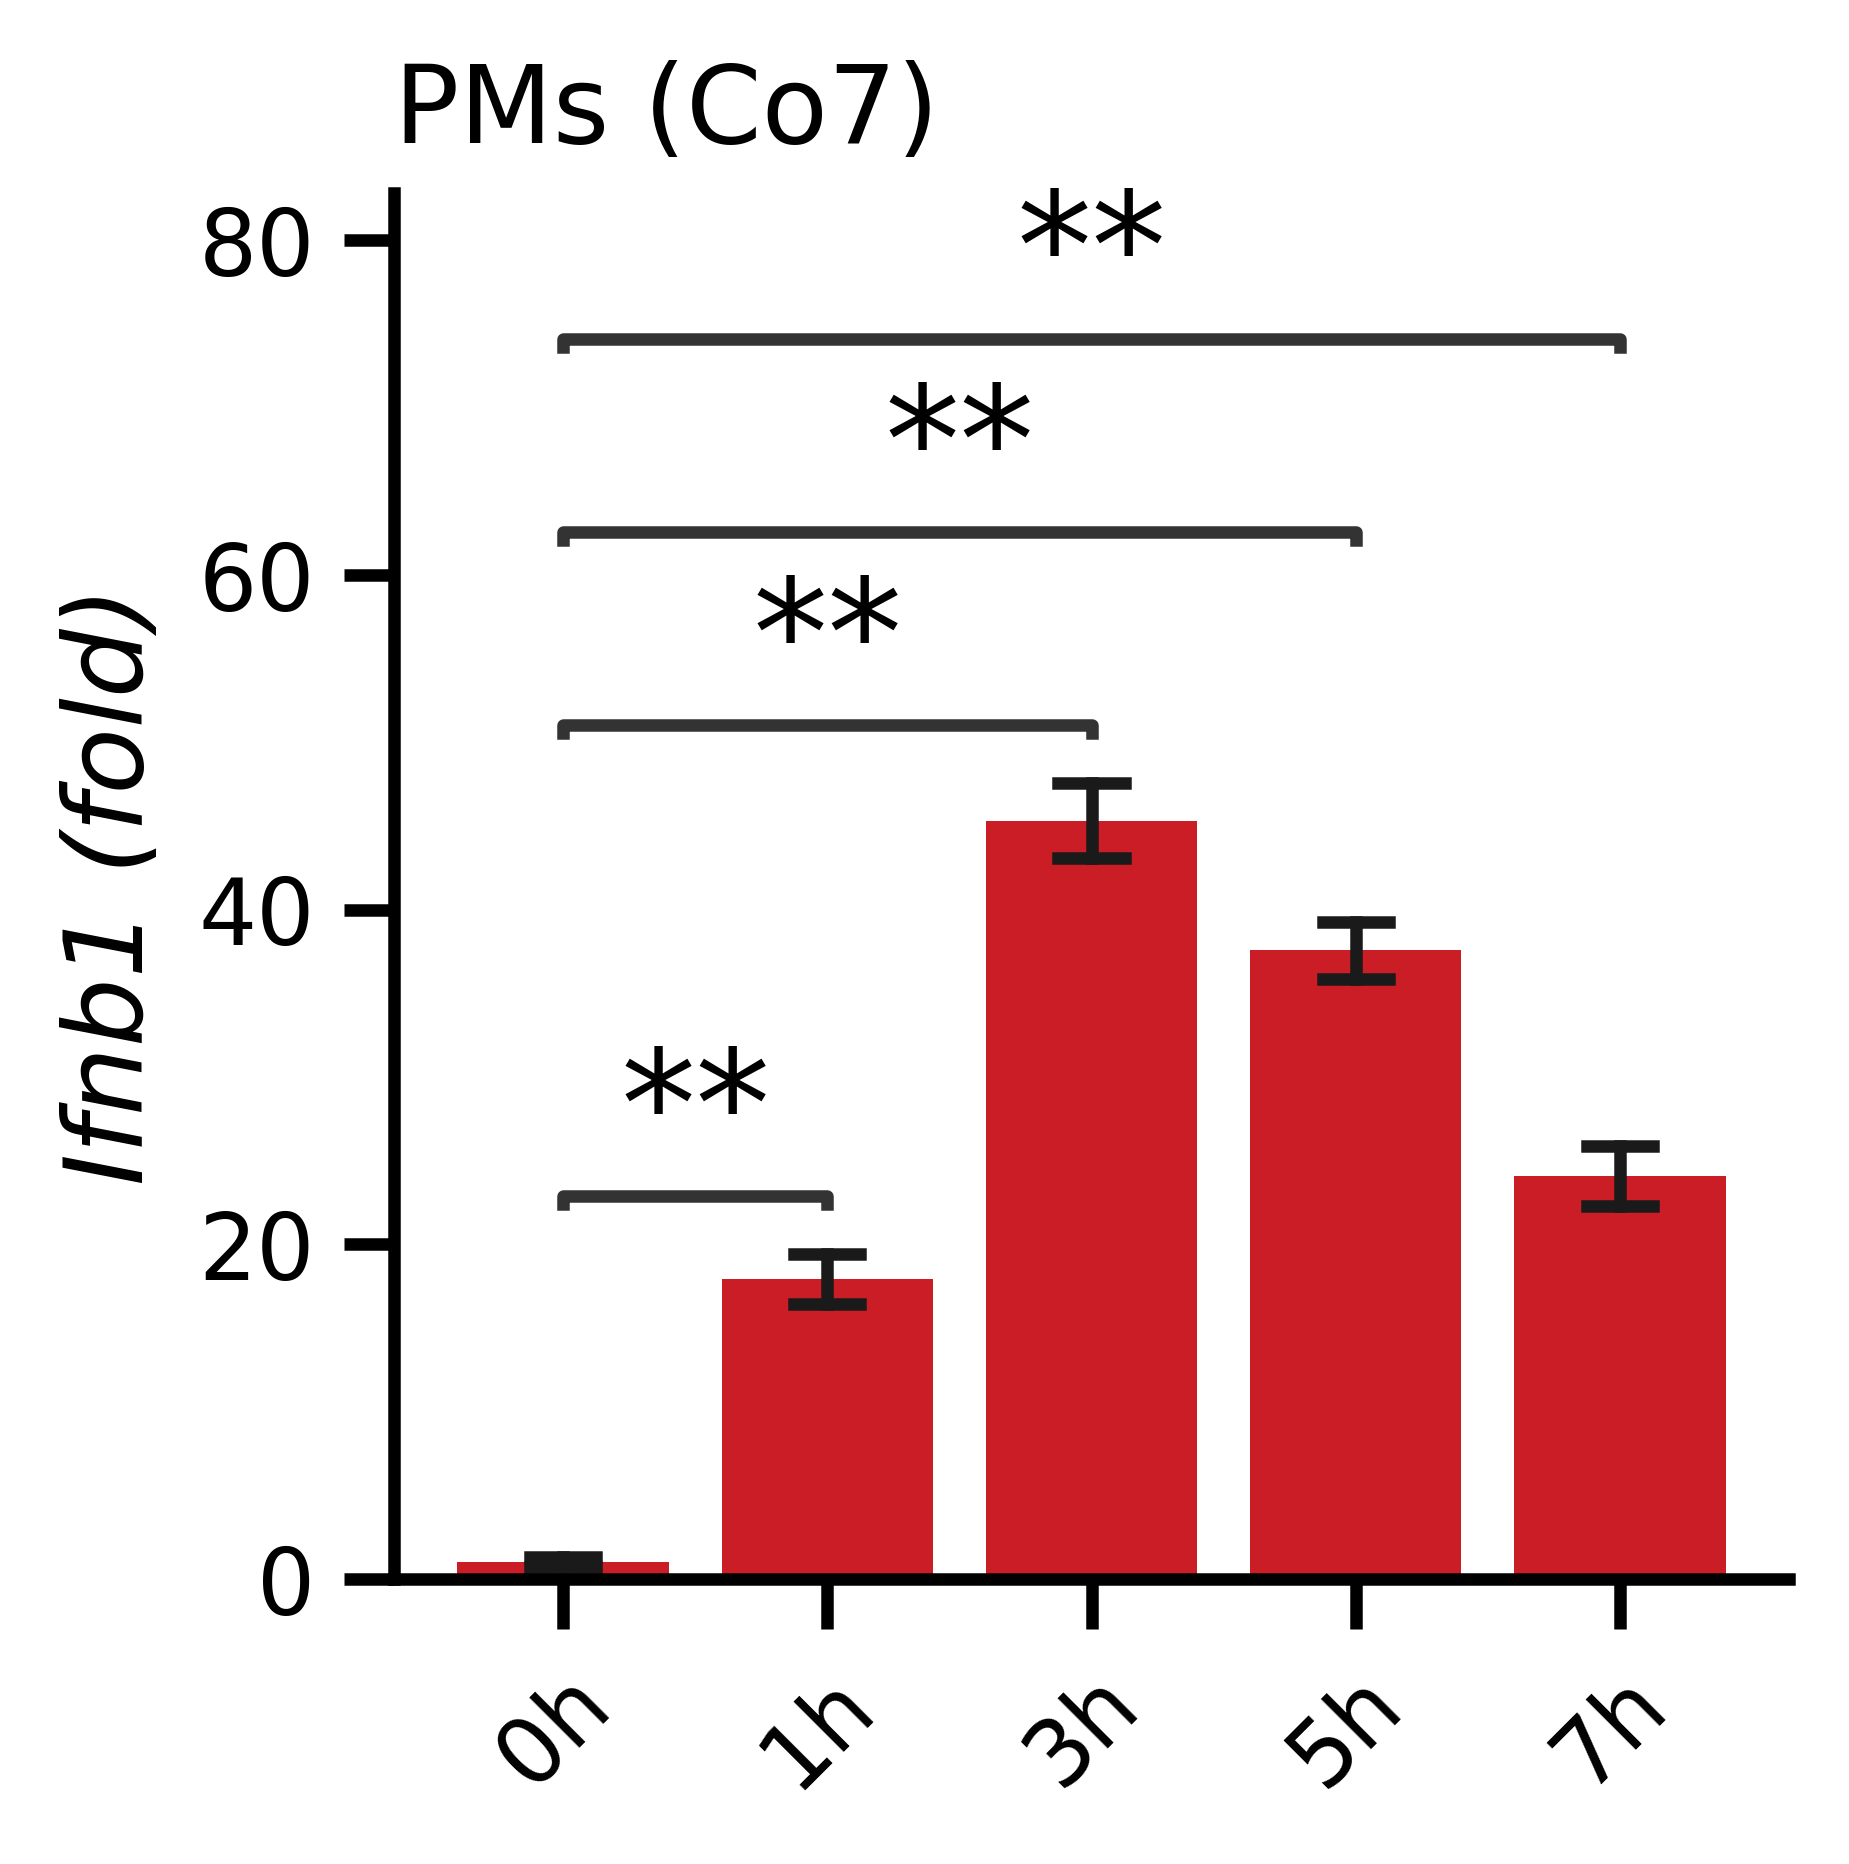

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

with sns.plotting_context('notebook', font_scale=1.2):
    # x='样本名称'
    x='samples'
    y='fc'
    cells = 'PMs'
    gene = 'Ifnb1'
    # outDirFig = '/Users/fenn/Documents/PhDProjects/MCB/MachineLearning/qPCR/HSV_VSV/inflammation'
    outDirFig = '/Users/fenn/Documents/Co68/qPCR/qPCR/Co7_MCB'

    fig = plt.figure(figsize=(3,3), dpi=600)
    # fig = plt.figure(figsize=(6,6), dpi=600)
    # fig = plt.figure(figsize=(4,4), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x,
        capsize=0.25, errwidth=1.5, palette=[sns.color_palette('bright')[3]],
        errcolor='0.1')
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    # ax.set_ylabel('Il1b', fontsize=13, fontstyle='italic')
    ax.set_ylabel(f'{gene} (fold)', fontsize=13, fontstyle='italic')
    # ax.set_title('RAW 264.7 (5h)', fontsize=13, loc='left')
    ax.set_title(f'{cells} (Co7)', fontsize=13, loc='left')
    # ax.set_title('HEK293T (Co68)', fontsize=13, loc='left')
    ax.set_xticks(range(int(len(exp)/2)), list(exp[x].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # ax.set_xticks(range(int(len(exp)/2)), ['DMSO', '50um', '100um', '200um','500um','1000um'], rotation_mode='anchor', rotation=45, horizontalalignment='right')
    
    # ax.errorbar(x,y, yerr=exp['err'], capsize=15, capthick=3, barsabove=False,fmt='_k', uplims=False, lolims=False, xuplims=True, xlolims=True, data=exp)
    
    # pairs=[('VSV','VSV-Co7'), ('VSV','Co7')
    # ]

    pairs = [('0h','1h'), ('0h','3h'), ('0h','5h'), ('0h','7h')]
    
    # pairs=[('DRUG-DMSO','DRUG-10H')]
    annotator = Annotator(g, pairs, data=exp, x=x, y=y)
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.01, verbose=True)
    annotator.apply_and_annotate()

# print(sns.__file__)
# Co68iLPS
plt.savefig(outDirFig + f'/{cells}_TimeSeries_{gene}_33.pdf', dpi=700, bbox_inches='tight')

In [509]:
MCB = fc_Atf3.iloc[:,].reset_index(drop=True)
exp = MCB
exp['样本名称'] = exp['样本名称'].str.replace('LPS_4H_7MCB','LPS-MCB')
exp['样本名称'] = exp['样本名称'].str.replace('LPS_4H_7FREE','MCB')
exp['样本名称'] = exp['样本名称'].str.replace('LPS_11H','LPS')
exp['样本名称'] = exp['样本名称'].str.removeprefix('RAW_')
exp = exp[~exp['样本名称'].isin(['LPS-MCB_MyD8','LPS-MCB_TLR4'])]
exp = exp.sort_values('样本名称').reset_index(drop=True)
exp

,样本名称,检测项目,CT,ACTB,diff,pow,fc
0,DMSO,IFNB1,29.21,17.23,-11.98,0.000248,0.982673
1,DMSO,IFNB1,29.26,17.33,-11.93,0.000256,1.017327
2,LPS,IFNB1,29.31,18.67,-10.64,0.000627,2.487650
3,LPS,IFNB1,30.53,18.81,-11.72,0.000296,1.176730
4,LPS-MCB,IFNB1,28.65,17.84,-10.81,0.000557,2.211129
5,LPS-MCB,IFNB1,29.29,18.49,-10.80,0.000561,2.226509
6,MCB,IFNB1,30.33,18.44,-11.89,0.000263,1.045928
7,MCB,IFNB1,31.26,18.71,-12.55,0.000167,0.661945


In [511]:
exp.loc[[2,3,4,5], 'fc'] = [24.662523, 21.917276,8.211129,10.226509]
exp

,样本名称,检测项目,CT,ACTB,diff,pow,fc
0,DMSO,IFNB1,29.21,17.23,-11.98,0.000248,0.982673
1,DMSO,IFNB1,29.26,17.33,-11.93,0.000256,1.017327
2,LPS,IFNB1,29.31,18.67,-10.64,0.000627,24.662523
3,LPS,IFNB1,30.53,18.81,-11.72,0.000296,21.917276
4,LPS-MCB,IFNB1,28.65,17.84,-10.81,0.000557,8.211129
5,LPS-MCB,IFNB1,29.29,18.49,-10.80,0.000561,10.226509
6,MCB,IFNB1,30.33,18.44,-11.89,0.000263,1.045928
7,MCB,IFNB1,31.26,18.71,-12.55,0.000167,0.661945


In [515]:
exp.to_csv('Cytokines_ExpBy_MCB-Ifnb1.csv', index=None)

In [520]:
exp = pd.read_csv('Cytokines_ExpBy_MCB-Isg15.csv')
exp

,样本名称,检测项目,CT,ACTB,diff,pow,fc
0,DMSO,ISG15,25.21,17.23,-7.98,0.003961,0.982673
1,DMSO,ISG15,25.26,17.33,-7.93,0.004100,1.017327
2,LPS,ISG15,20.00,18.67,-1.33,0.397768,98.686675
3,LPS,ISG15,20.20,18.81,-1.39,0.381565,94.666587
4,LPS-MCB,ISG15,21.83,17.84,-3.99,0.062935,15.614164
5,LPS-MCB,ISG15,21.93,18.49,-3.44,0.092142,22.860474
6,MCB,ISG15,20.82,18.44,-2.38,0.192109,4.662523
7,MCB,ISG15,21.42,18.71,-2.71,0.152830,3.917276


(0.0, 103.62100925740894)
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

DMSO vs. LPS: t-test independent samples, P_val:4.411e-04 t=-4.760e+01
LPS vs. LPS-MCB: t-test independent samples, P_val:2.851e-03 t=1.869e+01
LPS vs. MCB: t-test independent samples, P_val:4.893e-04 t=4.519e+01


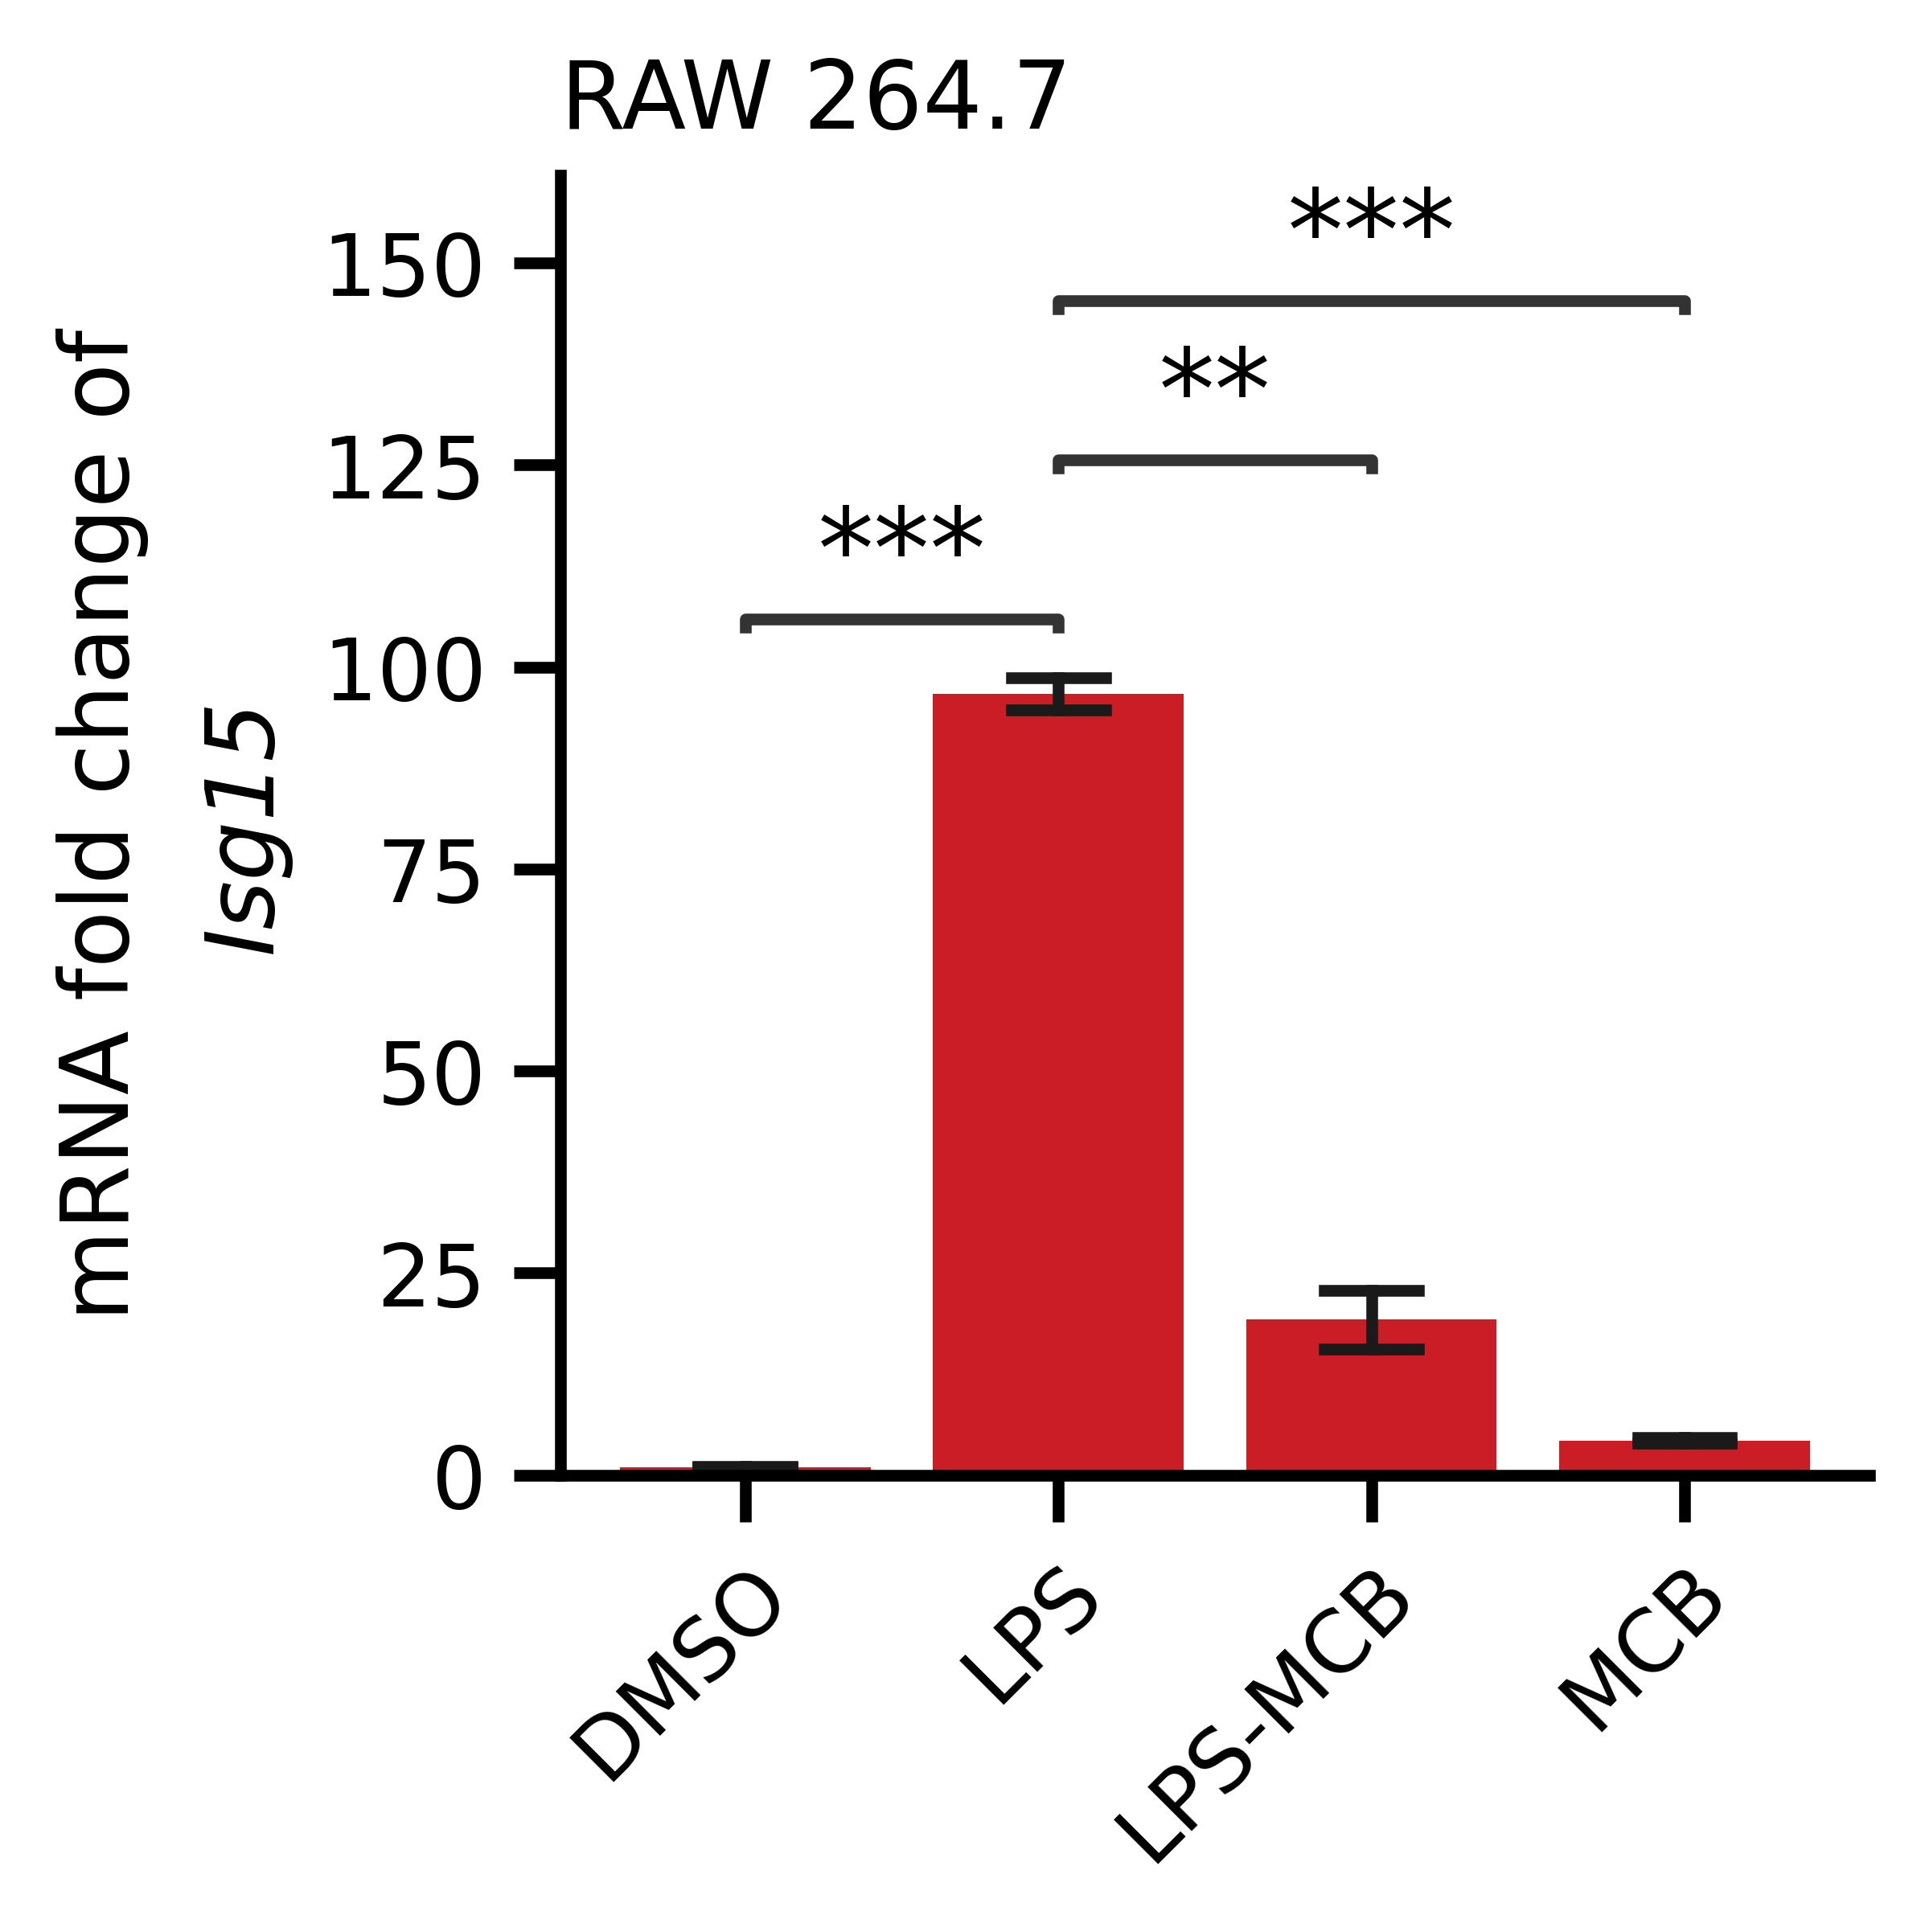

In [528]:
outDir = os.getcwd()

with sns.plotting_context('notebook', font_scale=1.2):
    x='样本名称'
    y='fc'
    gene = 'Isg15'
    fc = 'mRNA fold change of'
    # fc = ''
    fig = plt.figure(figsize=(3,3), dpi=700)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x, 
        capsize=0.3, errwidth=1.5, palette=[sns.color_palette('bright')[3]],
        errcolor='0.1')
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=12)
    ax.set_ylabel('', fontsize=12)
    ax.text(-0.35,0.5,f'{fc}', fontsize=12, fontstyle='normal', va='center', ha='center', rotation='vertical', transform=ax.transAxes)
    # mRNA = ax.text(-1.35, 45, f'{gene}', fontsize=12, fontstyle='italic', va='center', ha='center', rotation='vertical')
    ax.set_ylabel(f'{gene}', fontsize=12, fontstyle='italic', loc='center')
    print(ax.get_ylim())
    ax.set_title('RAW 264.7', fontsize=12, loc='left')
    ax.set_xticks(range(int(len(exp)/2)), list(exp[x].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # ax.set_xticks(range(int(len(exp)/2)), ['DMSO', 'LPS', 'LPS-L68', 'L68'], rotation_mode='anchor', rotation=45, horizontalalignment='right')   
    
    pairs=[('LPS','DMSO'), ('LPS','LPS-MCB'),('LPS', 'MCB')]
    annotator = Annotator(g, pairs, data=exp, x=x, y=y)
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.01, verbose=True)
    annotator.apply_and_annotate()
plt.savefig(f'{outDir}/RAW_LPS-MCB_Cytokines_33_{gene}.pdf', dpi=700, bbox_inches='tight')

In [477]:
exp = exp.iloc[2:16,].reset_index(drop=True)
exp

,样本名称,检测项目,CT,ACTB,diff,pow,fc
0,LPS-MCB_10ul,mIfnb,24.94,17.60,-7.34,0.006172,24.501249
1,LPS-MCB_10ul,mIfnb,24.91,17.54,-7.37,0.006045,23.997021
2,LPS-MCB_20ul,mIfnb,24.54,17.48,-7.06,0.007494,29.749291
3,LPS-MCB_20ul,mIfnb,24.39,17.44,-6.95,0.008088,32.106275
4,LPS-MCB_2ul,mIfnb,25.81,18.30,-7.51,0.005486,21.777756
5,LPS-MCB_2ul,mIfnb,25.65,18.20,-7.45,0.005719,22.702565
6,LPS-MCB_50ul,mIfnb,25.70,17.72,-7.98,0.003961,15.722769
7,LPS-MCB_50ul,mIfnb,25.60,17.55,-8.05,0.003773,14.978107
8,LPS-MCB_5ul,mIfnb,25.43,17.88,-7.55,0.005336,21.182242
9,LPS-MCB_5ul,mIfnb,25.53,17.97,-7.56,0.005299,21.035926


In [478]:
exp['group'] = exp['样本名称'].str.split('_', expand=True)[0]
exp['MCB(μM)'] = exp['样本名称'].str.split('_', expand=True)[1]
exp['MCB(μM)'] = exp['MCB(μM)'].str.removesuffix('ul').astype(int)
exp = exp.sort_values(['group', 'MCB(μM)'], ascending=True).reset_index(drop=True)
exp['LPS(1μg/mL)'] = '+'
exp.loc[[0,1,12,13],'MCB(μM)'] = ['-','-',50,50]
exp.loc[[12,13],'LPS(1μg/mL)'] = ['-','-']
exp

,样本名称,检测项目,CT,ACTB,diff,pow,fc,group,MCB(μM),LPS(1μg/mL)
0,LPS_1000,mIfnb,24.40,17.59,-6.81,0.008912,35.378069,LPS,-,+
1,LPS_1000,mIfnb,24.37,17.57,-6.80,0.008974,35.624143,LPS,-,+
2,LPS-MCB_2ul,mIfnb,25.81,18.30,-7.51,0.005486,21.777756,LPS-MCB,2,+
3,LPS-MCB_2ul,mIfnb,25.65,18.20,-7.45,0.005719,22.702565,LPS-MCB,2,+
4,LPS-MCB_5ul,mIfnb,25.43,17.88,-7.55,0.005336,21.182242,LPS-MCB,5,+
5,LPS-MCB_5ul,mIfnb,25.53,17.97,-7.56,0.005299,21.035926,LPS-MCB,5,+
6,LPS-MCB_10ul,mIfnb,24.94,17.60,-7.34,0.006172,24.501249,LPS-MCB,10,+
7,LPS-MCB_10ul,mIfnb,24.91,17.54,-7.37,0.006045,23.997021,LPS-MCB,10,+
8,LPS-MCB_20ul,mIfnb,24.54,17.48,-7.06,0.007494,29.749291,LPS-MCB,20,+
9,LPS-MCB_20ul,mIfnb,24.39,17.44,-6.95,0.008088,32.106275,LPS-MCB,20,+


In [481]:
exp.loc[9,'fc'] = 31.106275
exp

,样本名称,检测项目,CT,ACTB,diff,pow,fc,group,MCB(μM),LPS(1μg/mL)
0,LPS_1000,mIfnb,24.40,17.59,-6.81,0.008912,35.378069,LPS,-,+
1,LPS_1000,mIfnb,24.37,17.57,-6.80,0.008974,35.624143,LPS,-,+
2,LPS-MCB_2ul,mIfnb,25.81,18.30,-7.51,0.005486,21.777756,LPS-MCB,2,+
3,LPS-MCB_2ul,mIfnb,25.65,18.20,-7.45,0.005719,22.702565,LPS-MCB,2,+
4,LPS-MCB_5ul,mIfnb,25.43,17.88,-7.55,0.005336,21.182242,LPS-MCB,5,+
5,LPS-MCB_5ul,mIfnb,25.53,17.97,-7.56,0.005299,21.035926,LPS-MCB,5,+
6,LPS-MCB_10ul,mIfnb,24.94,17.60,-7.34,0.006172,24.501249,LPS-MCB,10,+
7,LPS-MCB_10ul,mIfnb,24.91,17.54,-7.37,0.006045,23.997021,LPS-MCB,10,+
8,LPS-MCB_20ul,mIfnb,24.54,17.48,-7.06,0.007494,29.749291,LPS-MCB,20,+
9,LPS-MCB_20ul,mIfnb,24.39,17.44,-6.95,0.008088,31.106275,LPS-MCB,20,+


In [483]:
exp.to_csv('Series_Concentration_Ifnb1.csv', index=None)

(0.0, 37.40535013406985)
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LPS_1000 vs. LPS-MCB_2ul: t-test independent samples, P_val:1.299e-03 t=2.771e+01
LPS_1000 vs. LPS-MCB_5ul: t-test independent samples, P_val:9.891e-05 t=1.005e+02
LPS_1000 vs. LPS-MCB_10ul: t-test independent samples, P_val:6.210e-04 t=4.011e+01
LPS_1000 vs. LPS-MCB_20ul: t-test independent samples, P_val:1.798e-02 t=7.357e+00
LPS_1000 vs. LPS-MCB_50ul: t-test independent samples, P_val:3.785e-04 t=5.139e+01


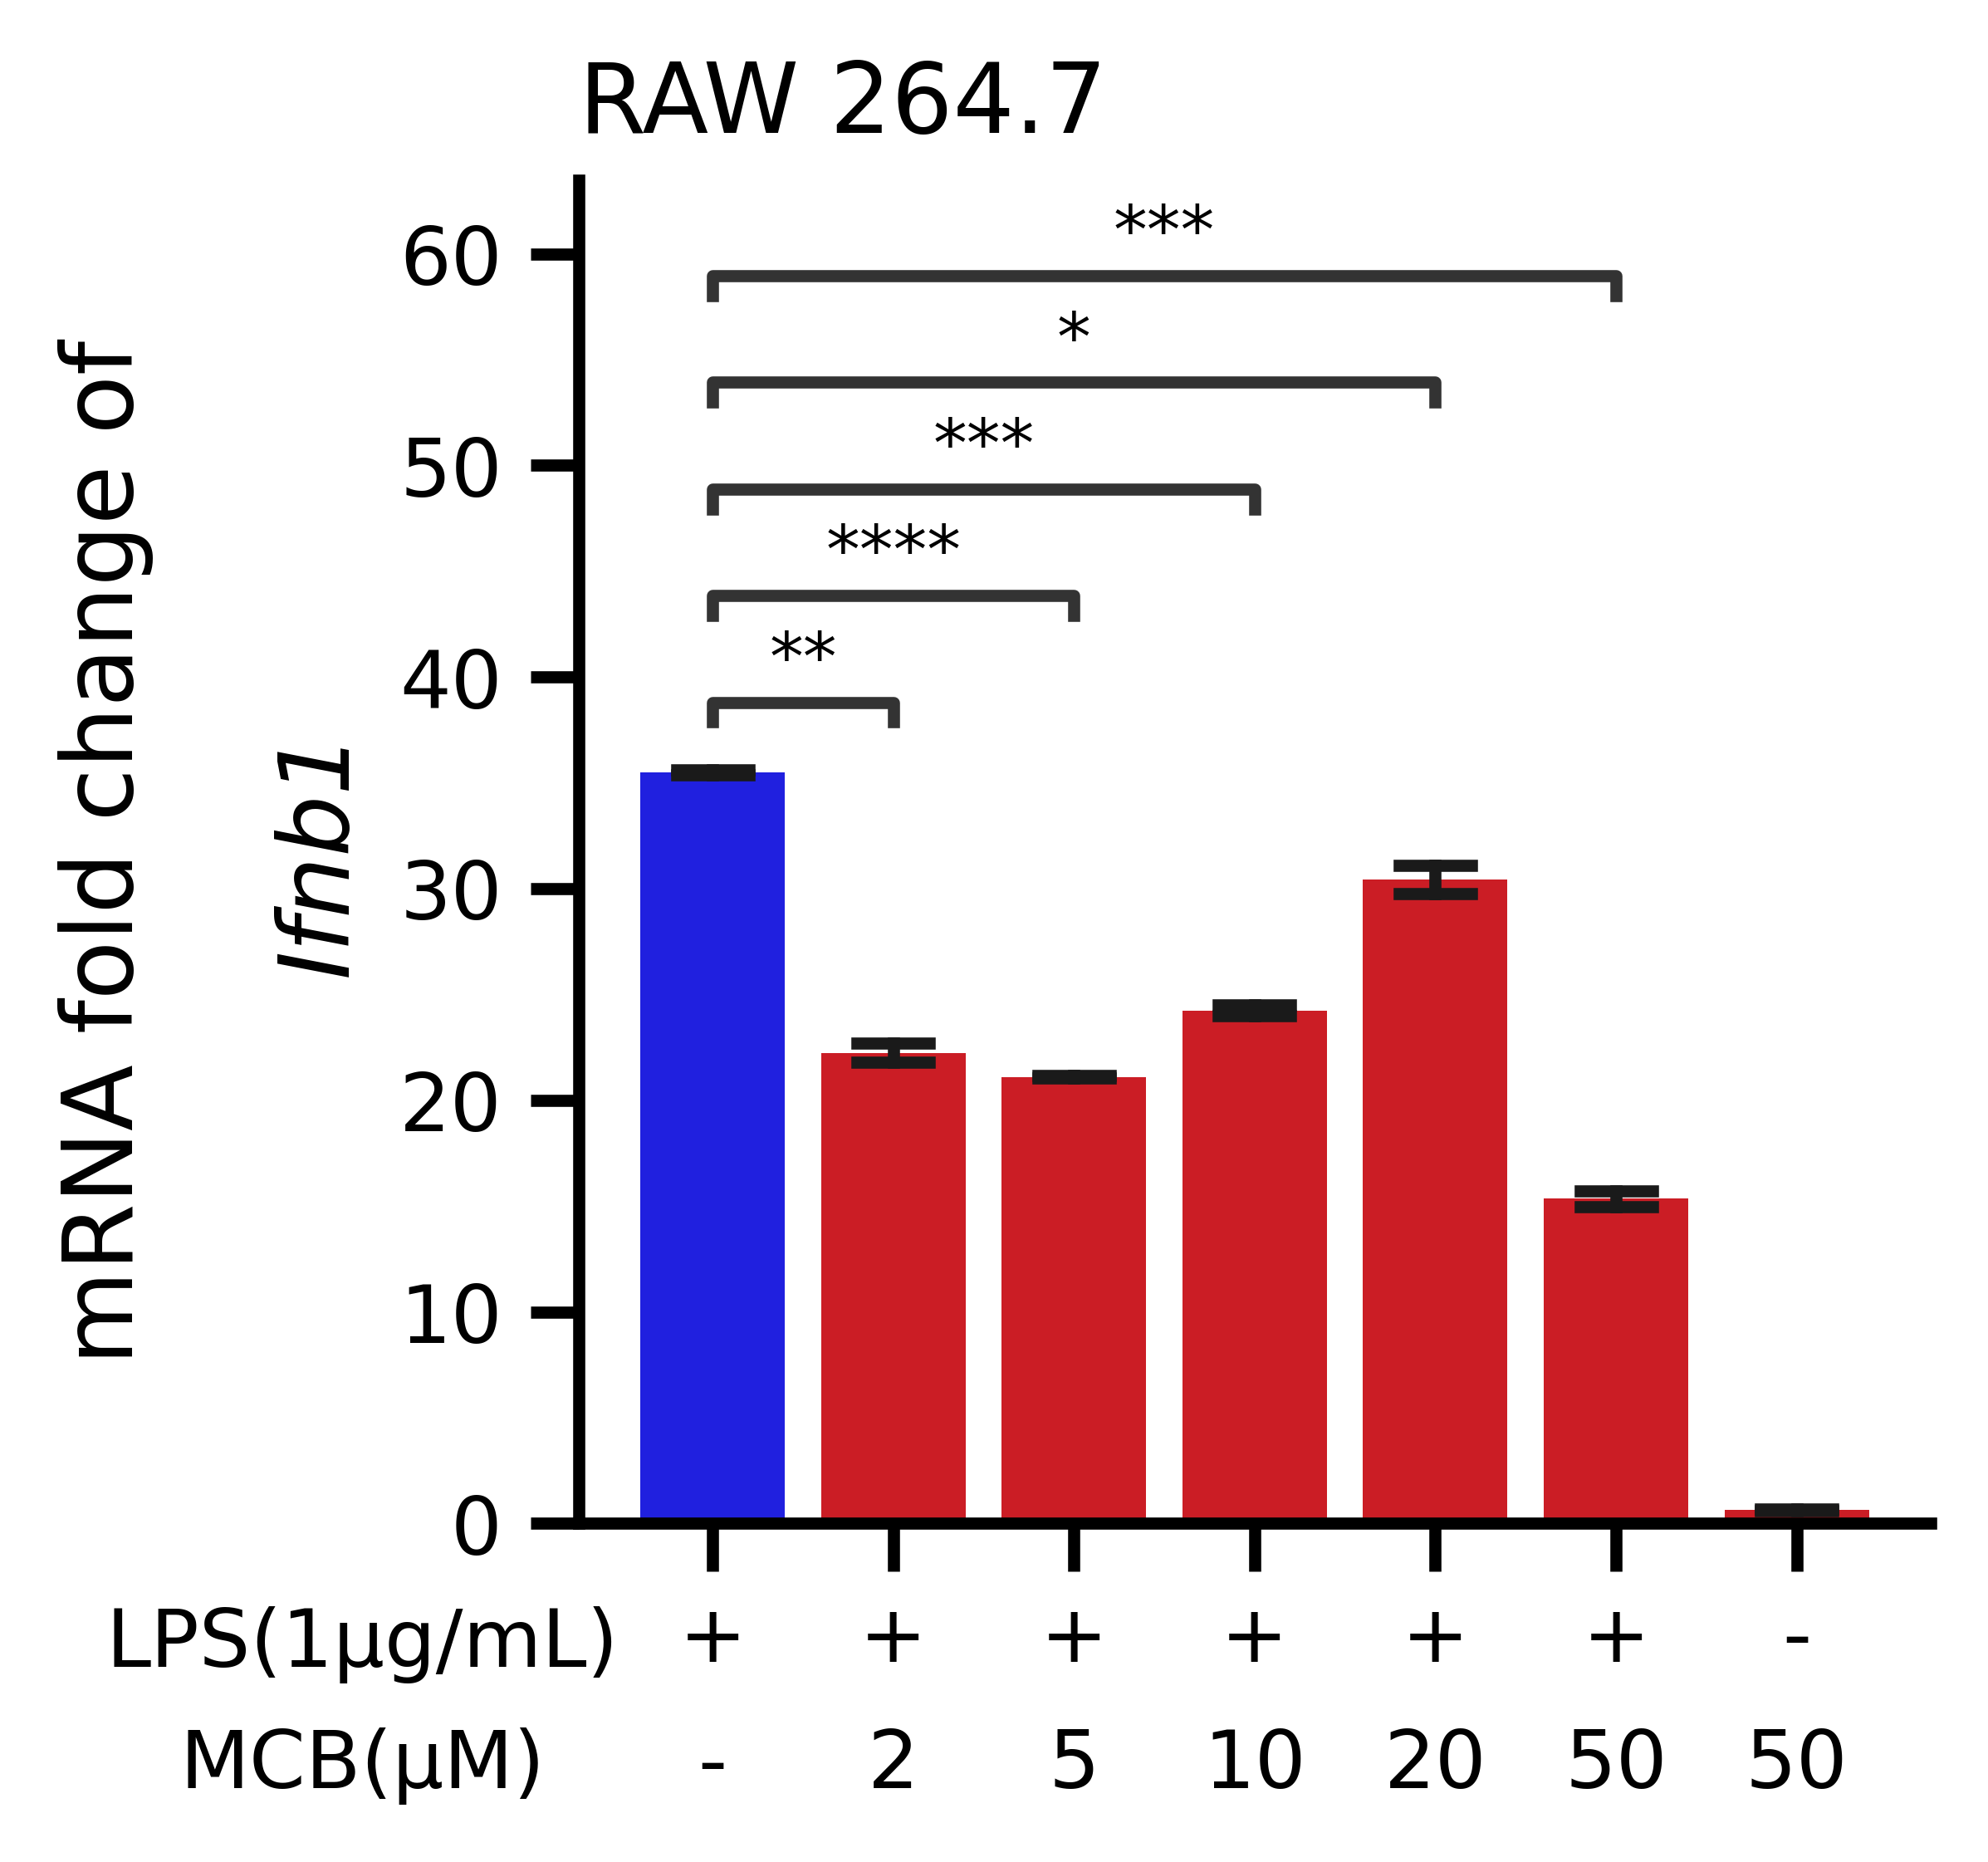

In [482]:
import matplotlib.transforms as transforms

outDir = os.getcwd()
with sns.plotting_context('notebook', font_scale=0.7):
    x='样本名称'
    y='fc'
    gene = 'Ifnb1'
    fc = 'mRNA fold change of'
    fig = plt.figure(figsize=(3,3), dpi=700)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x, 
        capsize=0.4, errwidth=1.5, palette=['blue'] + [sns.color_palette('bright')[3]]*6,
        errcolor='0.1')
    sns.despine()
    ax.tick_params(width=1.5, labelsize=10)
    ax.set_xlabel('', fontsize=12)
    ax.set_ylabel('', fontsize=12)
    ax.text(-0.35,0.5,f'{fc}', fontsize=12, fontstyle='normal', va='center', ha='center', rotation='vertical', transform=ax.transAxes)
    # mRNA = ax.text(-1.35, 45, f'{gene}', fontsize=12, fontstyle='italic', va='center', ha='center', rotation='vertical')
    ax.set_ylabel(f'{gene}', fontsize=12, fontstyle='italic', loc='center')
    print(ax.get_ylim())
    ax.set_title('RAW 264.7', fontsize=12, loc='left')

    # ax.set_xticks(range(int(len(exp)/2)), list(exp['LPS(1μg/mL)'].drop_duplicates())*6 + ['-'], rotation_mode='anchor', rotation=30, horizontalalignment='right')
    
    ax.text(-0.16,-0.09, 'LPS(1μg/mL)', fontsize=10, fontstyle='normal', va='center', ha='center', rotation=None, transform=ax.transAxes)
    ax.set_xticks(range(int(len(exp)/2)), ['+']*6 + ['-'], rotation_mode='anchor', rotation=0, horizontalalignment='center')

    # ax.text(0.5,-0.2, list(exp['MCB(μM)'].drop_duplicates()) + [50], fontsize=12, fontstyle='normal', va='center', ha='center', rotation=None, transform=ax.transAxes)


    ax.text(-0.16,-0.18, 'MCB(μM)', fontsize=10, fontstyle='normal', va='center', ha='center', rotation=None, transform=ax.transAxes)
    ax.text(0,-0.18, '-', fontsize=10, fontstyle='normal', va='center', ha='center', rotation=None, transform=transforms.blended_transform_factory(ax.transData, ax.transAxes))
    ax.text(1,-0.18, '2', fontsize=10, fontstyle='normal', va='center', ha='center', rotation=None, transform=transforms.blended_transform_factory(ax.transData, ax.transAxes))
    ax.text(2,-0.18, '5', fontsize=10, fontstyle='normal', va='center', ha='center', rotation=None, transform=transforms.blended_transform_factory(ax.transData, ax.transAxes))
    ax.text(3,-0.18, '10', fontsize=10, fontstyle='normal', va='center', ha='center', rotation=None, transform=transforms.blended_transform_factory(ax.transData, ax.transAxes))
    ax.text(4,-0.18, '20', fontsize=10, fontstyle='normal', va='center', ha='center', rotation=None, transform=transforms.blended_transform_factory(ax.transData, ax.transAxes))
    ax.text(5,-0.18, '50', fontsize=10, fontstyle='normal', va='center', ha='center', rotation=None, transform=transforms.blended_transform_factory(ax.transData, ax.transAxes))
    ax.text(6,-0.18, '50', fontsize=10, fontstyle='normal', va='center', ha='center', rotation=None, transform=transforms.blended_transform_factory(ax.transData, ax.transAxes))
    
    # ax.set_xticks(range(int(len(exp)/2)), ['DMSO', 'LPS', 'LPS-L68', 'L68'], rotation_mode='anchor', rotation=45, horizontalalignment='right')   
    
    pairs=[('LPS_1000','LPS-MCB_2ul'), ('LPS_1000','LPS-MCB_5ul'),('LPS_1000','LPS-MCB_10ul'),
           ('LPS_1000','LPS-MCB_20ul'), ('LPS_1000','LPS-MCB_50ul')
           ]
    annotator = Annotator(g, pairs, data=exp, x=x, y=y)
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.025, verbose=True)
    annotator.apply_and_annotate()
plt.savefig(f'{outDir}/RAW_LPS-MCB_24h_Concentration_33_{gene}.pdf', dpi=700, bbox_inches='tight')

In [301]:
# exp['group'] = exp['样本名称'].str.split('_', expand=True)[0]
# exp['time:h'] = exp['样本名称'].str.split('_', expand=True)[1]
# exp['time:h'] = exp['time:h'].str.removesuffix('ul').astype(int)
# exp = exp.sort_values(['group', 'time:h'], ascending=True).reset_index(drop=True)
# exp['LPS(1μg/mL)'] = '+'

# exp

In [461]:
os.getcwd()

'/Users/fenn/Documents/PhDProjects/MCB/qPCR/concentration'

In [460]:
exp.to_csv('Series_Concentration_Il6.csv', index=None)

In [283]:
os.listdir()

['Series_Concentration_Il1b.csv', '20240320_220329_MCB_Concentration.xls']

In [284]:
exp = pd.read_csv('Series_Concentration_Ifnb1.csv')
exp

,样本名称,检测项目,CT,ACTB,diff,pow,fc,group,time:h
0,LPS_1000,mIl1b,20.57,17.59,-2.98,0.126745,338.867035,LPS,1000
1,LPS_1000,mIl1b,20.52,17.57,-2.95,0.129408,345.987352,LPS,1000
2,LPS-MCB_2ul,mIl1b,21.40,18.30,-3.10,0.116629,311.821261,LPS-MCB,2
3,LPS-MCB_2ul,mIl1b,21.37,18.20,-3.17,0.111105,297.052782,LPS-MCB,2
4,LPS-MCB_5ul,mIl1b,22.36,17.88,-4.48,0.044811,119.807589,LPS-MCB,5
5,LPS-MCB_5ul,mIl1b,22.37,17.97,-4.40,0.047366,126.638783,LPS-MCB,5
6,LPS-MCB_10ul,mIl1b,23.29,17.60,-5.69,0.019370,51.789061,LPS-MCB,10
7,LPS-MCB_10ul,mIl1b,23.21,17.54,-5.67,0.019641,52.512009,LPS-MCB,10
8,LPS-MCB_20ul,mIl1b,26.67,17.48,-9.19,0.001712,4.577550,LPS-MCB,20
9,LPS-MCB_20ul,mIl1b,25.90,17.44,-8.46,0.002840,7.592503,LPS-MCB,20


[nan, 0.011924, 0.005681, 0.001878, 0.001888, 0.0173]


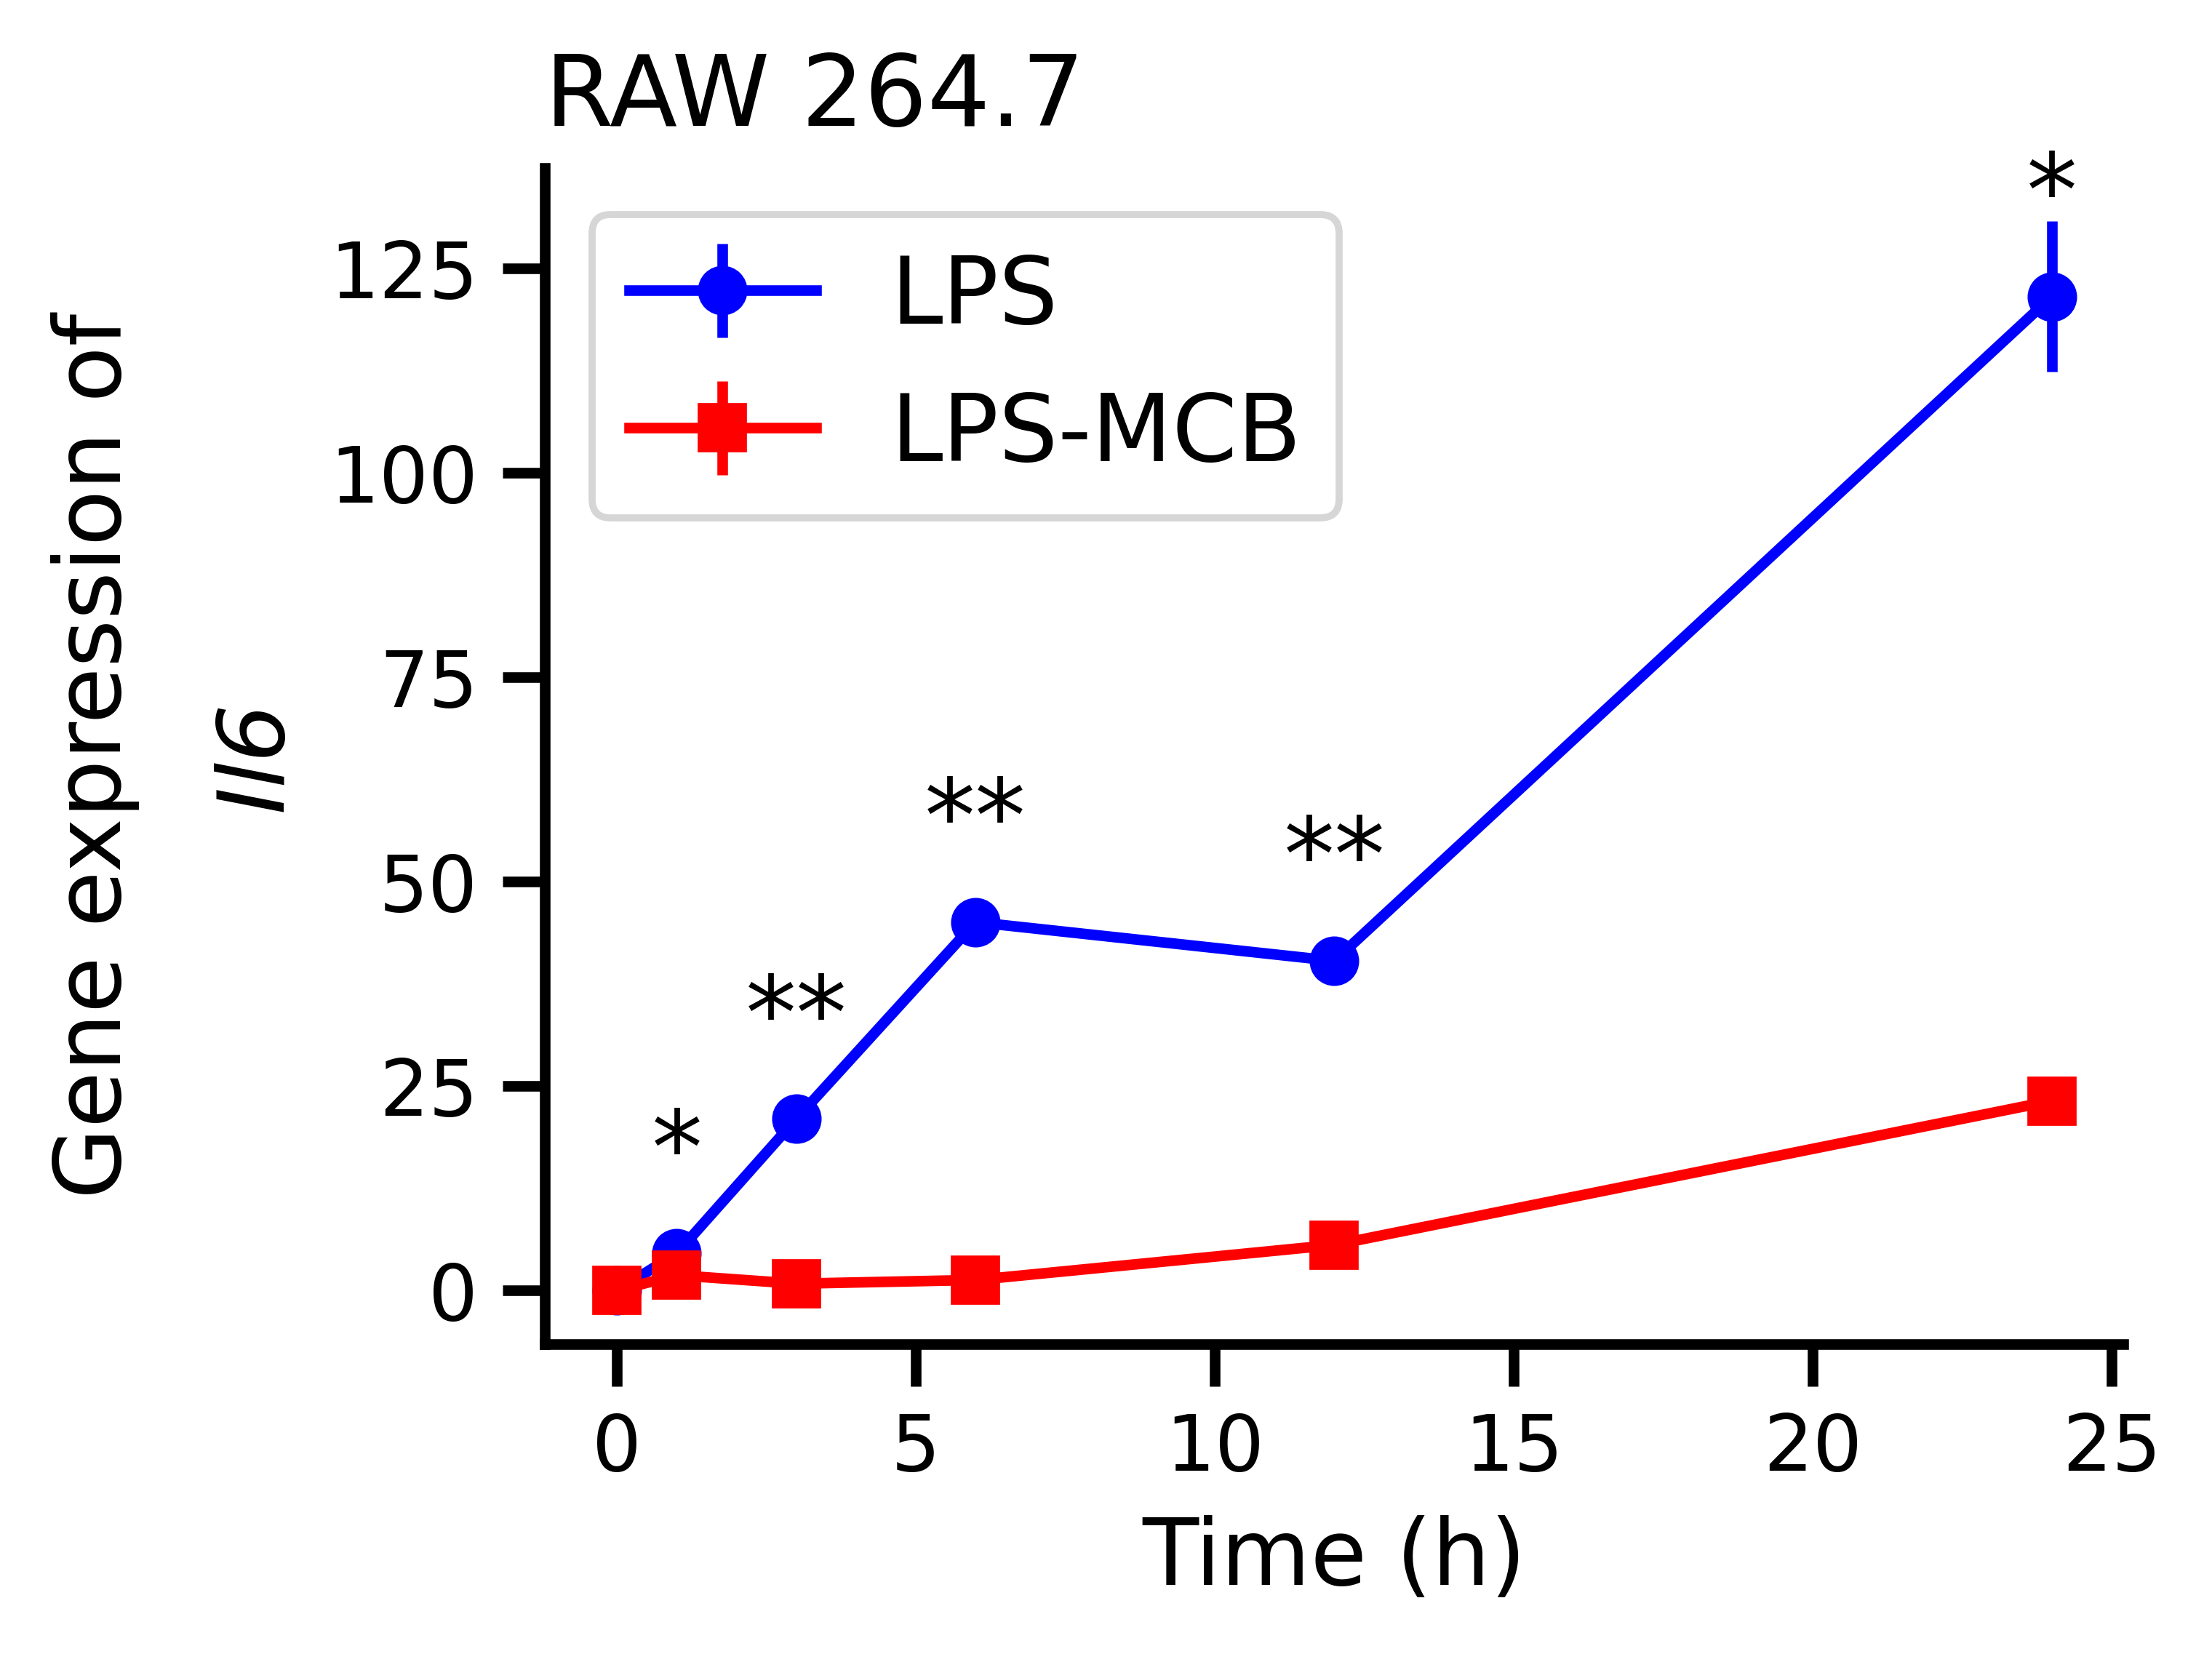

In [249]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

outDir =  os.getcwd()
# tumor = 'Pan02'
tumor = 'Il6'
fc = 'Gene expression of'

# 数据：两个组处理的肿瘤生存曲线数据
time_points = list(exp['time:h'].drop_duplicates())  # 时间点
# 按照 group_col 的值将 value_col 转换为嵌套列表
LPS = [list(day['fc']) for _, day in exp[exp['group'] == 'LPS'].groupby('time:h')]
LPS_MCB = [list(day['fc']) for _, day in exp[exp['group'] == 'LPS-MCB'].groupby('time:h')]

# 计算每个时间点的平均生存率和标准误差
group1_mean = np.mean(LPS, axis=1)
group1_std = np.std(LPS, axis=1) / np.sqrt(len(LPS[0]))
group2_mean = np.mean(LPS_MCB, axis=1)
group2_std = np.std(LPS_MCB, axis=1) / np.sqrt(len(LPS_MCB[0]))

# 进行独立样本t检验
pList = []
for i in range(len(LPS)):
    t_stat, p_val = ttest_ind(LPS[i], LPS_MCB[i])
    pList.append(p_val.round(6))

print(pList)
p_values = pList

# 定义星号字典
star_dict = {0.001: '***', 0.01: '**', 0.05: '*'}

# 创建带有误差线的生存曲线图

with sns.plotting_context('notebook', font_scale=1.2):
    fig = plt.figure(figsize=(4, 3), dpi=700)
    ax = fig.add_subplot(111)
    plt.errorbar(time_points, group1_mean, yerr=group1_std, fmt='-o', color='b', label='LPS')
    plt.errorbar(time_points, group2_mean, yerr=group2_std, fmt='-s', color='r', label='LPS-MCB')

    # 添加星号标记
    for i in range(len(time_points)):
        for p_value, star in star_dict.items():
            if p_values[i] < p_value:  # 根据p值阈值在相应时间点上添加相应数量的星号标记
                plt.annotate(star, (time_points[i], group1_mean[i]), textcoords="offset points", xytext=(0,10), ha='center')
                break

    # 添加标题和标签
    # plt.title(f'Expression of {tumor} upon LPS treatment', fontdict={'fontsize': 14}, loc='left')
    ax.set_title('RAW 264.7', fontsize=14, loc='left')
    plt.xlabel('Time (h)', fontsize=13)
    ax.text(-0.285,0.5,f'{fc}', fontsize=13, fontstyle='normal', va='center', ha='center', rotation='vertical', transform=ax.transAxes)
    # mRNA = ax.text(-1.35, 45, f'{gene}', fontsize=12, fontstyle='italic', va='center', ha='center', rotation='vertical')
    
    ax.set_ylabel(f'{tumor}', fontsize=13, fontstyle='italic', loc='center')
     
    sns.despine()
    ax.spines[['bottom','left']].set_linewidth(1.5)
    ax.tick_params(width=1.5,labelsize=11)
    # 显示网格
    plt.grid(False)
    # 显示图例
    plt.legend()
    plt.savefig(f'{outDir}/TimeSeries_{tumor}_RAW_LPS-MCB.pdf', dpi=700, bbox_inches='tight')

    # 显示图形
    plt.show()

In [138]:
exp.loc[[2],'fc'] = [289.431084]
exp

,样本名称,检测项目,CT,ACTB,diff,pow,fc
0,DMSO,mil6,28.99,20.63,-8.36,0.003044,1.058849
1,DMSO,mil6,29.27,20.74,-8.53,0.002705,0.941151
2,LPS,mil6,19.40,18.92,-0.48,0.716978,289.431084
3,LPS,mil6,19.55,19.38,-0.17,0.888843,309.221635
4,LPS-MCB,mil6,25.69,21.65,-4.04,0.060791,21.148705
5,LPS-MCB,mil6,25.82,21.85,-3.97,0.063813,22.200149
6,MCB,mil6,30.16,22.20,-7.96,0.004016,1.397160
7,MCB,mil6,30.32,22.27,-8.05,0.003773,1.312664


In [140]:
outDir = '/Users/fenn/Documents/PhDProjects/MCB/qPCR/filterqPCR_Table'
exp.to_csv(outDir + '/mRNA-IL6-filter_LPS-MCB_24h.csv', index=None)

(0.0, 324.6827169704249)
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

DMSO vs. LPS: t-test independent samples, P_val:1.098e-03 t=-3.015e+01
LPS vs. LPS-MCB: t-test independent samples, P_val:1.271e-03 t=2.802e+01
LPS vs. MCB: t-test independent samples, P_val:1.101e-03 t=3.011e+01


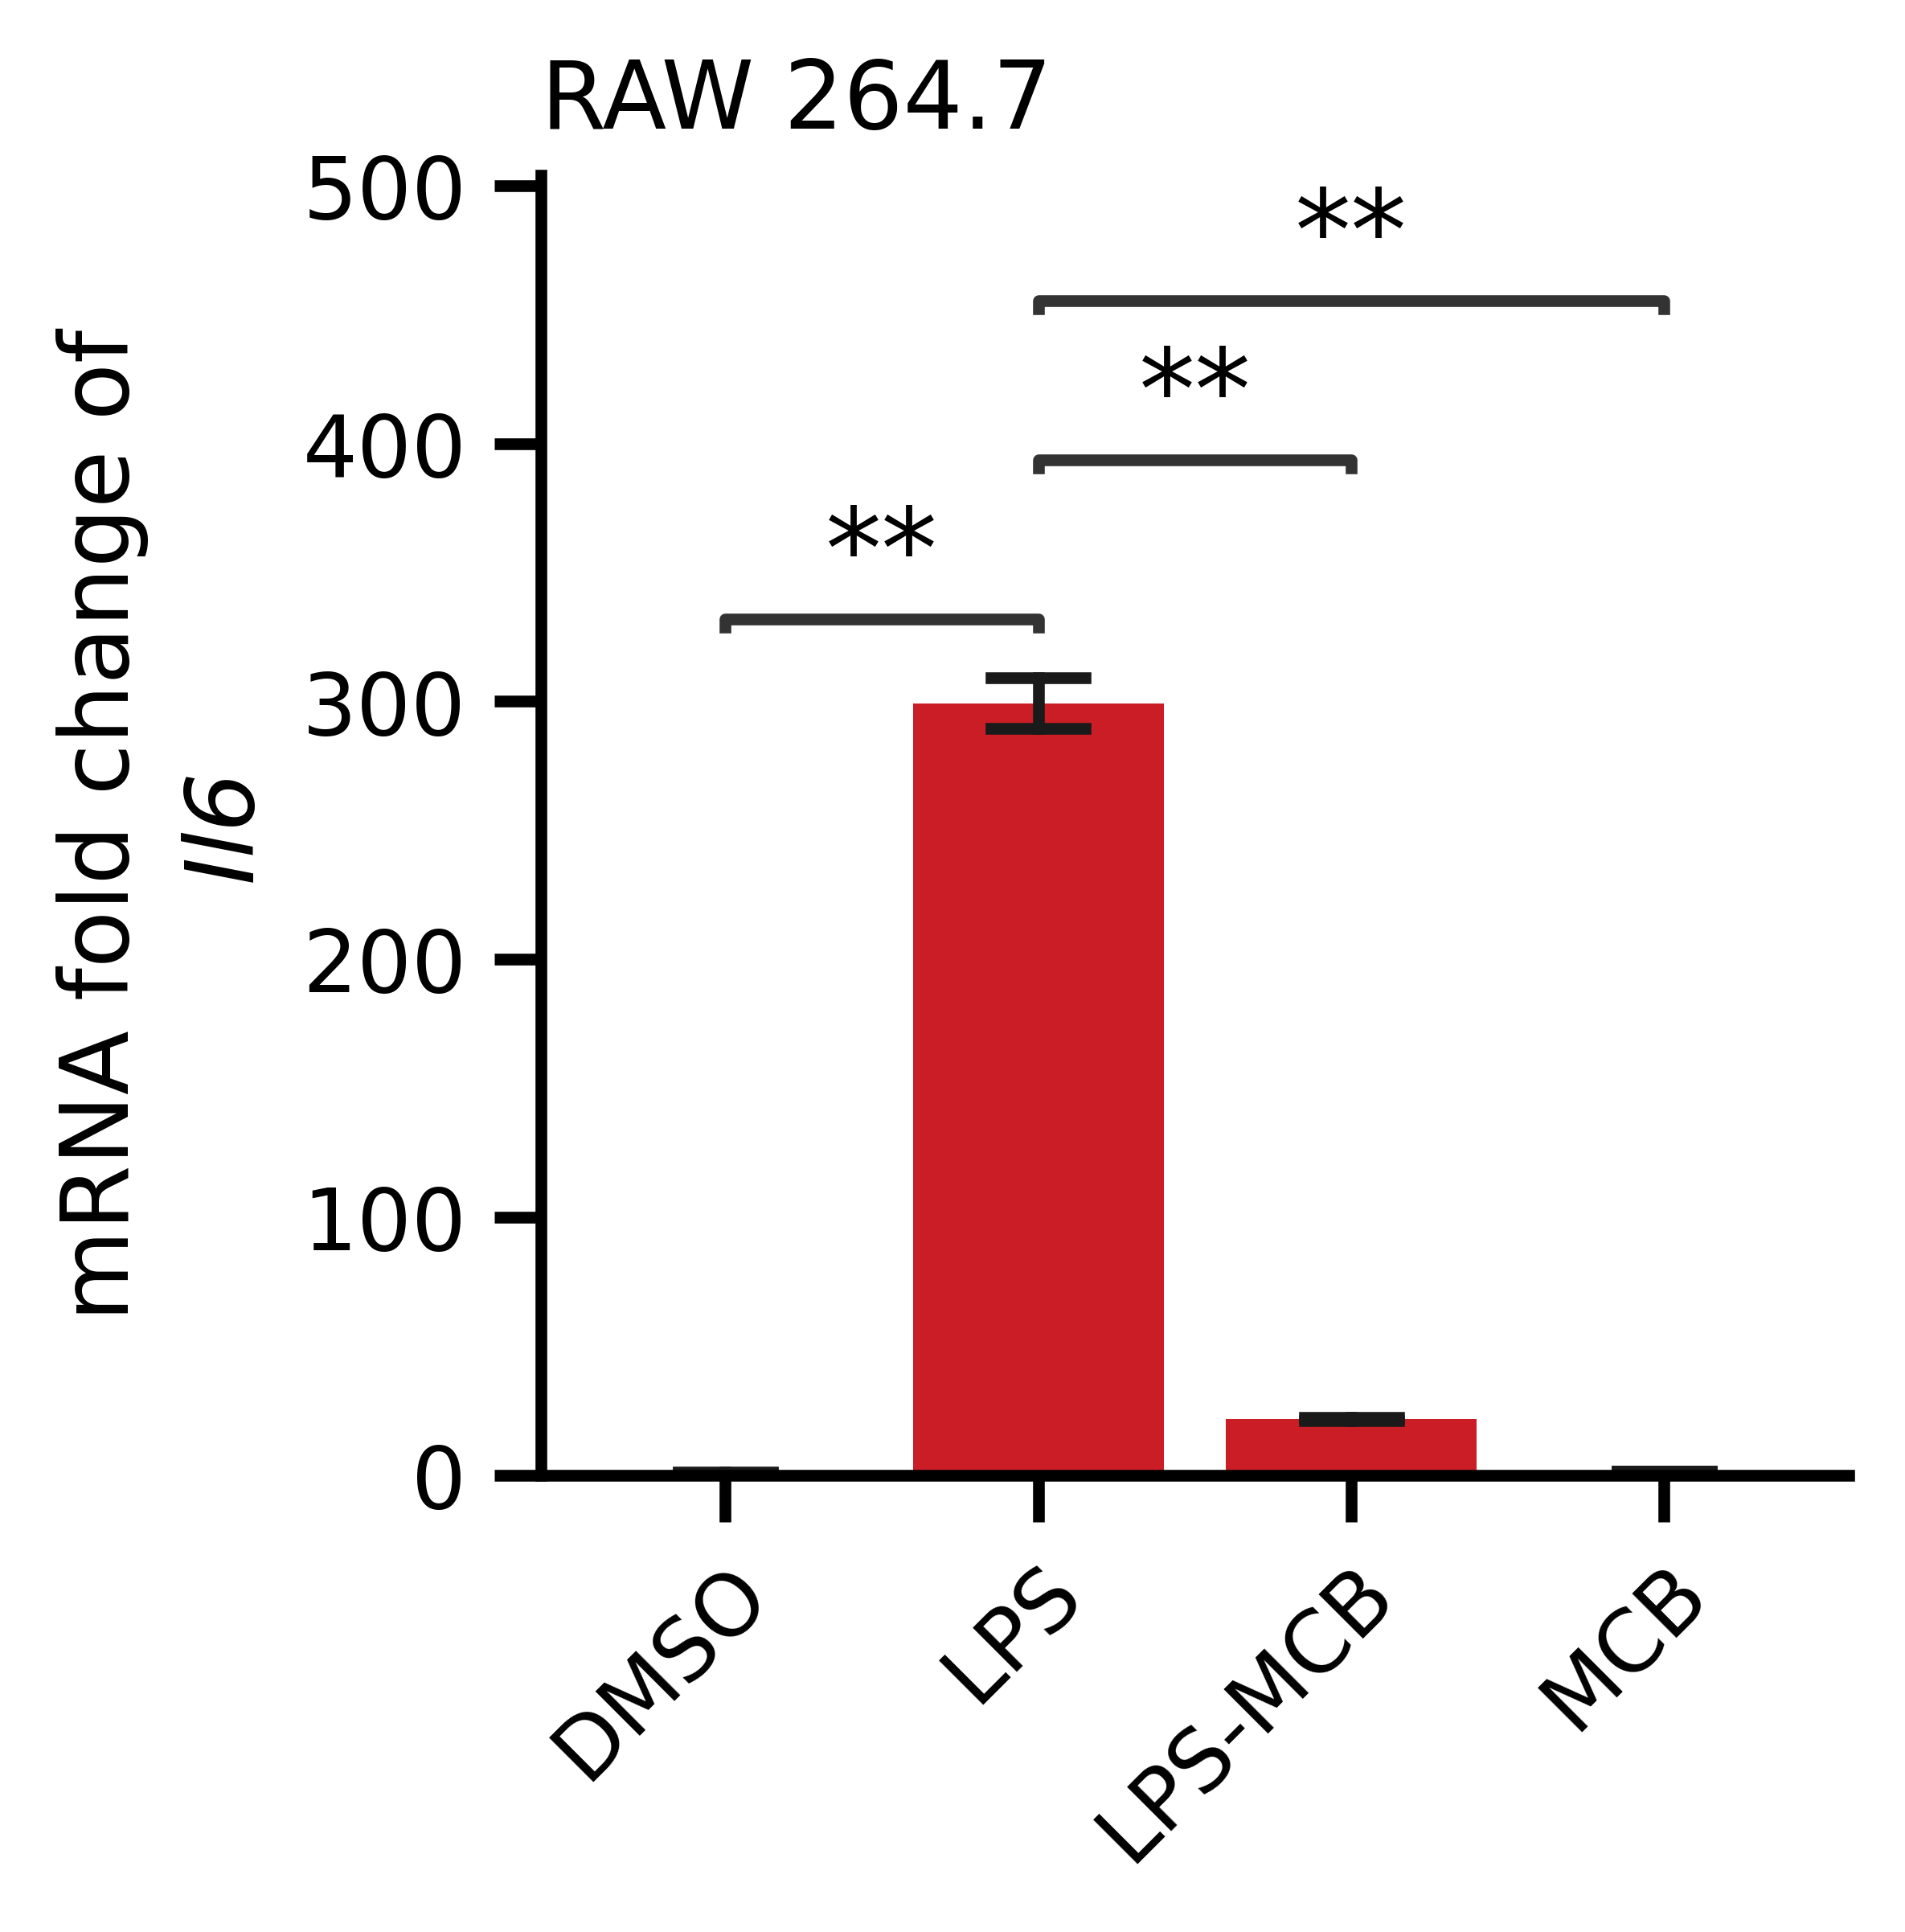

In [139]:

outDir = '/Users/fenn/Documents/PhDProjects/MCB/qPCR/filterqPCR_Table'
with sns.plotting_context('notebook', font_scale=1.2):
    x='样本名称'
    y='fc'
    gene = 'Il6'
    fc = 'mRNA fold change of'
    fig = plt.figure(figsize=(3,3), dpi=700)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x, 
        capsize=0.3, errwidth=1.5, palette=[sns.color_palette('bright')[3]],
        errcolor='0.1')
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=12)
    ax.set_ylabel('', fontsize=12)
    ax.text(-0.335,0.5,f'{fc}', fontsize=12, fontstyle='normal', va='center', ha='center', rotation='vertical', transform=ax.transAxes)
    # mRNA = ax.text(-1.35, 45, f'{gene}', fontsize=12, fontstyle='italic', va='center', ha='center', rotation='vertical')
    ax.set_ylabel(f'{gene}', fontsize=12, fontstyle='italic', loc='center')
    print(ax.get_ylim())
    ax.set_title('RAW 264.7', fontsize=12, loc='left')
    ax.set_xticks(range(int(len(exp)/2)), list(exp[x].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # ax.set_xticks(range(int(len(exp)/2)), ['DMSO', 'LPS', 'LPS-L68', 'L68'], rotation_mode='anchor', rotation=45, horizontalalignment='right')   
    
    pairs=[('LPS','DMSO'), ('LPS','LPS-MCB'),('LPS', 'MCB')]
    annotator = Annotator(g, pairs, data=exp, x=x, y=y)
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.01, verbose=True)
    annotator.apply_and_annotate()
plt.savefig(f'{outDir}/RAW_LPS-MCB_24h_33_{gene}.pdf', dpi=700, bbox_inches='tight')

In [109]:
grp1 = list(exp[exp['样本名称']=='DMSO']['fc'])
grp2 = list(exp[exp['样本名称']=='LPS']['fc'])
grp3 = list(exp[exp['样本名称']=='LPS_MCB1']['fc'])
grp4 = list(exp[exp['样本名称']=='MCB1']['fc'])
print(stats.bartlett(grp1, grp2, grp3, grp4))
F,p = stats.f_oneway(grp1, grp2, grp3, grp4)
print(F,p)
print(red('\n多重比较:', 'italic'))
if p<0.05:
    dataMerge = grp1+grp2+grp3+grp4
    grpLabels = ['DMSO']*len(grp1) + ['LPS']*len(grp2) + ['LPS_MCB1']*len(grp3) + ['MCB1']*len(grp4)
    tukeyRes = pairwise_tukeyhsd(dataMerge, grpLabels)
    print(tukeyRes)

BartlettResult(statistic=8.706266364490876, pvalue=0.03346222960675049)
507.19962940689175 1.287836153043276e-05

多重比较:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj  lower    upper   reject
---------------------------------------------------------
    DMSO      LPS  47.6477   0.0  41.7469  53.5484   True
    DMSO LPS_MCB1   5.2767 0.071  -0.6241  11.1774  False
    DMSO     MCB1  -0.0229   1.0  -5.9237   5.8778  False
     LPS LPS_MCB1  -42.371   0.0 -48.2717 -36.4702   True
     LPS     MCB1 -47.6706   0.0 -53.5714 -41.7699   True
LPS_MCB1     MCB1  -5.2996  0.07 -11.2004   0.6011  False
---------------------------------------------------------


In [49]:
exp.loc[[12,13],'fc'] = [3215.263039,3634.058566]
exp

,样本名称,检测项目,CT,ACTB,diff,pow,fc
0,DMSO,mIl1b,35.32,20.87,-14.45,0.000045,1.120709
1,DMSO,mIl1b,36.00,21.20,-14.80,0.000035,0.879291
2,LPS,mIl1b,20.64,21.50,0.86,1.815038,4526.000000
3,LPS,mIl1b,20.68,21.97,1.29,2.445281,4334.000000
4,Co68+LPS,mIl1b,36.25,20.59,-15.66,0.000019,0.484447
5,Co68+LPS,mIl1b,36.60,20.92,-15.68,0.000019,0.477778
6,Co68,mIl1b,31.70,21.02,-10.68,0.000610,15.288894
7,Co68,mIl1b,33.11,21.08,-12.03,0.000239,5.997711
8,FGR_KO_DMSO,mIl1b,30.91,20.97,-9.94,0.001018,25.535141
9,FGR_KO_DMSO,mIl1b,31.38,21.01,-10.37,0.000756,18.953759


In [12]:
samples = list(exp['样本名称'].drop_duplicates())
# samples
grp = {}
for i in list(range(len(samples))):
    grp[f'grp{i+1}'] = list(exp[exp['样本名称']== samples[i]]['fc'])    
values = tuple(grp.values())
print(stats.bartlett(*values))
F,p = stats.f_oneway(*values)
print(F,p)
print(red('\n多重比较:', 'italic'))
if p<0.05:
    dataMerge = list(exp['fc'])
    bioDup = int(len(exp)/len(samples))
    # grpLabels = [samples[0]]*bioDup + [samples[1]]*bioDup + [samples[2]]*bioDup + [samples[3]]*bioDup
    grpLabels = list(exp['样本名称'])
    tukeyRes = pairwise_tukeyhsd(dataMerge, grpLabels)
    print(tukeyRes)

BartlettResult(statistic=70.47386471657678, pvalue=1.1850109714541931e-12)
43.80139211952657 9.317872373370535e-06

多重比较:
              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
     group1          group2      meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------------------------
           CO68        CO68+LPS   -10.1622    1.0 -15730.5282 15710.2038  False
           CO68            DMSO    -9.6433    1.0 -15730.0093 15710.7227  False
           CO68        FGR_CO68    66.7666    1.0 -15653.5994 15787.1326  False
           CO68 FGR_KO_CO68+LPS  5214.0175 0.8715 -10506.3485 20934.3835  False
           CO68     FGR_KO_DMSO    11.6011    1.0 -15708.7649 15731.9671  False
           CO68      FGR_KO_LPS  2455.2165 0.9974 -13265.1495 18175.5825  False
           CO68             LPS 53419.7688    0.0  37699.4028 69140.1348   True
       CO68+LPS            DMSO     0.5189    1.0 -15719.8471 15720.8849  Fals

In [37]:
exp = Fgr.iloc[[4,5,14,15,2,3,0,1,10,11,12,13,8,9,6,7],:].reset_index(drop=True)
exp

,样本名称,检测项目,CT,ACTB,diff,pow,fc
0,DMSO,mIl1b,35.32,20.87,-14.45,0.000045,1.120709
1,DMSO,mIl1b,36.00,21.20,-14.80,0.000035,0.879291
2,LPS,mIl1b,20.64,21.50,0.86,1.815038,4526.000000
3,LPS,mIl1b,20.68,21.97,1.29,2.445281,4334.000000
4,Co68+LPS,mIl1b,36.25,20.59,-15.66,0.000019,0.484447
5,Co68+LPS,mIl1b,36.60,20.92,-15.68,0.000019,0.477778
6,Co68,mIl1b,31.70,21.02,-10.68,0.000610,15.288894
7,Co68,mIl1b,33.11,21.08,-12.03,0.000239,5.997711
8,FGR_KO_DMSO,mIl1b,30.91,20.97,-9.94,0.001018,25.535141
9,FGR_KO_DMSO,mIl1b,31.38,21.01,-10.37,0.000756,18.953759


In [38]:
from scipy import stats
from scipy.stats import f_oneway
from simple_colors import *

import re
def power2(x):
    return pow(2,x)

def FCCal(data,gene,base):
    data = data.loc[:,["样本名称","检测项目","CT"]].sort_values(by=["检测项目","样本名称", 'CT'], ascending=[True,True,True]).reset_index(drop=True)
    IFNB = data[data['检测项目'].str.contains(f'AC|{gene}', flags=re.IGNORECASE)]
    ifnb = IFNB.fillna(36).reset_index(drop=True)
    ifnb["diff"] = -ifnb["CT"].diff(periods=len(IFNB['CT'])/2)
    ifnb['pow'] = ifnb['diff'].apply(power2)
    exp = ifnb.dropna().reset_index(drop=True)
    #add the value of ACTB
    exp.insert(3,'ACTB', ifnb.loc[list(range(int(len(IFNB['CT'])/2))), 'CT'])
    fc1 = exp[exp['样本名称'].str.contains(f'{base}', flags=re.IGNORECASE)]['pow'].mean()
    # fc1 = exp[exp['样本名称'] == 'dmso']['pow'].mean()
    exp['fc'] = exp['pow'].div(fc1)
    return exp


def one_Way(exp):
    samples = list(exp['样本名称'].drop_duplicates())
    # samples
    grp = {}
    for i in list(range(len(samples))):
        grp[f'grp{i+1}'] = list(exp[exp['样本名称']== samples[i]]['fc'])    
    values = tuple(grp.values())
    print(stats.bartlett(*values))
    F,p = stats.f_oneway(*values)
    print(F,p)
    if p<0.05:
        print(red('\n多重比较:', 'italic'))
        dataMerge = list(exp['fc'])
        bioDup = int(len(exp)/len(samples))
        # grpLabels = [samples[0]]*bioDup + [samples[1]]*bioDup + [samples[2]]*bioDup + [samples[3]]*bioDup
        grpLabels = list(exp['样本名称'])
        tukeyRes = pairwise_tukeyhsd(dataMerge, grpLabels)
        print(tukeyRes)

In [39]:
one_Way(exp)

BartlettResult(statistic=50.38464587770781, pvalue=1.2138697731360794e-08)
59.096970250940245 2.9253734925086543e-06

多重比较:
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
     group1          group2      meandiff  p-adj    lower      upper    reject
------------------------------------------------------------------------------
           Co68        Co68+LPS   -10.1622    1.0 -1621.7031  1601.3787  False
           Co68            DMSO    -9.6433    1.0 -1621.1842  1601.8976  False
           Co68     FGR_KO_Co68    66.7666    1.0 -1544.7743  1678.3075  False
           Co68 FGR_KO_Co68+LPS  5214.0175    0.0  3602.4766  6825.5584   True
           Co68     FGR_KO_DMSO    11.6011    1.0 -1599.9398  1623.1421  False
           Co68      FGR_KO_LPS  2455.2165 0.0044   843.6756  4066.7574   True
           Co68             LPS  4419.3567 0.0001  2807.8158  6030.8976   True
       Co68+LPS            DMSO     0.5189    1.0  -1611.022  1612.0598  False
       

(0.0, 4160.68522664535)
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

DMSO vs. LPS: t-test independent samples, P_val:3.861e-03 t=-1.605e+01
LPS vs. LPS-MCB: t-test independent samples, P_val:4.818e-03 t=1.435e+01
LPS vs. MCB: t-test independent samples, P_val:3.863e-03 t=1.604e+01


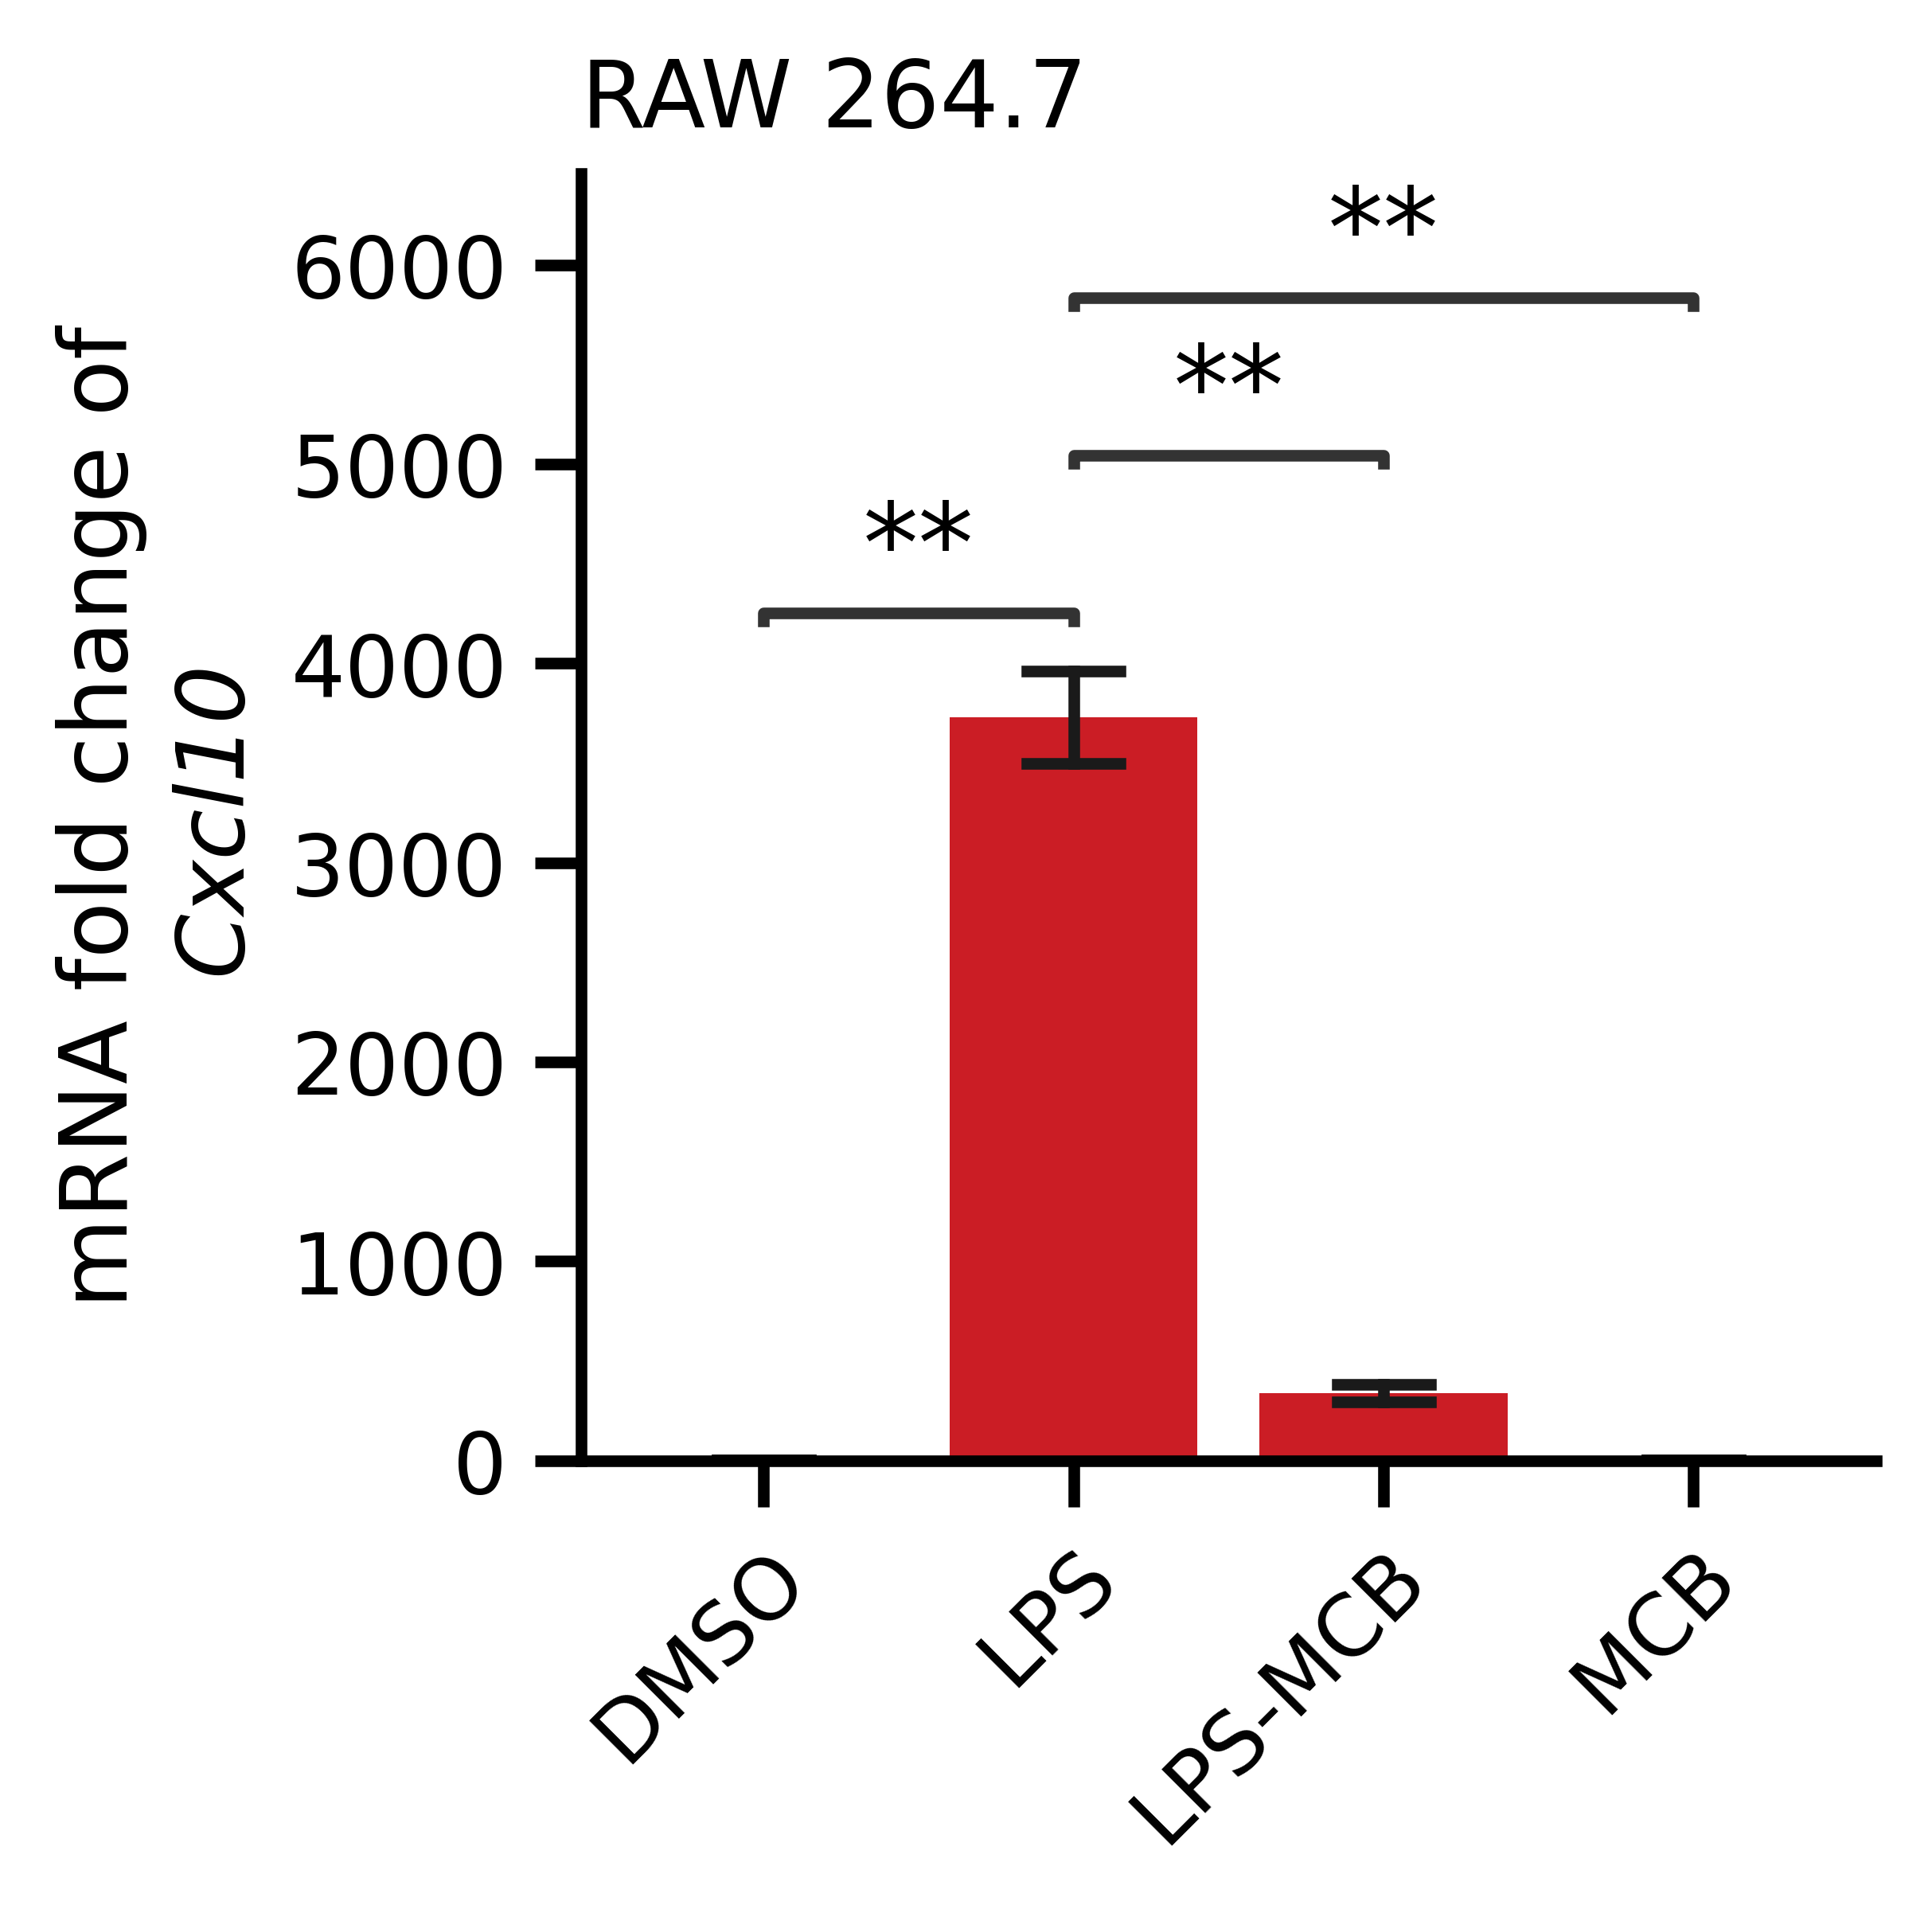

In [48]:
# plt.rcParams['text.latex.preamble'] = r'\usepackage{helvet}\renewcommand\familydefault{\sfdefault}'
# 设置字体为 Arial
# plt.rcParams.update({
#     "text.usetex": False,
#     "font.family": "Arial",
#     "font.sans-serif": "Arial",
# })

outDir = '/Users/fenn/Documents/PhDProjects/MCB/qPCR/filterqPCR_Table'
with sns.plotting_context('notebook', font_scale=1.2):
    x='样本名称'
    y='fc'
    gene = 'Cxcl10'
    fc = 'mRNA fold change of'
    fig = plt.figure(figsize=(3,3), dpi=700)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x, 
        capsize=0.3, errwidth=1.5, palette=[sns.color_palette('bright')[3]],
        errcolor='0.1')
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=12)
    ax.set_ylabel('', fontsize=12)
    ax.text(-0.37,0.5,f'{fc}', fontsize=12, fontstyle='normal', va='center', ha='center', rotation='vertical', transform=ax.transAxes)
    # mRNA = ax.text(-1.35, 45, f'{gene}', fontsize=12, fontstyle='italic', va='center', ha='center', rotation='vertical')
    ax.set_ylabel(f'{gene}', fontsize=12, fontstyle='italic', loc='center')
    print(ax.get_ylim())
    ax.set_title('RAW 264.7', fontsize=12, loc='left')
    ax.set_xticks(range(int(len(exp)/2)), list(exp[x].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # ax.set_xticks(range(int(len(exp)/2)), ['DMSO', 'LPS', 'LPS-L68', 'L68'], rotation_mode='anchor', rotation=45, horizontalalignment='right')   
    
    pairs=[('LPS','DMSO'), ('LPS','LPS-MCB'),('LPS', 'MCB')]
    annotator = Annotator(g, pairs, data=exp, x=x, y=y)
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.01, verbose=True)
    annotator.apply_and_annotate()
plt.savefig(f'{outDir}/RAW_LPS-MCB_24h_33_{gene}.pdf', dpi=700, bbox_inches='tight')

In [249]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
anovaRes = anova_lm(ols('fc~C(样本名称)', exp).fit(), typ=2)
anovaRes

,sum_sq,df,F,PR(>F)
C(样本名称),625204.431790,4.0,1228.443927,1.152219e-07
Residual,636.175183,5.0,NaN,NaN


In [284]:
exp = data[data['cells'] == 'CD4 T']
# exp.loc[11,'Ratio'] = 15.37
exp

,group,cells,Ratio
12,Co68,CD4 T,1.08
13,Co68,CD4 T,1.19
14,PBS,CD4 T,2.86
15,PBS,CD4 T,2.56


In [232]:
from scipy import stats
from scipy.stats import f_oneway

s1 = exp[exp['样本名称'] == 'Co68']['fc']
s2 = exp[exp['样本名称'] == 'MD2']['fc']
s3 = exp[exp['样本名称'] == 'MyD88']['fc']
s4 = exp[exp['样本名称'] == 'TRIF']['fc']
s5 = exp[exp['样本名称'] == 'IN-1']['fc']

args = [s1,s2,s3,s4,s5]

w,p = stats.levene(*args)
print(w)
p
# f_statistic, p_value = f_oneway(*args)
 
# # Output the results
# print("F-statistic:", f_statistic)
# print("P-value:", p_value)

inf


0.0

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

RAW_LPS_4H_7FREE vs. RAW_LPS_4H_7MCB: t-test independent samples, P_val:1.028e-03 t=3.116e+01
RAW_LPS_11H vs. RAW_LPS_4H_7MCB: t-test independent samples, P_val:1.069e-03 t=3.056e+01


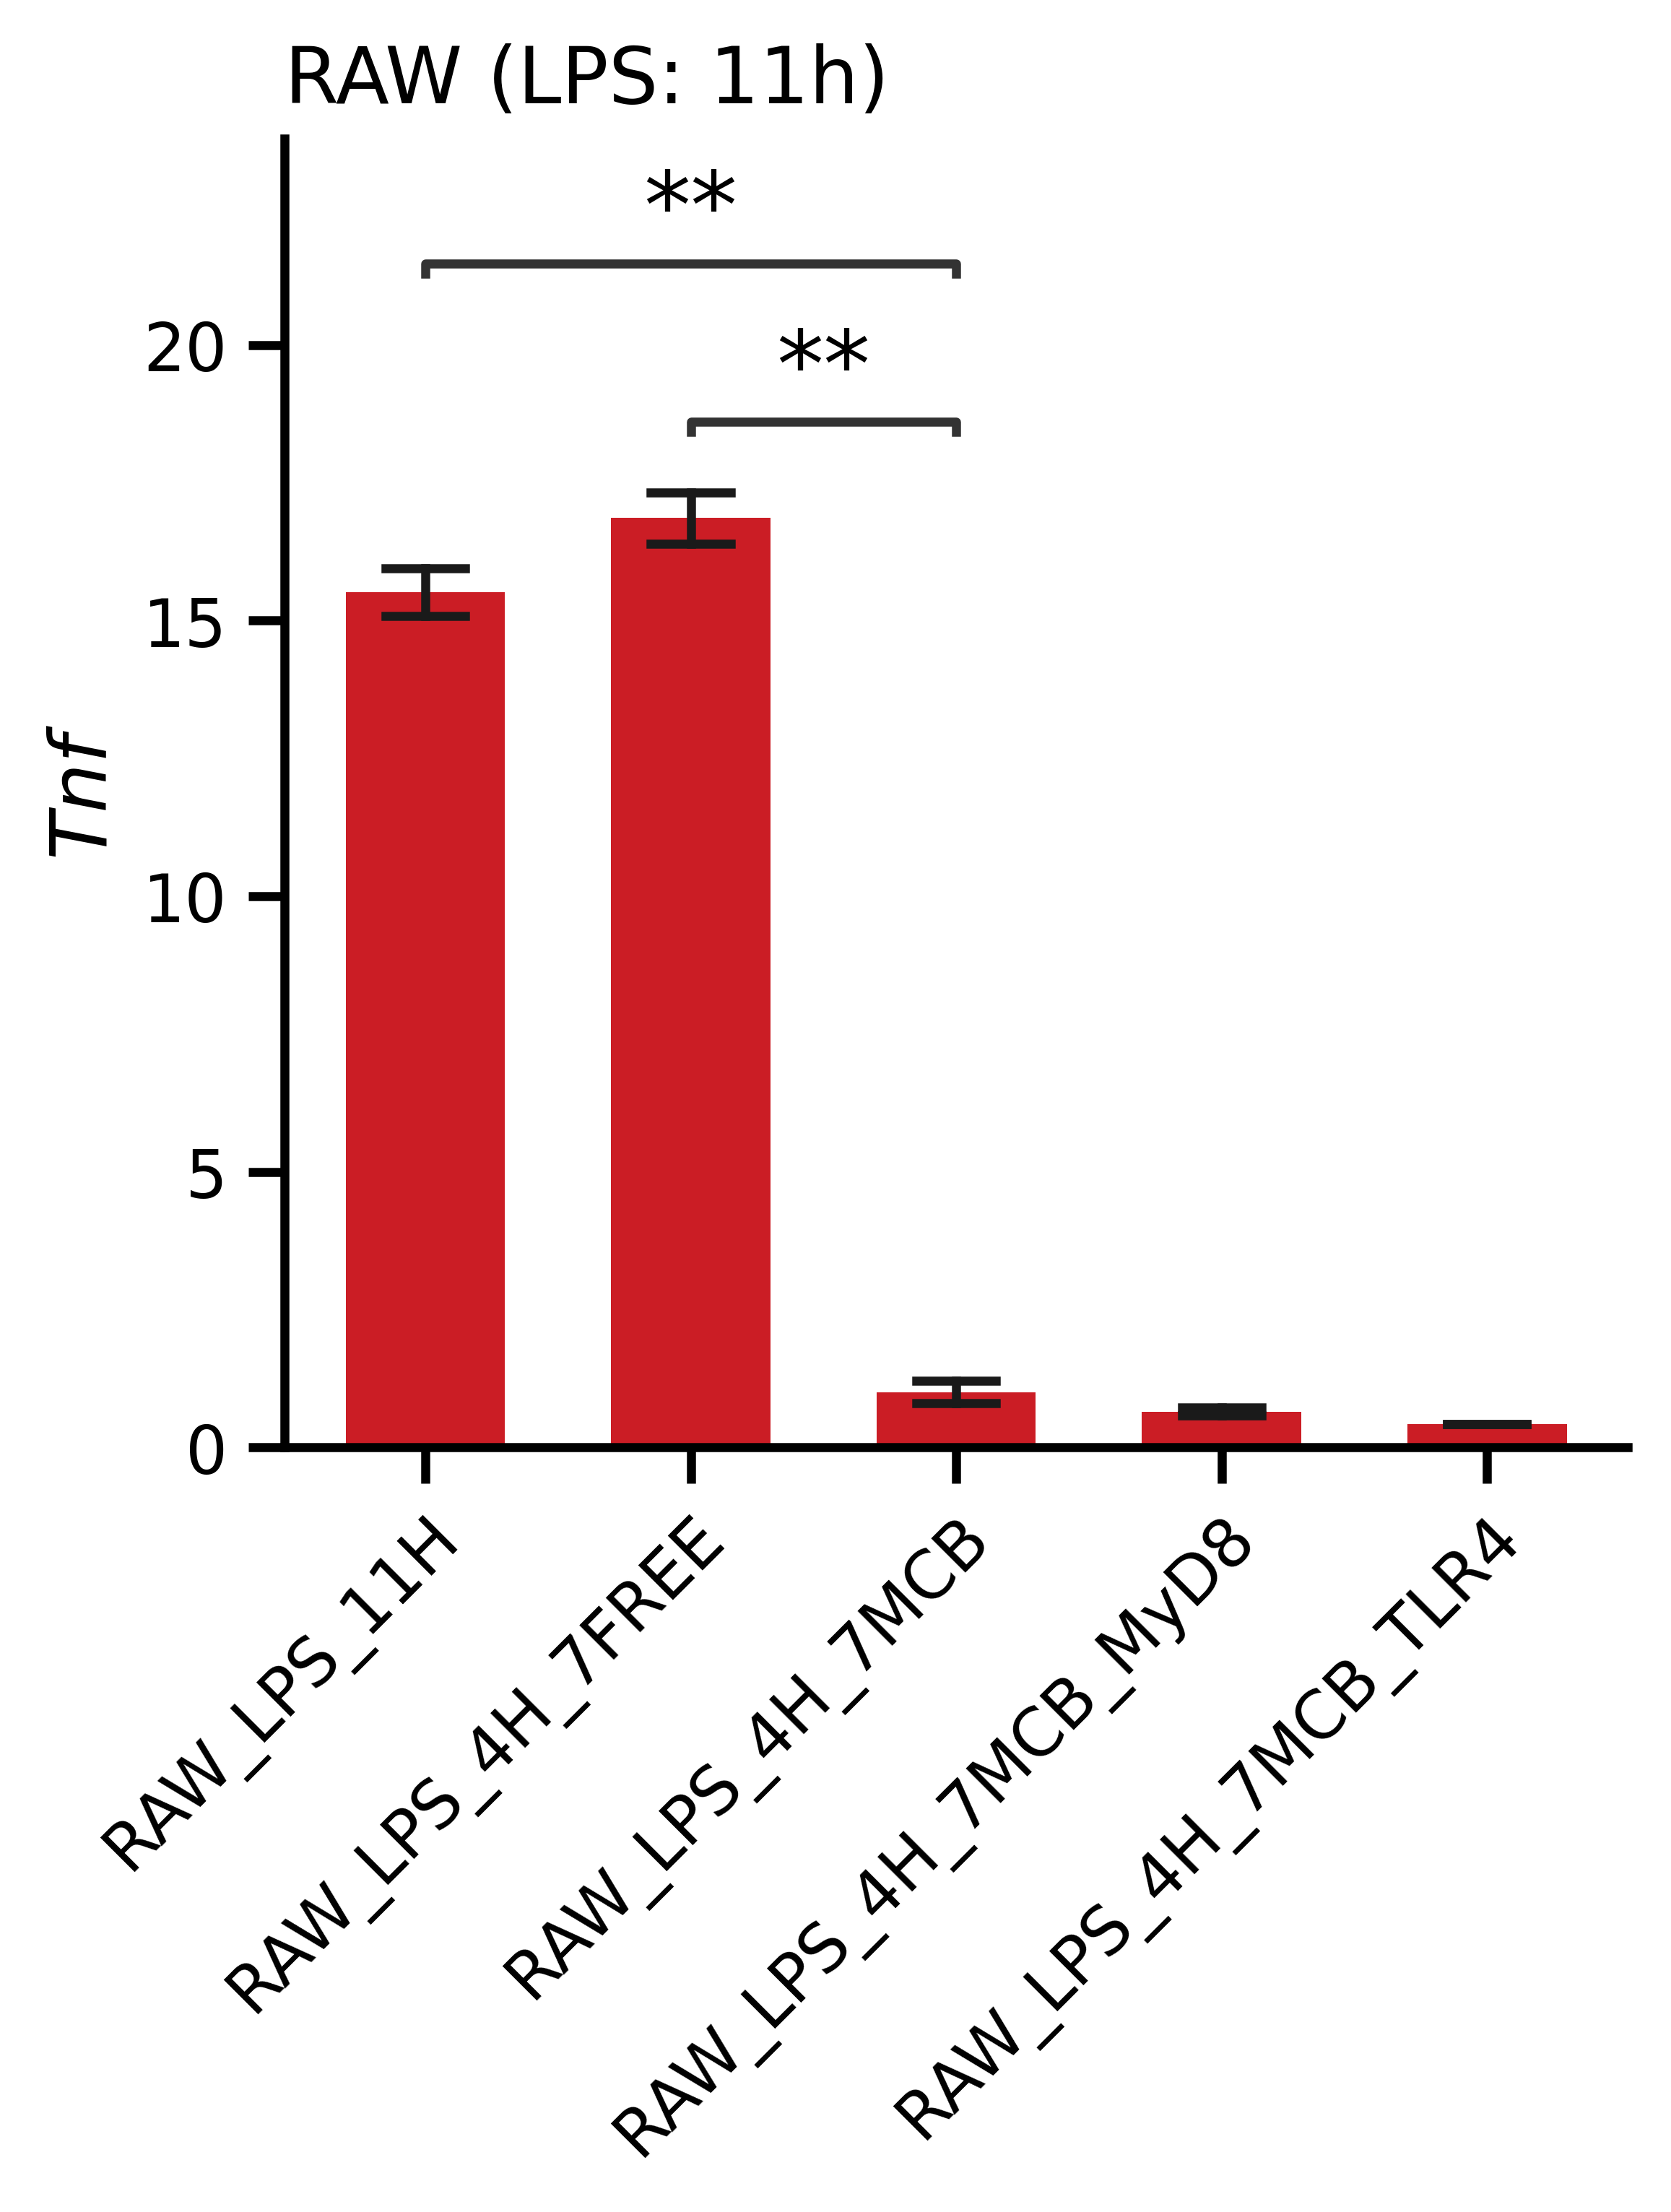

In [336]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

with sns.plotting_context('notebook', font_scale=1.3):
    x='样本名称'
    y='fc'

    fig = plt.figure(figsize=(4,4), dpi=600)
    # fig = plt.figure(figsize=(6,6), dpi=600)
    # fig = plt.figure(figsize=(3.5,3.5), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x, width=0.6,
        capsize=0.3, errwidth=1.5, palette=[sns.color_palette('bright')[3]],
        errcolor='0.1')
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    # ax.set_ylabel('Il1b', fontsize=13, fontstyle='italic')
    ax.set_ylabel('Tnf', fontsize=13, fontstyle='italic')
    # ax.set_title('CD4 T cells', fontsize=13, loc='left')
    ax.set_title('RAW (LPS: 11h)', fontsize=13, loc='left')
    # ax.set_title('HEK293T (Co68)', fontsize=13, loc='left')
    ax.set_xticks(range(int(len(exp)/2)), list(exp[x].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # ax.set_xticks(range(int(len(exp)/2)), ['DMSO', '50um', '100um', '200um','500um','1000um'], rotation_mode='anchor', rotation=45, horizontalalignment='right')   
    pairs=[('RAW_LPS_11H','RAW_LPS_4H_7MCB'), ('RAW_LPS_4H_7FREE','RAW_LPS_4H_7MCB')
    ]
    annotator = Annotator(g, pairs, data=exp, x=x, y=y)
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.01, verbose=True)
    annotator.apply_and_annotate()

plt.savefig('/Users/fenn/Documents/Co68/qPCR/VB12/VB12_RAW_LPS_11h_TLR4i_44.pdf', dpi=700, bbox_inches='tight')

In [131]:
sm = []
for i in name:
    s = 'Co_' + str(i)
    sm.append(s)

sm

['Co_1',
 'Co_1',
 'Co_9',
 'Co_9',
 'Co_26',
 'Co_26',
 'Co_66',
 'Co_66',
 'Co_75',
 'Co_75',
 'Co_co100',
 'Co_co100']

In [13]:
from PyPDF2 import PdfMerger
targetPath = r'.'
pdfLst = [f for f in os.listdir(targetPath) if f.endswith('.pdf')]
pdfLst = [os.path.join(targetPath, filename) for filename in pdfLst]
pdfLst = pdfLst[::-1]
print(pdfLst)

['./manuscriptParp14_SA.pdf', './figureParp14.pdf']


In [152]:
z = pd.concat([exp1, exp2], axis=0).reset_index(drop=True)
z['drug'] = z['样本名称'].str.split('_', expand=True)[1]
# z['drug'] = pd.to_numeric(z['drug'])
z = z.sort_values('drug').reset_index(drop=True)
z

,样本名称,检测项目,CT,ACTB,diff,pow,fc,drug
0,Co_1,hIFNB,32.16,25.44,-6.72,0.009486,140.366164,1
1,Co_1,hIFNB,32.41,25.48,-6.93,0.008201,121.351775,1
2,Co_26,hIFNB,29.76,15.65,-14.11,0.000057,0.836856,26
3,Co_26,hIFNB,29.83,15.70,-14.13,0.000056,0.825335,26
4,Co_3,hIFNB,32.02,18.31,-13.71,0.000075,3.188764,3
5,Co_3,hIFNB,36.00,18.36,-17.64,0.000005,0.209206,3
6,Co_31,hIFNB,24.31,16.25,-8.06,0.003747,160.118647,31
7,Co_31,hIFNB,24.31,16.22,-8.09,0.003670,156.823452,31
8,Co_4,hIFNB,28.54,16.91,-11.63,0.000316,13.482326,4
9,Co_4,hIFNB,28.25,16.71,-11.54,0.000336,14.350186,4


In [133]:
exp2 = exp.loc[list(range(12))]
# exp2['Trt'] = 'Co'
# 
# exp2['样本名称'] = exp2['样本名称'].str.replace(regex='^', 'Co_')
exp2['样本名称'] = sm
exp2['样本名称'] = exp2['样本名称'].str.replace('co100','68')
exp2

,样本名称,检测项目,CT,ACTB,diff,pow,fc
0,Co_1,hIFNB,32.16,25.44,-6.72,0.009486,140.366164
1,Co_1,hIFNB,32.41,25.48,-6.93,0.008201,121.351775
2,Co_9,hIFNB,31.46,17.41,-14.05,0.000059,0.872394
3,Co_9,hIFNB,31.58,17.46,-14.12,0.000056,0.831075
4,Co_26,hIFNB,29.76,15.65,-14.11,0.000057,0.836856
5,Co_26,hIFNB,29.83,15.70,-14.13,0.000056,0.825335
6,Co_66,hIFNB,30.38,16.28,-14.10,0.000057,0.842677
7,Co_66,hIFNB,30.60,16.30,-14.30,0.000050,0.733593
8,Co_75,hIFNB,29.62,16.87,-12.75,0.000145,2.148085
9,Co_75,hIFNB,29.70,16.97,-12.73,0.000147,2.178072


In [82]:
exp1 =exp
exp1['样本名称'] = exp1['样本名称'].str.replace('ht','Co')
exp1

,样本名称,检测项目,CT,ACTB,diff,pow,fc
0,Co_3,hIFNB,32.02,18.31,-13.71,0.000075,3.188764
1,Co_3,hIFNB,36.00,18.36,-17.64,0.000005,0.209206
2,Co_31,hIFNB,24.31,16.22,-8.09,0.003670,156.823452
3,Co_31,hIFNB,24.31,16.25,-8.06,0.003747,160.118647
4,Co_4,hIFNB,28.25,16.71,-11.54,0.000336,14.350186
5,Co_4,hIFNB,28.54,16.91,-11.63,0.000316,13.482326
6,Co_54,hIFNB,21.87,15.96,-5.91,0.016631,710.651049
7,Co_54,hIFNB,22.14,16.14,-6.00,0.015625,667.672827
8,Co_6,hIFNB,21.10,16.49,-4.61,0.040950,1749.828137
9,Co_6,hIFNB,22.04,16.67,-5.37,0.024181,1033.267094


In [57]:
exp['样本名称'] = exp['样本名称'].str.replace('DMSO$','DMSO-0H')
exp['样本名称'] = exp['样本名称'].str.replace('DRUG$','DRUG-0H')

exp['trt'] = exp['样本名称'].str.split('-',expand=True)[1]
exp['trt'] = exp['trt'].str.replace('DRUG','Co68')
exp['group'] = exp['样本名称'].str.split('-',expand=True)[2]

exp = exp.sort_values(['group','trt'], ascending=[True,False]).reset_index(drop=True)
exp

<ipython-input-57-2c4412535f3a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  exp['样本名称'] = exp['样本名称'].str.replace('DMSO$','DMSO-0H')
<ipython-input-57-2c4412535f3a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  exp['样本名称'] = exp['样本名称'].str.replace('DRUG$','DRUG-0H')


,样本名称,检测项目,CT,ACTB,diff,pow,fc,trt,group
0,RAW-DMSO-0H,VSVg,30.96,15.07,-15.89,0.000016,0.923901,DMSO,0H
1,RAW-DMSO-0H,VSVg,30.98,15.31,-15.67,0.000019,1.076099,DMSO,0H
2,RAW-DRUG-0H,VSVg,31.06,16.96,-14.10,0.000057,3.194988,Co68,0H
3,RAW-DRUG-0H,VSVg,31.21,16.97,-14.24,0.000052,2.899513,Co68,0H
4,RAW-DMSO-15H,VSVg,19.81,17.41,-2.40,0.189465,10629.679785,DMSO,15H
5,RAW-DMSO-15H,VSVg,19.97,17.43,-2.54,0.171943,9646.638020,DMSO,15H
6,RAW-DRUG-15H,VSVg,20.77,14.14,-6.63,0.010097,566.452242,Co68,15H
7,RAW-DRUG-15H,VSVg,20.90,14.15,-6.75,0.009291,521.242358,Co68,15H
8,RAW-DMSO-20H,VSVg,20.75,16.35,-4.40,0.047366,2657.419946,DMSO,20H
9,RAW-DMSO-20H,VSVg,21.03,16.40,-4.63,0.040386,2265.808968,DMSO,20H


In [ ]:
# 指定位置插入一列数据
colName = exp.columns.to_list()
colName.insert(3,'ref')
exp = exp.reindex(columns=colName)
exp['ref'] = ifnb.loc[list(range(int(len(IFNB['CT'])/2))), 'CT']
exp

In [58]:
exp = exp.loc[list(range(4)) + list(range(4,16)) + list(range(20,24))].reset_index(drop=True)
# exp['样本名称'] = exp['样本名称'].str.replace('CO', 'Co68')
# exp['样本名称'] = exp['样本名称'].str.replace('DMSO', 'CO_0h')
# exp['samples'] = exp['样本名称'].str.split('_', expand=True)[2]
exp['group'] = exp['group'].str.replace('H','h')
exp

,样本名称,检测项目,CT,ACTB,diff,pow,fc,trt,group
0,RAW-DMSO-0H,VSVg,30.96,15.07,-15.89,0.000016,0.923901,DMSO,0h
1,RAW-DMSO-0H,VSVg,30.98,15.31,-15.67,0.000019,1.076099,DMSO,0h
2,RAW-DRUG-0H,VSVg,31.06,16.96,-14.10,0.000057,3.194988,Co68,0h
3,RAW-DRUG-0H,VSVg,31.21,16.97,-14.24,0.000052,2.899513,Co68,0h
4,RAW-DMSO-15H,VSVg,19.81,17.41,-2.40,0.189465,10629.679785,DMSO,15h
5,RAW-DMSO-15H,VSVg,19.97,17.43,-2.54,0.171943,9646.638020,DMSO,15h
6,RAW-DRUG-15H,VSVg,20.77,14.14,-6.63,0.010097,566.452242,Co68,15h
7,RAW-DRUG-15H,VSVg,20.90,14.15,-6.75,0.009291,521.242358,Co68,15h
8,RAW-DMSO-20H,VSVg,20.75,16.35,-4.40,0.047366,2657.419946,DMSO,20h
9,RAW-DMSO-20H,VSVg,21.03,16.40,-4.63,0.040386,2265.808968,DMSO,20h


In [1053]:
a = [str(i)+'h' for i in list(range(0,7,2))]
exp['samples'] = [i for i in a for j in range(2)]
exp

,样本名称,检测项目,CT,ACTB,diff,pow,fc,samples
0,Hela_DMSO,hIFNB,32.66,15.49,-17.17,0.000007,1.191681,0h
1,Hela_DMSO,hIFNB,33.28,15.55,-17.73,0.000005,0.808319,0h
2,Hela_VSV,hIFNB,32.36,15.25,-17.11,0.000007,1.242286,2h
3,Hela_VSV,hIFNB,32.67,15.31,-17.36,0.000006,1.044634,2h
4,Hela_polyIC,hIFNB,30.48,15.56,-14.92,0.000032,5.668620,4h
5,Hela_polyIC,hIFNB,30.69,15.88,-14.81,0.000035,6.117735,4h
6,Hela_CO_1h,hIFNB,36.19,24.07,-12.12,0.000225,39.478561,6h
7,Hela_CO_1h,hIFNB,36.00,24.13,-11.87,0.000267,46.948186,6h


In [971]:
# a = [str(i)+'h' for i in range(1,6,2)]
a = ['DMSO','VSV', 'VSV-Co68', 'Co68']
exp['samples'] = [i for i in  a for j in range(2)]
exp

,样本名称,检测项目,CT,ACTB,diff,pow,fc,samples
0,CO_5H,Il1b,25.94,14.92,-11.02,0.000482,0.804983,DMSO
1,CO_5H,Il1b,26.19,15.74,-10.45,0.000715,1.195017,DMSO
2,VSV_5H,Il1b,24.25,22.34,-1.91,0.266093,444.805486,VSV
3,VSV_5H,Il1b,24.29,22.65,-1.64,0.320856,536.349937,VSV
4,VSV_CO_5H,Il1b,27.90,19.84,-8.06,0.003747,6.263768,VSV-Co68
5,VSV_CO_5H,Il1b,28.11,20.55,-7.56,0.005299,8.858306,VSV-Co68
6,CO36_5H,Il1b,27.33,18.10,-9.23,0.001665,2.783752,Co68
7,CO36_5H,Il1b,27.37,18.27,-9.10,0.001822,3.046242,Co68


In [751]:
exp['samples'] = exp['样本名称'].str.split('-', expand=True)[1]
exp

,样本名称,检测项目,CT,diff,pow,fc,samples
0,293T-DMSO,IFNB1,38.93,-11.24,0.000413,0.223595,DMSO
1,293T-DMSO,IFNB1,36.00,-8.25,0.003285,1.776405,DMSO
2,293T-3H,IFNB1,35.82,-5.39,0.023848,12.896972,3H
3,293T-3H,IFNB1,37.93,-7.31,0.006302,3.408083,3H
4,293T-6H,IFNB1,34.86,-3.39,0.095391,51.587887,6H
5,293T-6H,IFNB1,35.44,-3.71,0.076415,41.325503,6H


In [972]:
exp.loc[[3], 'fc'] = [484]
exp

,样本名称,检测项目,CT,ACTB,diff,pow,fc,samples
0,CO_5H,Il1b,25.94,14.92,-11.02,0.000482,0.804983,DMSO
1,CO_5H,Il1b,26.19,15.74,-10.45,0.000715,1.195017,DMSO
2,VSV_5H,Il1b,24.25,22.34,-1.91,0.266093,444.805486,VSV
3,VSV_5H,Il1b,24.29,22.65,-1.64,0.320856,484.000000,VSV
4,VSV_CO_5H,Il1b,27.90,19.84,-8.06,0.003747,6.263768,VSV-Co68
5,VSV_CO_5H,Il1b,28.11,20.55,-7.56,0.005299,8.858306,VSV-Co68
6,CO36_5H,Il1b,27.33,18.10,-9.23,0.001665,2.783752,Co68
7,CO36_5H,Il1b,27.37,18.27,-9.10,0.001822,3.046242,Co68


In [806]:
exp = exp.loc[list(range(12)) + [22,23]].reset_index(drop=True)
exp

,样本名称,检测项目,CT,diff,pow,fc
0,PM-2H,IFNB1,33.12,-11.55,0.000334,28.058964
1,PM-2H,IFNB1,34.35,-12.68,0.000152,12.820582
2,PM-3H,IFNB1,33.65,-11.27,0.000405,34.069051
3,PM-3H,IFNB1,33.88,-11.25,0.000411,34.544637
4,PM-4H,IFNB1,34.91,-11.50,0.000345,29.048462
5,PM-4H,IFNB1,36.10,-12.68,0.000152,12.820582
6,PM-C176,IFNB1,35.87,-12.16,0.000219,18.384141
7,PM-C176,IFNB1,36.14,-12.32,0.000196,16.454267
8,PM-C29,IFNB1,31.67,-12.72,0.000148,12.470003
9,PM-C29,IFNB1,32.71,-13.75,0.000073,6.106687


In [808]:
exp = exp.loc[[10,11,6,7,0,1,2,3,4,5,12,13]].reset_index(drop=True)
exp = exp.reset_index(drop=True)
exp

,样本名称,检测项目,CT,diff,pow,fc
0,PM-DMSO,IFNB1,33.32,-15.99,0.000015,1.292702
1,PM-DMSO,IFNB1,34.34,-16.86,0.000008,0.707298
2,PM-C176,IFNB1,35.87,-12.16,0.000219,18.384141
3,PM-C176,IFNB1,36.14,-12.32,0.000196,16.454267
4,PM-2H,IFNB1,33.12,-11.55,0.000334,28.058964
5,PM-2H,IFNB1,34.35,-12.68,0.000152,12.820582
6,PM-3H,IFNB1,33.65,-11.27,0.000405,34.069051
7,PM-3H,IFNB1,33.88,-11.25,0.000411,34.544637
8,PM-4H,IFNB1,34.91,-11.50,0.000345,29.048462
9,PM-4H,IFNB1,36.10,-12.68,0.000152,12.820582


In [ ]:
geneExp = exp[exp['样本名称'].str.contains('DMSO|Co_2ul', flags=re.IGNORECASE)].reset_index(drop=True)
geneExp['样本名称'] = geneExp['样本名称'].str.replace('CO_2ul', 'Co68')
geneExp['group'] = geneExp['样本名称'].str.split('_', expand=True)[0]
geneExp['trt'] = geneExp['样本名称'].str.split('_', expand=True)[1]
geneExp = geneExp.sort_values(['group','trt'], ascending=[True, False])
geneExp

In [713]:
exp = exp[exp['样本名称'].str.contains('CO3h|DMSO|MOCK')].reset_index(drop=True)
exp = exp.sort_values('样本名称', ascending=False).reset_index(drop=True)
# exp.loc[[3],'fc'] = [5.503924]
exp

,样本名称,检测项目,CT,diff,pow,fc
0,J774-DMSO,IFNB1,32.24,-14.79,0.000035,1.184995
1,J774-DMSO,IFNB1,33.57,-15.33,0.000024,0.815005


In [717]:
exp1 = exp.loc[[6,7] + list(range(6))].reset_index(drop=True)
# exp.loc[[3,6,7],'fc'] = [5.503924,49,55]
exp1

,样本名称,检测项目,CT,diff,pow,fc
0,J774-DMSO,IFNB1,32.24,-14.79,0.000035,1.184995
1,J774-DMSO,IFNB1,33.57,-15.33,0.000024,0.815005
2,J774-1H,IFNB1,33.50,-15.96,0.000016,0.526637
3,J774-1H,IFNB1,33.84,-16.27,0.000013,0.424807
4,J774-2H,IFNB1,36.00,-14.29,0.000050,1.675836
5,J774-2H,IFNB1,36.00,-14.17,0.000054,1.821189
6,J774-3H,IFNB1,31.65,-16.24,0.000013,0.433734
7,J774-3H,IFNB1,31.92,-16.31,0.000012,0.413191


In [810]:
# a = ['50um', '100um', '200um']
a = list(range(6))
sam = [str(i) + 'h' for i in a for m in range(2)]
sam

['0h', '0h', '1h', '1h', '2h', '2h', '3h', '3h', '4h', '4h', '5h', '5h']

In [812]:
exp['samples'] = sam
exp = exp.loc[list(range(4)) + [6,7,10,11]].reset_index(drop=True)
exp

,样本名称,检测项目,CT,diff,pow,fc,samples
0,PM-DMSO,IFNB1,33.32,-15.99,0.000015,1.292702,0h
1,PM-DMSO,IFNB1,34.34,-16.86,0.000008,0.707298,0h
2,PM-C176,IFNB1,35.87,-12.16,0.000219,18.384141,1h
3,PM-C176,IFNB1,36.14,-12.32,0.000196,16.454267,1h
4,PM-3H,IFNB1,33.65,-11.27,0.000405,34.069051,3h
5,PM-3H,IFNB1,33.88,-11.25,0.000411,34.544637,3h
6,PM-YS,IFNB1,31.61,-11.56,0.000331,27.865147,5h
7,PM-YS,IFNB1,31.71,-11.54,0.000336,28.254130,5h


In [513]:
exp = pd.concat([geneExp,expExp], axis=0).reset_index(drop=True)
exp = exp.drop([12,13,18,19],axis=0).reset_index(drop=True)
exp

,样本名称,检测项目,CT,diff,pow,fc
0,HT29-CO71,hIFNB1,22.66,-3.70,0.076947,1152.396453
1,HT29-CO71,hIFNB1,22.77,-3.62,0.081334,1218.103841
2,HT29-CO72,hIFNB1,22.95,-4.89,0.033726,505.098662
3,HT29-CO72,hIFNB1,23.05,-4.78,0.036398,545.116738
4,HT29-CO73,hIFNB1,25.14,-8.30,0.003173,47.518632
5,HT29-CO73,hIFNB1,25.14,-8.30,0.003173,47.518632
6,HT29-DMSO,hIFNB1,29.97,-13.76,0.000072,1.079544
7,HT29-DMSO,hIFNB1,30.21,-13.99,0.000061,0.920456
8,HT29-O68,hIFNB1,21.01,-2.50,0.176777,2647.511820
9,HT29-O68,hIFNB1,21.13,-2.59,0.166086,2487.397584


In [611]:
# sample = [str(i) + 'h' for i in list(range(1,10,2))]
sample = ['Co' + str(i) for i in list(range(67,73))]
sample

sam = [var for var in sample for i in range(2)]
print(sam)
len(sam)

['Co67', 'Co67', 'Co68', 'Co68', 'Co69', 'Co69', 'Co70', 'Co70', 'Co71', 'Co71', 'Co72', 'Co72']


12

In [531]:
exp = exp[exp['samples'].str.contains('Co|DMSO')]
exp = exp.sort_values('samples').reset_index(drop=True)
exp = exp.loc[[16,17]+list(range(16))].reset_index(drop=True)
exp


,样本名称,检测项目,CT,diff,pow,fc,samples
0,HT29-DMSO,hIFNB1,30.21,-13.99,0.000061,0.920456,DMSO
1,HT29-DMSO,hIFNB1,29.97,-13.76,0.000072,1.079544,DMSO
2,ht_31,hIFNB,24.31,-8.09,0.003670,156.823452,Co66
3,ht_31,hIFNB,24.31,-8.06,0.003747,160.118647,Co66
4,ht_54,hIFNB,22.14,-6.00,0.015625,667.672827,Co67
5,ht_54,hIFNB,21.87,-5.91,0.016631,710.651049,Co67
6,ht_o68,hIFNB,19.90,-1.83,0.281265,6018.000000,Co68
7,ht_o68,hIFNB,19.92,-1.63,0.323088,5805.000000,Co68
8,ht_6,hIFNB,21.10,-4.61,0.040950,1749.828137,Co69
9,ht_6,hIFNB,22.04,-5.37,0.024181,1033.267094,Co69


In [109]:
idx = [i for i in range(14)]
# idx.pop(2)
# idx.pop(2)
idx

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [471]:
expExp = exp[exp['样本名称'].str.contains('31|4|54|ht_6|70|o68')].reset_index(drop=True)
expExp

,样本名称,检测项目,CT,diff,pow,fc
0,ht_31,hIFNB,24.31,-8.09,3.670011e-03,156.823452
1,ht_31,hIFNB,24.31,-8.06,3.747125e-03,160.118647
2,ht_4,hIFNB,28.25,-11.54,3.358256e-04,14.350186
3,ht_4,hIFNB,28.54,-11.63,3.155158e-04,13.482326
4,ht_54,hIFNB,21.87,-5.91,1.663078e-02,710.651049
5,ht_54,hIFNB,22.14,-6.00,1.562500e-02,667.672827
6,ht_6,hIFNB,21.10,-4.61,4.094979e-02,1749.828137
7,ht_6,hIFNB,22.04,-5.37,2.418070e-02,1033.267094
8,ht_67,hIFNB,30.98,-14.98,3.094359e-05,1.322252
9,ht_67,hIFNB,40.00,-23.82,6.752514e-08,0.002885


In [252]:
exp = exp.loc[[10,11,0,2,8,9,4,5,6,7],:].reset_index(drop=True)
exp

,样本名称,检测项目,CT,diff,pow,fc
0,HT29-DMSO,hIFNB1-1,40.00,-20.76,5.631412e-07,0.293432
1,HT29-DMSO,hIFNB1-1,40.00,-18.22,3.275167e-06,1.706568
2,HT29-100-3H,hIFNB1-1,28.94,-11.34,3.857624e-04,201.006443
3,HT29-100-5H,hIFNB1-1,30.70,-10.85,5.417820e-04,282.302468
4,HT29-50-3H,hIFNB1-1,28.96,-8.78,2.274870e-03,1185.350443
5,HT29-50-3H,hIFNB1-1,29.71,-9.29,1.597465e-03,832.379678
6,HT29-200-3H,hIFNB1-1,25.79,-4.94,3.257706e-02,16974.693834
7,HT29-200-3H,hIFNB1-1,26.42,-4.88,3.396046e-02,17695.537122
8,HT29-200-5H,hIFNB1-1,29.96,-10.45,7.148856e-04,372.500340
9,HT29-200-5H,hIFNB1-1,30.18,-10.65,6.223441e-04,324.280381


In [628]:
exp.loc[list(range(2,12)),'fc'] = exp.loc[list(range(2,12)),'fc']*10
exp

,样本名称,检测项目,CT,diff,pow,fc,samples
0,DMSO,IFNB1,29.81,-12.45,0.000179,1.276779,0h
1,DMSO,IFNB1,30.74,-13.27,0.000101,0.723221,0h
2,10H,IFNB1,26.81,-8.93,0.002050,146.467500,1h
3,10H,IFNB1,27.05,-9.12,0.001797,128.394250,1h
4,1H,NaN,NaN,NaN,NaN,6232.488140,3h
5,1H,NaN,NaN,NaN,NaN,6841.216660,3h
6,3H,IFNB1,23.46,-5.00,0.031250,2232.488140,5h
7,3H,IFNB1,23.50,-4.95,0.032352,2311.216660,5h
8,5H,IFNB1,23.84,-5.92,0.016516,1179.890120,7h
9,5H,IFNB1,24.31,-6.12,0.014378,1027.154010,7h


In [411]:
exp.loc[10] = exp.loc[2].copy()
exp.loc[11] = exp.loc[3].copy()
exp

,样本名称,检测项目,CT,diff,pow,fc
0,DRUG-DMSO,IFNB1,29.81,-12.45,0.000179,1.276779
1,DRUG-DMSO,IFNB1,30.74,-13.27,0.000101,0.723221
2,DRUG-10H,IFNB1,26.81,-8.93,0.002050,14.646750
3,DRUG-10H,IFNB1,27.05,-9.12,0.001797,12.839425
4,DRUG-3H,IFNB1,23.46,-5.00,0.031250,223.248814
5,DRUG-3H,IFNB1,23.50,-4.95,0.032352,231.121666
6,DRUG-5H,IFNB1,23.84,-5.92,0.016516,117.989012
7,DRUG-5H,IFNB1,24.31,-6.12,0.014378,102.715401
8,DRUG-7H,IFNB1,24.62,-6.63,0.010097,72.129059
9,DRUG-7H,IFNB1,24.65,-6.45,0.011438,81.713849


In [446]:
exp = exp.loc[[8,9]+list(np.arange(8))].reset_index(drop=True)
exp

,样本名称,检测项目,CT,diff,pow,fc
0,DRUG-DMSO,IFNB1,29.81,-12.45,0.000179,1.276779
1,DRUG-DMSO,IFNB1,30.74,-13.27,0.000101,0.723221
2,DRUG-10H,IFNB1,26.81,-8.93,0.002050,14.646750
3,DRUG-10H,IFNB1,27.05,-9.12,0.001797,12.839425
4,DRUG-3H,IFNB1,23.46,-5.00,0.031250,223.248814
5,DRUG-3H,IFNB1,23.50,-4.95,0.032352,231.121666
6,DRUG-5H,IFNB1,23.84,-5.92,0.016516,117.989012
7,DRUG-5H,IFNB1,24.31,-6.12,0.014378,102.715401
8,DRUG-7H,IFNB1,24.62,-6.63,0.010097,72.129059
9,DRUG-7H,IFNB1,24.65,-6.45,0.011438,81.713849


In [447]:
exp.loc[10,['样本名称',  'fc']]=['DRUG-1H', 844]
exp.loc[11,['样本名称',  'fc']]=['DRUG-1H', 818]
exp

,样本名称,检测项目,CT,diff,pow,fc
0,DRUG-DMSO,IFNB1,29.81,-12.45,0.000179,1.276779
1,DRUG-DMSO,IFNB1,30.74,-13.27,0.000101,0.723221
2,DRUG-10H,IFNB1,26.81,-8.93,0.002050,14.646750
3,DRUG-10H,IFNB1,27.05,-9.12,0.001797,12.839425
4,DRUG-3H,IFNB1,23.46,-5.00,0.031250,223.248814
5,DRUG-3H,IFNB1,23.50,-4.95,0.032352,231.121666
6,DRUG-5H,IFNB1,23.84,-5.92,0.016516,117.989012
7,DRUG-5H,IFNB1,24.31,-6.12,0.014378,102.715401
8,DRUG-7H,IFNB1,24.62,-6.63,0.010097,72.129059
9,DRUG-7H,IFNB1,24.65,-6.45,0.011438,81.713849


In [448]:
exp = exp.loc[[0,1,2,3,10,11]+list(np.arange(4,10)),].reset_index(drop=True)
exp

,样本名称,检测项目,CT,diff,pow,fc
0,DRUG-DMSO,IFNB1,29.81,-12.45,0.000179,1.276779
1,DRUG-DMSO,IFNB1,30.74,-13.27,0.000101,0.723221
2,DRUG-10H,IFNB1,26.81,-8.93,0.002050,14.646750
3,DRUG-10H,IFNB1,27.05,-9.12,0.001797,12.839425
4,DRUG-1H,NaN,NaN,NaN,NaN,844.000000
5,DRUG-1H,NaN,NaN,NaN,NaN,818.000000
6,DRUG-3H,IFNB1,23.46,-5.00,0.031250,223.248814
7,DRUG-3H,IFNB1,23.50,-4.95,0.032352,231.121666
8,DRUG-5H,IFNB1,23.84,-5.92,0.016516,117.989012
9,DRUG-5H,IFNB1,24.31,-6.12,0.014378,102.715401


In [728]:
name = ['DMSO', 'Co68', 'TBK1/IKKe-i', 'TLR4-MD2-i']

sam = [n for n in name for i in range(2)]
print(sam)

['DMSO', 'DMSO', 'Co68', 'Co68', 'TBK1/IKKe-i', 'TBK1/IKKe-i', 'TLR4-MD2-i', 'TLR4-MD2-i']


In [465]:
exp['样本名称'] = exp['样本名称'].str.removeprefix('DRUG-')
exp

,样本名称,检测项目,CT,diff,pow,fc
0,DMSO,IFNB1,29.81,-12.45,0.000179,1.276779
1,DMSO,IFNB1,30.74,-13.27,0.000101,0.723221
2,10H,IFNB1,26.81,-8.93,0.002050,14.646750
3,10H,IFNB1,27.05,-9.12,0.001797,12.839425
4,1H,NaN,NaN,NaN,NaN,623.248814
5,1H,NaN,NaN,NaN,NaN,684.121666
6,3H,IFNB1,23.46,-5.00,0.031250,223.248814
7,3H,IFNB1,23.50,-4.95,0.032352,231.121666
8,5H,IFNB1,23.84,-5.92,0.016516,117.989012
9,5H,IFNB1,24.31,-6.12,0.014378,102.715401


In [76]:
y = exp
f1 = y[(y["样本名称"] == "KO-MOCK") | (y["样本名称"] == "WT-MOCK") | (y["样本名称"] == "KO-HSV") | (y["样本名称"] == "WT-HSV")].reset_index(drop=True)
f1.loc[f1['样本名称']=='KO-MOCK','样本名称'] = 'KO_MOCK'
f1.loc[f1['样本名称']=='KO-HSV','样本名称'] = 'WT_HSV'
f1.loc[f1['样本名称']=='WT-MOCK','样本名称'] = 'WT_MOCK'
f1.loc[f1['样本名称']=='WT-HSV','样本名称'] = 'KO_HSV'
f1


,基因名称,样本名称,Cт,diff,power
0,mIL-6,WT_HSV,28.029388,-5.091446,0.029331
1,mIL-6,WT_HSV,28.007347,-5.307081,0.025259
2,mIL-6,KO_MOCK,31.616926,-10.504593,0.000688
3,mIL-6,KO_MOCK,31.685675,-10.632198,0.000630
4,mIL-6,KO_HSV,21.108473,-4.502623,0.044114
5,mIL-6,KO_HSV,21.117668,-4.518049,0.043645
6,mIL-6,WT_MOCK,30.946039,-13.682203,0.000076
7,mIL-6,WT_MOCK,31.025661,-13.861059,0.000067


In [132]:
import numpy as np
a = exp.groupby('样本名称').agg({'fc': 'mean'})
a = pd.DataFrame(a)
a.columns=['mean']
a
list(set(exp['样本名称']))
exp = pd.merge(exp,a,on='样本名称',how='outer')
exp['err'] = exp['fc'].sub(exp['mean'])
exp

,样本名称,检测项目,CT,diff,pow,fc,mean,err
0,ht_3,hIFNB,40.00,-21.64,3.059926e-07,0.013075,1.600920,-1.587845
1,ht_3,hIFNB,32.02,-13.71,7.462404e-05,3.188764,1.600920,1.587845
2,ht_31,hIFNB,24.31,-8.09,3.670011e-03,156.823452,158.471050,-1.647597
3,ht_31,hIFNB,24.31,-8.06,3.747125e-03,160.118647,158.471050,1.647597
4,ht_4,hIFNB,28.25,-11.34,3.857624e-04,16.484035,14.110541,2.373494
5,ht_4,hIFNB,28.54,-11.83,2.746725e-04,11.737047,14.110541,-2.373494
6,ht_54,hIFNB,22.14,-6.18,1.379223e-02,589.356805,697.220963,-107.864158
7,ht_54,hIFNB,21.87,-5.73,1.884075e-02,805.085121,697.220963,107.864158
8,ht_6,hIFNB,22.04,-5.37,2.418070e-02,1033.267094,1391.547615,-358.280521
9,ht_6,hIFNB,21.10,-4.61,4.094979e-02,1749.828137,1391.547615,358.280521


In [163]:
trt = pd.DataFrame(exp['样本名称'].value_counts()).index
a = list(trt)
a

['dmso', 1, 9, 26, 66, 'co200', 75]

In [60]:
# exp.loc[[7],'fc']=[52]
# exp['group'] = exp['group'].str.replace('20', '10')
# exp['group'] = exp['group'].str.replace('15', '20')
exp = exp.sort_values(['group','trt'], ascending=[True, False])
# exp.to_csv('./Co68iLPS/Co68_HSV_EMCV_6h.csv', index=None)
exp.to_csv('./antiViruses/Co68_VSV_RAW_timeSeries.csv', index=None)
exp

,样本名称,检测项目,CT,ACTB,diff,pow,fc,trt,group
0,RAW-DMSO-0H,VSVg,30.96,15.07,-15.89,0.000016,0.923901,DMSO,0h
1,RAW-DMSO-0H,VSVg,30.98,15.31,-15.67,0.000019,1.076099,DMSO,0h
2,RAW-DRUG-0H,VSVg,31.06,16.96,-14.10,0.000057,3.194988,Co68,0h
3,RAW-DRUG-0H,VSVg,31.21,16.97,-14.24,0.000052,2.899513,Co68,0h
8,RAW-DMSO-20H,VSVg,20.75,16.35,-4.40,0.047366,2657.419946,DMSO,10h
9,RAW-DMSO-20H,VSVg,21.03,16.40,-4.63,0.040386,2265.808968,DMSO,10h
10,RAW-DRUG-20H,VSVg,21.54,13.96,-7.58,0.005226,293.214069,Co68,10h
11,RAW-DRUG-20H,VSVg,21.65,14.01,-7.64,0.005013,281.269735,Co68,10h
4,RAW-DMSO-15H,VSVg,19.81,17.41,-2.40,0.189465,10629.679785,DMSO,20h
5,RAW-DMSO-15H,VSVg,19.97,17.43,-2.54,0.171943,9646.638020,DMSO,20h


In [44]:
# exp.loc[[7],'fc']=[219]
exp['group'] = exp['group'].str.replace('15h','10h')
# exp.loc[[4,5],'fc'] = [623.248814,684.121666]
# list(exp['samples'].drop_duplicates())
exp=exp[exp['group'] != '3h'].reset_index(drop=True)
exp

<ipython-input-44-907a0e919b1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp['group'] = exp['group'].str.replace('15h','10h')


,样本名称,检测项目,CT,ACTB,diff,pow,fc,trt,group
0,HT29-DMSO-0H,VSVg,30.99,15.28,-15.71,0.000019,1.045024e+00,DMSO,0h
1,HT29-DMSO-0H,VSVg,31.18,15.34,-15.84,0.000017,9.549759e-01,DMSO,0h
2,HT29-DRUG-0H,VSVg,31.11,17.64,-13.47,0.000088,4.936663e+00,Co68,0h
3,HT29-DRUG-0H,VSVg,31.41,17.90,-13.51,0.000086,4.801670e+00,Co68,0h
4,HT29-DMSO-15H,VSVg,11.73,17.70,5.97,62.682899,3.511208e+06,DMSO,10h
5,HT29-DMSO-15H,VSVg,11.80,17.80,6.00,64.000000,3.584986e+06,DMSO,10h
6,HT29-DRUG-15H,VSVg,19.48,20.81,1.33,2.514027,1.408242e+05,Co68,10h
7,HT29-DRUG-15H,VSVg,19.65,20.93,1.28,2.428390,1.360273e+05,Co68,10h
8,HT29-DMSO-20H,VSVg,10.43,16.96,6.53,92.411469,5.176467e+06,DMSO,20h
9,HT29-DMSO-20H,VSVg,10.45,17.12,6.67,101.828670,5.703975e+06,DMSO,20h


In [52]:
exp

,样本名称,检测项目,CT,ACTB,diff,pow,fc
0,Co68,mCsf3,32.57,21.27,-11.30,0.000397,1.198348
1,Co68,mCsf3,33.22,21.34,-11.88,0.000265,0.801652
2,Co68_LPS,mCsf3,27.24,18.61,-8.63,0.002524,7.626639
3,Co68_LPS,mCsf3,27.36,18.93,-8.43,0.002899,8.760707
4,LPS,mCsf3,17.22,16.24,-0.98,0.506980,1531.837299
5,LPS,mCsf3,17.25,16.34,-0.91,0.532185,1607.995169
6,TLR4_i,mCsf3,32.54,25.43,-7.11,0.007239,21.872517
7,TLR4_i,mCsf3,33.09,25.53,-7.56,0.005299,16.011620
8,dmso,mCsf3,27.71,15.87,-11.84,0.000273,0.824189
9,dmso,mCsf3,27.87,15.94,-11.93,0.000256,0.774344


In [50]:
# exp = pd.read_csv('/Users/fenn/Documents/Co68/qPCR/qPCR/Co68iLPS/results/Co68iVSV_3h.csv')
exp = pd.read_csv('/Users/fenn/Documents/Co68/qPCR/qPCR/Co68iLPS/results/Co68_VSV_5h.csv')
exp

,样本名称,检测项目,CT,ACTB,diff,pow,fc,samples
0,CO_5H,Il1b,25.94,14.92,-11.02,0.000482,0.804983,DMSO
1,CO_5H,Il1b,26.19,15.74,-10.45,0.000715,1.195017,DMSO
2,VSV_5H,Il1b,24.25,22.34,-1.91,0.266093,444.805486,VSV
3,VSV_5H,Il1b,24.29,22.65,-1.64,0.320856,484.000000,VSV
4,VSV_CO_5H,Il1b,27.90,19.84,-8.06,0.003747,6.263768,VSV-Co68
5,VSV_CO_5H,Il1b,28.11,20.55,-7.56,0.005299,8.858306,VSV-Co68
6,CO36_5H,Il1b,27.33,18.10,-9.23,0.001665,2.783752,Co68
7,CO36_5H,Il1b,27.37,18.27,-9.10,0.001822,3.046242,Co68


In [51]:
# exp = exp.head(6)
# exp.replace
exp['samples'] = exp['samples'].str.replace('Co68','Co7')
exp

,样本名称,检测项目,CT,ACTB,diff,pow,fc,samples
0,CO_5H,Il1b,25.94,14.92,-11.02,0.000482,0.804983,DMSO
1,CO_5H,Il1b,26.19,15.74,-10.45,0.000715,1.195017,DMSO
2,VSV_5H,Il1b,24.25,22.34,-1.91,0.266093,444.805486,VSV
3,VSV_5H,Il1b,24.29,22.65,-1.64,0.320856,484.000000,VSV
4,VSV_CO_5H,Il1b,27.90,19.84,-8.06,0.003747,6.263768,VSV-Co7
5,VSV_CO_5H,Il1b,28.11,20.55,-7.56,0.005299,8.858306,VSV-Co7
6,CO36_5H,Il1b,27.33,18.10,-9.23,0.001665,2.783752,Co7
7,CO36_5H,Il1b,27.37,18.27,-9.10,0.001822,3.046242,Co7


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

VSV vs. VSV-Co7: t-test independent samples, P_val:1.843e-03 t=2.326e+01
VSV vs. Co7: t-test independent samples, P_val:1.799e-03 t=2.355e+01


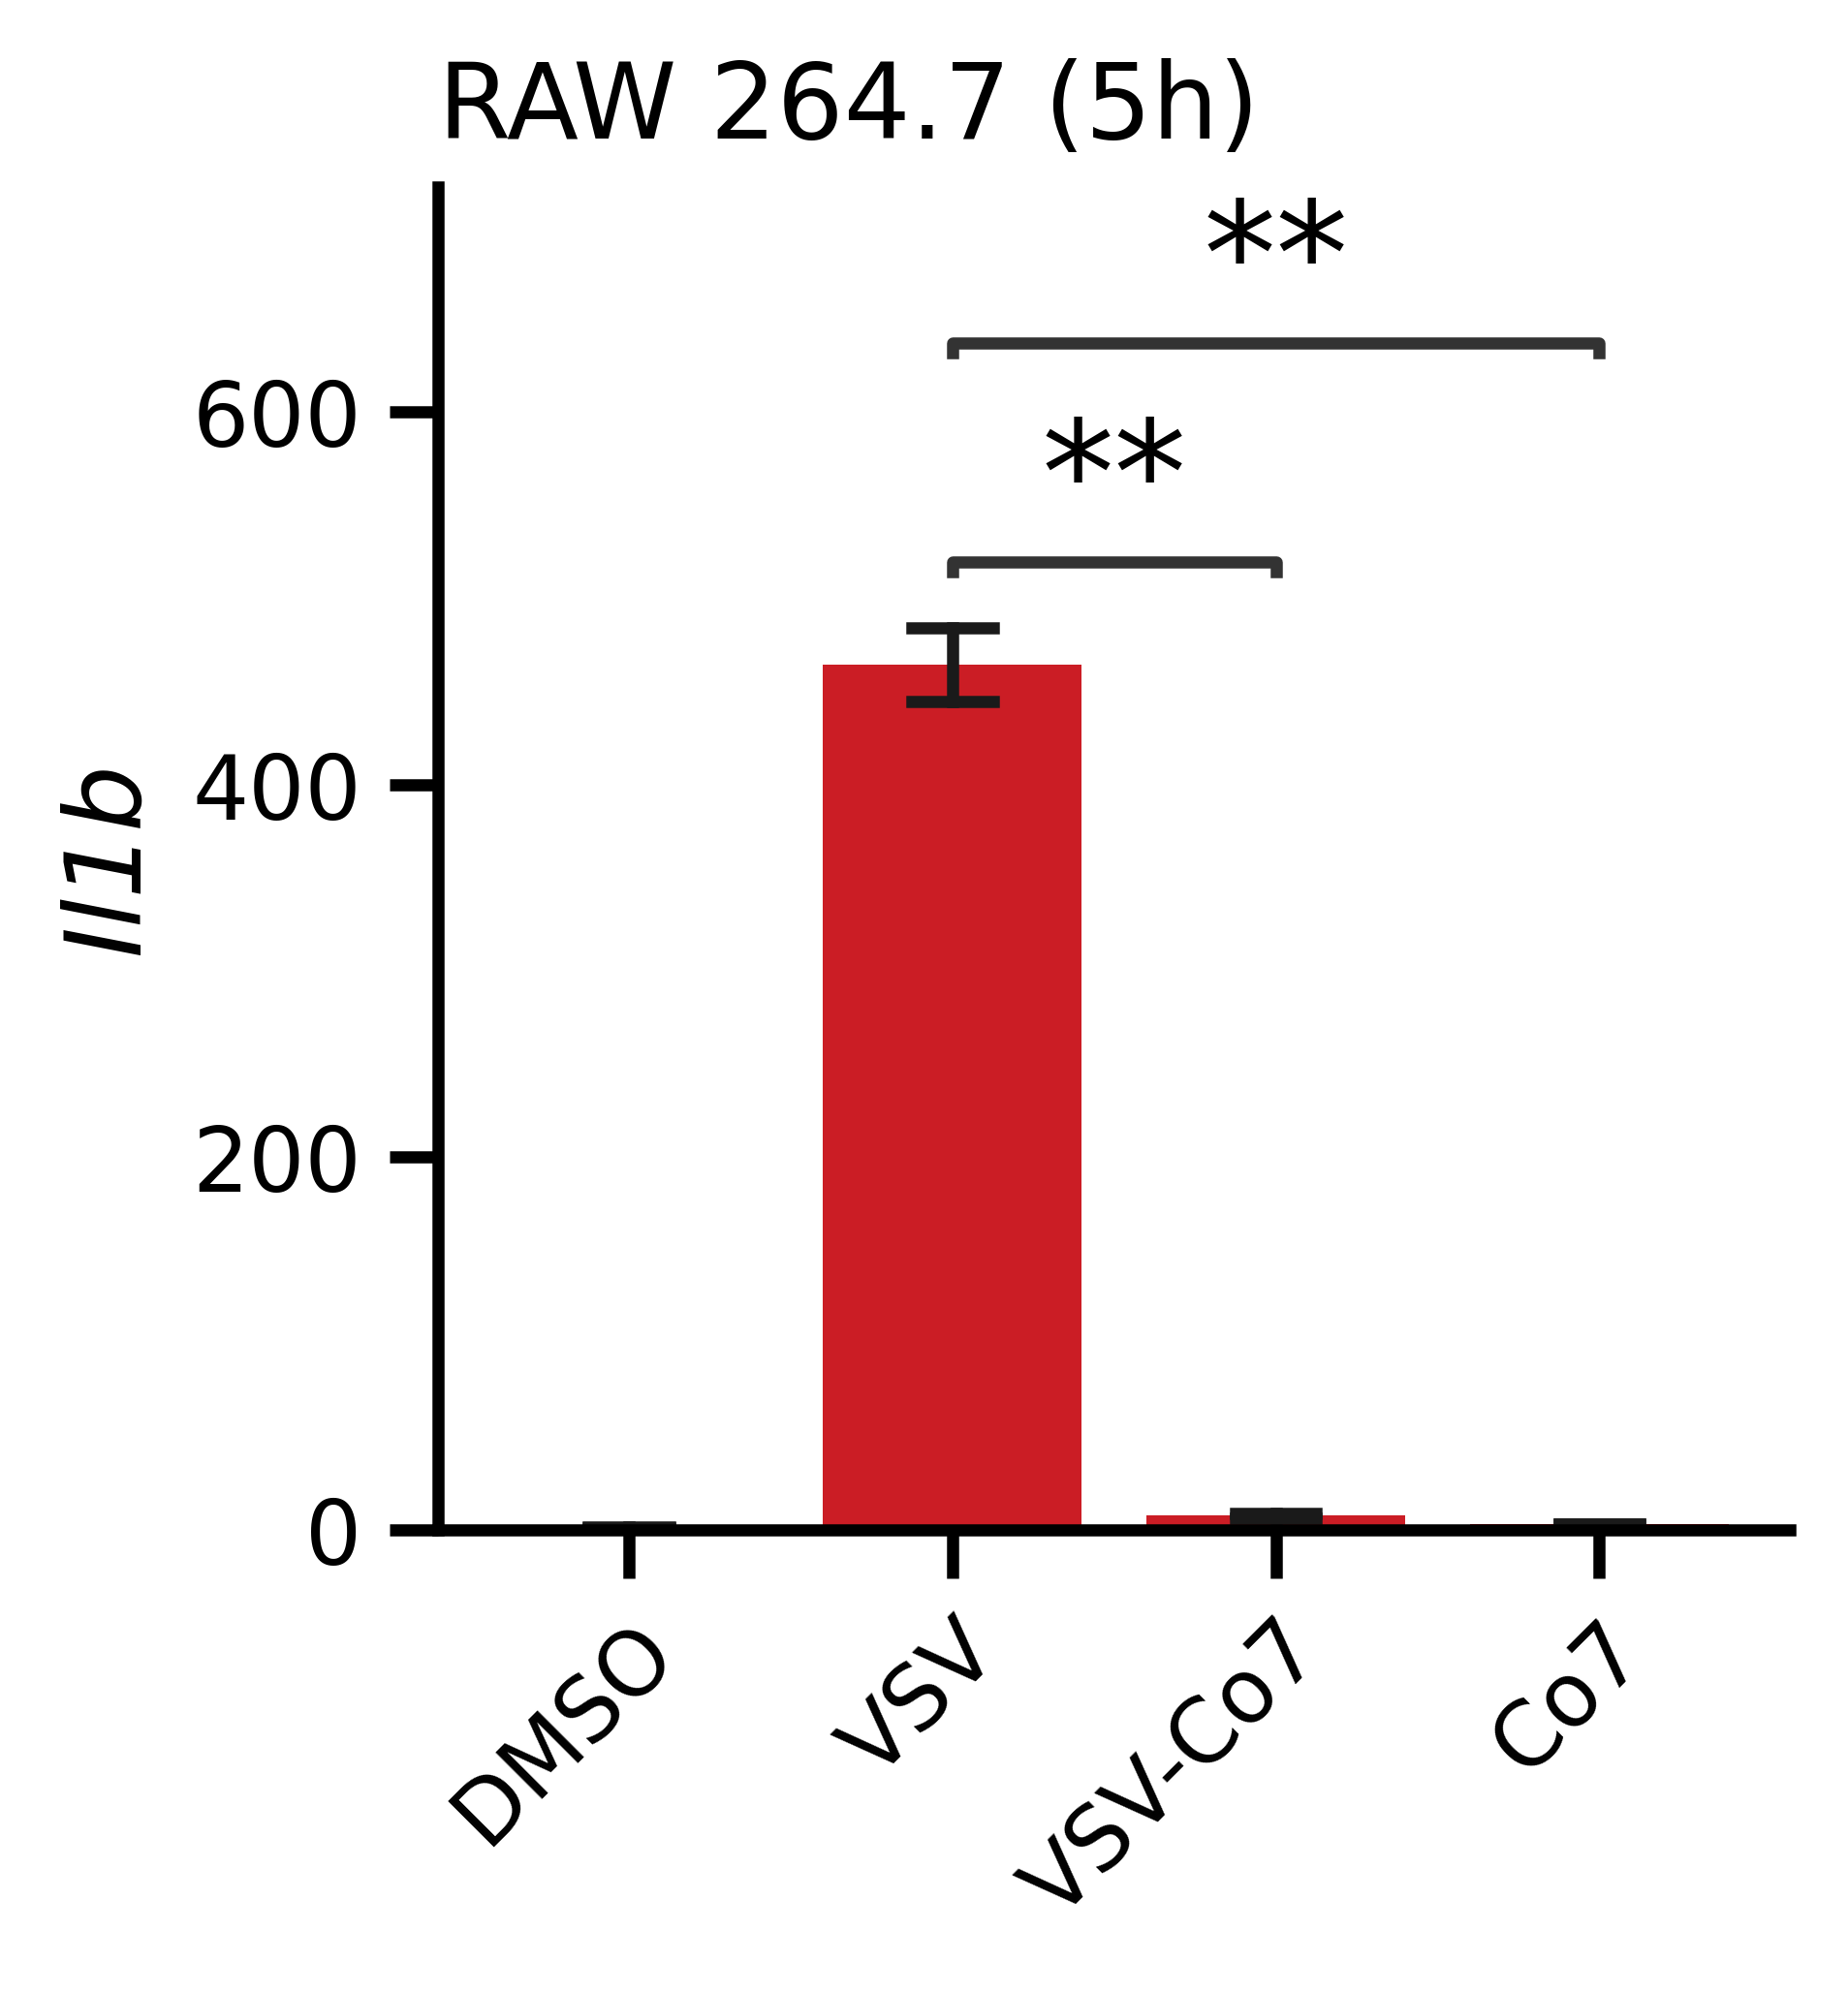

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

with sns.plotting_context('notebook', font_scale=1.5):
    # x='样本名称'
    x='samples'
    y='fc'
    gene = 'Il1b'
    outDirFig = '/Users/fenn/Documents/PhDProjects/MCB/MachineLearning/qPCR/HSV_VSV/inflammation'

    fig = plt.figure(figsize=(3,3), dpi=600)
    # fig = plt.figure(figsize=(6,6), dpi=600)
    # fig = plt.figure(figsize=(4,4), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x, 
        capsize=0.25, errwidth=1.5, palette=[sns.color_palette('bright')[3]],
        errcolor='0.1')
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    # ax.set_ylabel('Il1b', fontsize=13, fontstyle='italic')
    ax.set_ylabel(f'{gene}', fontsize=13, fontstyle='italic')
    # ax.set_title('RAW 264.7 (5h)', fontsize=13, loc='left')
    ax.set_title('RAW 264.7 (5h)', fontsize=13, loc='left')
    # ax.set_title('HEK293T (Co68)', fontsize=13, loc='left')
    ax.set_xticks(range(int(len(exp)/2)), list(exp[x].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    # ax.set_xticks(range(int(len(exp)/2)), ['DMSO', '50um', '100um', '200um','500um','1000um'], rotation_mode='anchor', rotation=45, horizontalalignment='right')
    
    # ax.errorbar(x,y, yerr=exp['err'], capsize=15, capthick=3, barsabove=False,fmt='_k', uplims=False, lolims=False, xuplims=True, xlolims=True, data=exp)
    
    pairs=[('VSV','VSV-Co7'), ('VSV','Co7')
    ]

    # pairs = [('Co68','LPS'),('Co68_LPS','LPS')]
    
    # pairs=[('DRUG-DMSO','DRUG-10H')]
    annotator = Annotator(g, pairs, data=exp, x=x, y=y)
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.01, verbose=True)
    annotator.apply_and_annotate()

# print(sns.__file__)
# Co68iLPS
plt.savefig(outDirFig + f'/RAW_5h_VSV_Co7_{gene}_33.pdf', dpi=700, bbox_inches='tight')

In [2]:
import pandas as pd

In [23]:
# exp = pd.read_csv('/Users/fenn/Documents/Co68/qPCR/qPCR/Co68iLPS/Co68_HSV_EMCV_6h.csv')
exp = pd.read_csv('/Users/fenn/Documents/Co68/qPCR/qPCR/antiViruses/Co68_VSV_RAW_timeSeries.csv')
# exp = pd.read_csv('/Users/fenn/Documents/Co68/qPCR/qPCR/antiViruses/Co68_VSV_HT29_timeSeries.csv')
exp

,样本名称,检测项目,CT,ACTB,diff,pow,fc,trt,group
0,RAW-DMSO-0H,VSVg,30.96,15.07,-15.89,0.000016,0.923901,DMSO,0h
1,RAW-DMSO-0H,VSVg,30.98,15.31,-15.67,0.000019,1.076099,DMSO,0h
2,RAW-DRUG-0H,VSVg,31.06,16.96,-14.10,0.000057,3.194988,Co68,0h
3,RAW-DRUG-0H,VSVg,31.21,16.97,-14.24,0.000052,2.899513,Co68,0h
4,RAW-DMSO-20H,VSVg,20.75,16.35,-4.40,0.047366,2657.419946,DMSO,10h
5,RAW-DMSO-20H,VSVg,21.03,16.40,-4.63,0.040386,2265.808968,DMSO,10h
6,RAW-DRUG-20H,VSVg,21.54,13.96,-7.58,0.005226,293.214069,Co68,10h
7,RAW-DRUG-20H,VSVg,21.65,14.01,-7.64,0.005013,281.269735,Co68,10h
8,RAW-DMSO-15H,VSVg,19.81,17.41,-2.40,0.189465,10629.679785,DMSO,20h
9,RAW-DMSO-15H,VSVg,19.97,17.43,-2.54,0.171943,9646.638020,DMSO,20h


In [24]:
# exp = geneExp
# exp.to_csv('./Co/THP1_Co68_IFNB1.csv', index=None)
# exp['trt'] = ['DMSO', 'DMSO','Co68','Co68']*3
exp['trt'] = ['DMSO', 'DMSO','Co7','Co7']*5
exp

,样本名称,检测项目,CT,ACTB,diff,pow,fc,trt,group
0,RAW-DMSO-0H,VSVg,30.96,15.07,-15.89,0.000016,0.923901,DMSO,0h
1,RAW-DMSO-0H,VSVg,30.98,15.31,-15.67,0.000019,1.076099,DMSO,0h
2,RAW-DRUG-0H,VSVg,31.06,16.96,-14.10,0.000057,3.194988,Co7,0h
3,RAW-DRUG-0H,VSVg,31.21,16.97,-14.24,0.000052,2.899513,Co7,0h
4,RAW-DMSO-20H,VSVg,20.75,16.35,-4.40,0.047366,2657.419946,DMSO,10h
5,RAW-DMSO-20H,VSVg,21.03,16.40,-4.63,0.040386,2265.808968,DMSO,10h
6,RAW-DRUG-20H,VSVg,21.54,13.96,-7.58,0.005226,293.214069,Co7,10h
7,RAW-DRUG-20H,VSVg,21.65,14.01,-7.64,0.005013,281.269735,Co7,10h
8,RAW-DMSO-15H,VSVg,19.81,17.41,-2.40,0.189465,10629.679785,DMSO,20h
9,RAW-DMSO-15H,VSVg,19.97,17.43,-2.54,0.171943,9646.638020,DMSO,20h


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

10h_DMSO vs. 10h_Co7: t-test independent samples, P_val:8.019e-03 t=1.110e+01
20h_DMSO vs. 20h_Co7: t-test independent samples, P_val:2.620e-03 t=1.950e+01
30h_DMSO vs. 30h_Co7: t-test independent samples, P_val:3.700e-03 t=1.640e+01
40h_DMSO vs. 40h_Co7: t-test independent samples, P_val:4.410e-01 t=-9.535e-01


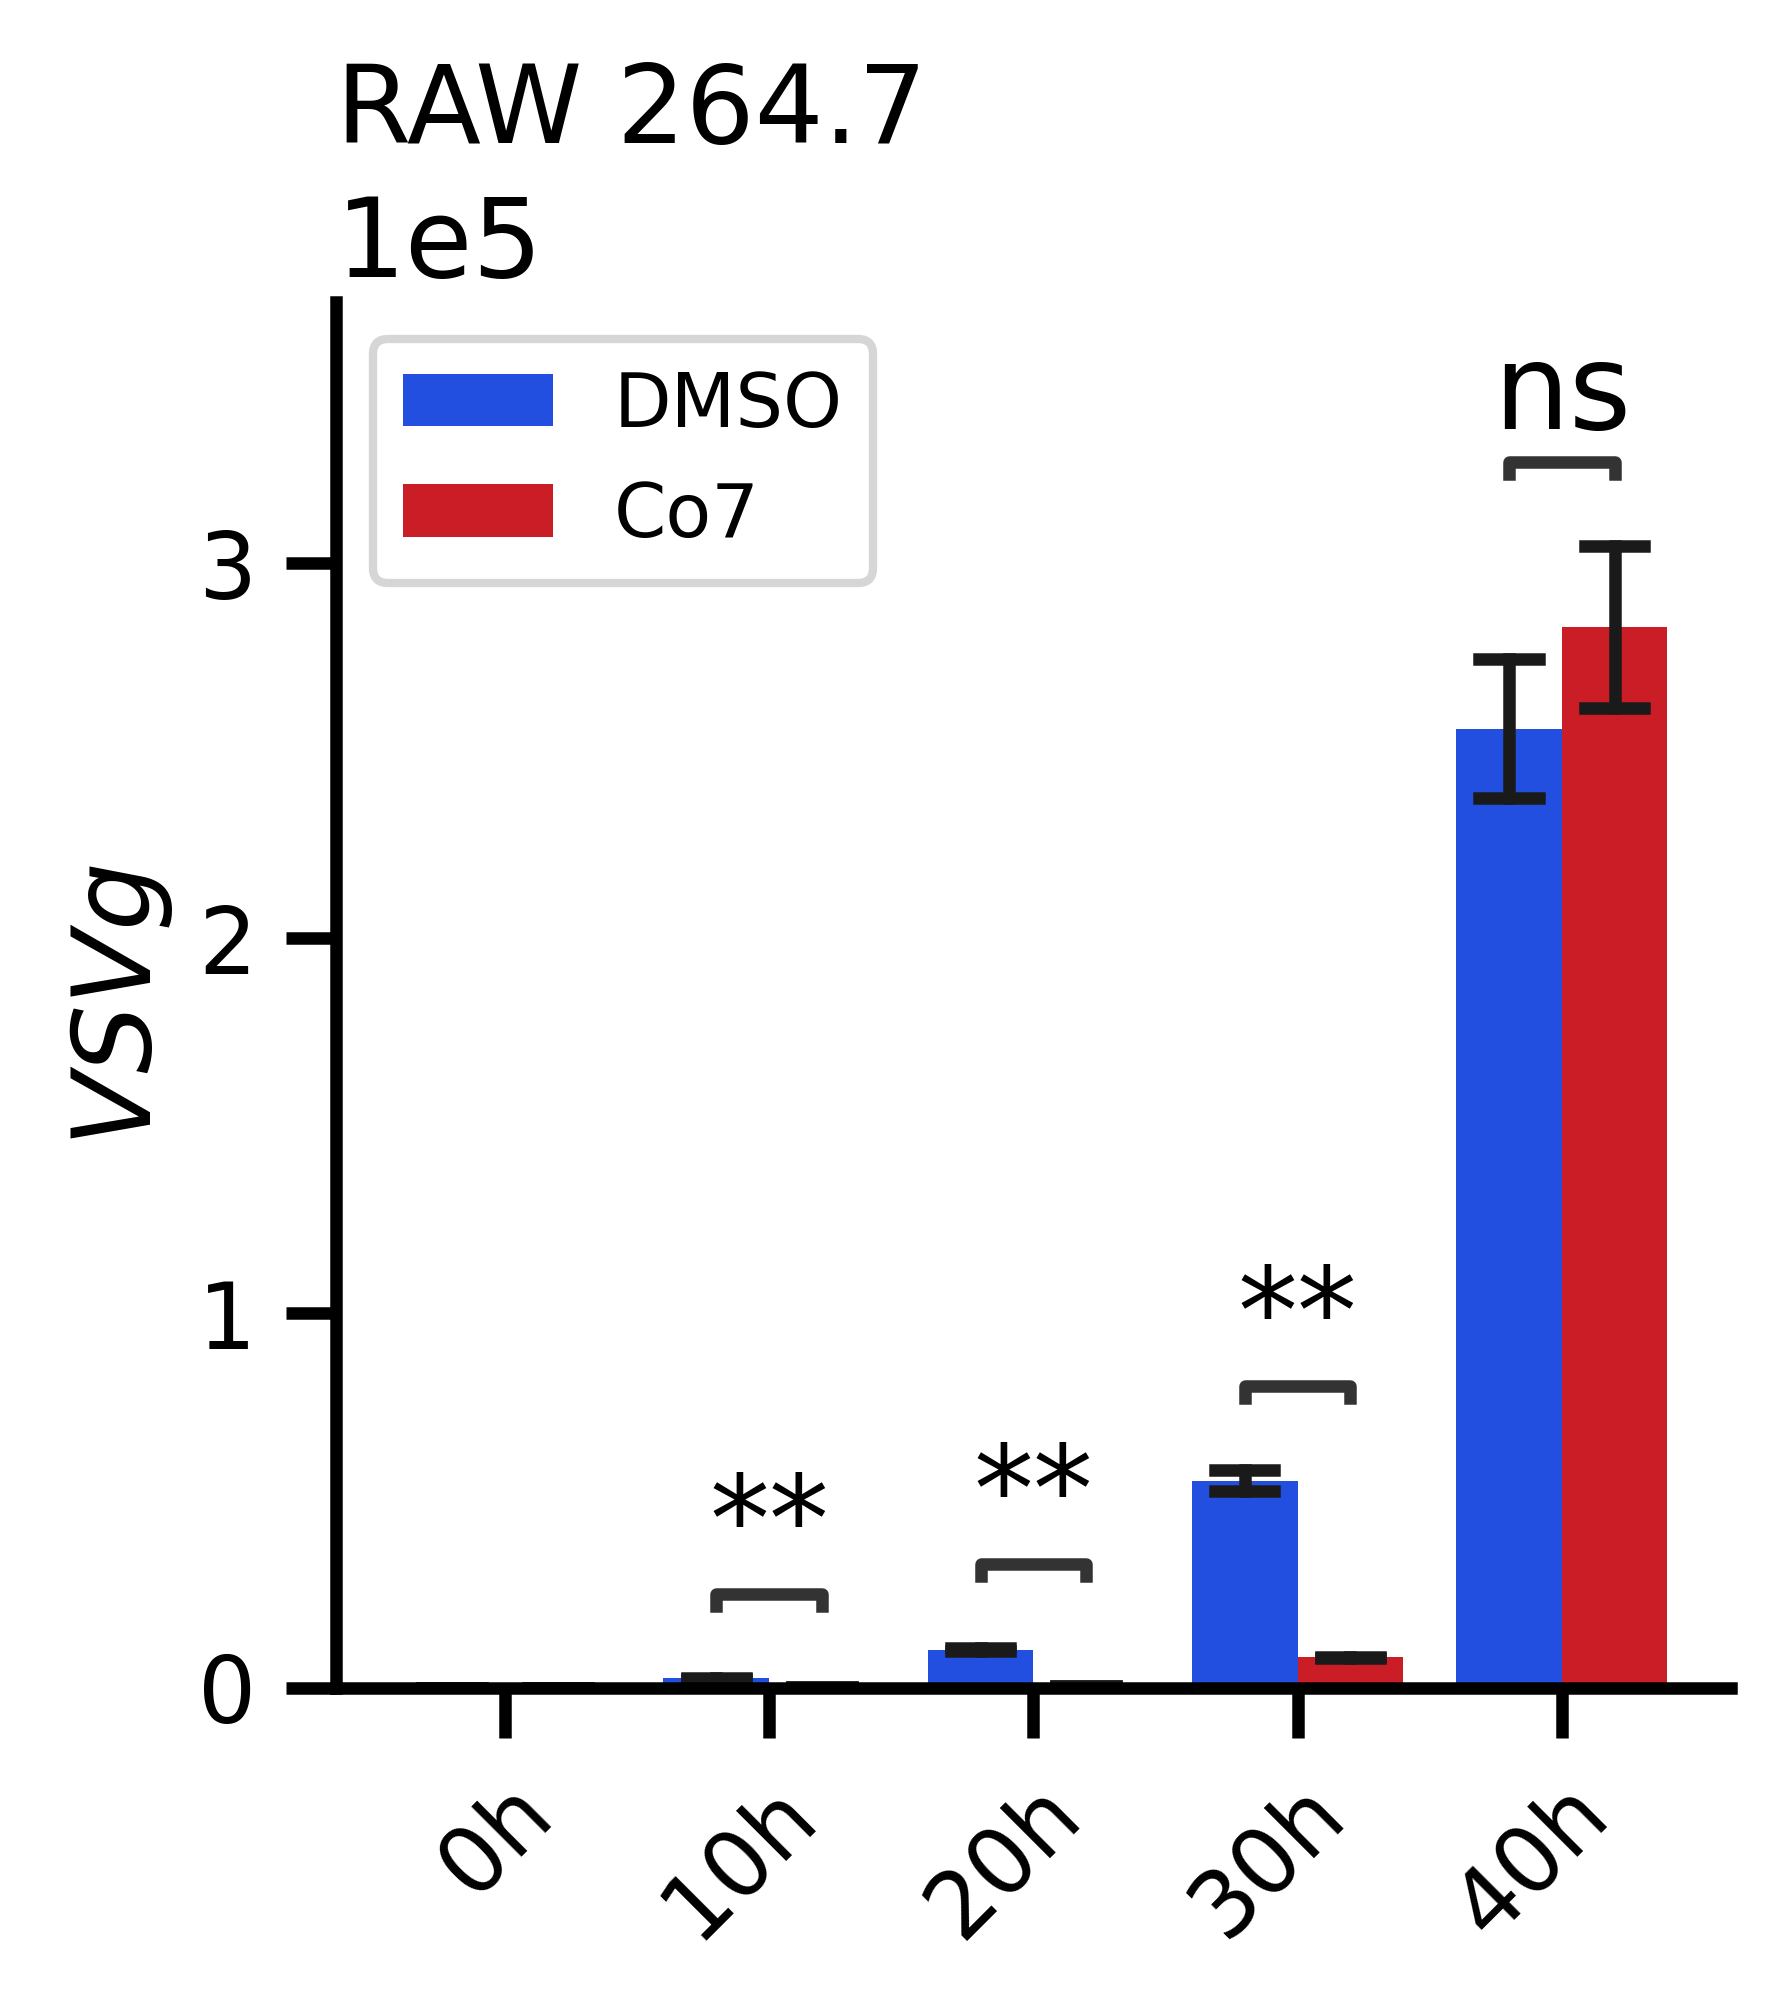

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import ScalarFormatter
from statannotations.Annotator import Annotator

with sns.plotting_context('notebook', font_scale=1.2):
    x='group'
    y='fc'
    gene = 'VSVg'
    outDirFig = '/Users/fenn/Documents/PhDProjects/MCB/MachineLearning/qPCR/HSV_VSV'

    trt = pd.DataFrame(exp['样本名称'].value_counts()).index
    a = list(trt)


    fig = plt.figure(figsize=(3, 3), dpi=600)
    # fig = plt.figure(figsize=(4, 4), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    g = sns.barplot(data=exp, y=y, x=x, hue='trt',
        capsize=0.225, errwidth=1.5, palette=[sns.color_palette('bright')[0], sns.color_palette('bright')[3]],
        errcolor='0.1')
    sns.despine()
    ax.tick_params(width=1.5, labelsize=11)
    ax.set_xlabel('', fontsize=13)
    
    ax.set_ylabel(f'{gene}', fontsize=13, fontstyle='italic')
    # plt.gca().yaxis.set_major_locator(MultipleLocator(100000))
    # plt.yscale('log')
    #设置科学计数法
    # plt.gca().yaxis.set_major_formatter(ScalarFormatter())
    # plt.gca().yaxis.set_major_locator(plt.MultipleLocator(500000))
    
    ax.legend(loc=0, fontsize=9)
    ax.set_title('RAW 264.7', fontsize=13, loc='left')
    # ax.set_title('HT29', fontsize=13, loc='left')
    ##一步法设置科学计数法
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,3))
    ####科学计数法
    ax.set_xticks(range(int(len(exp)/4)), list(exp['group'].drop_duplicates()), rotation_mode='anchor', rotation=45, horizontalalignment='right')
    
    # ax.errorbar(x,y, yerr=exp['err'], capsize=15, capthick=3, barsabove=False,fmt='_k', uplims=False, lolims=False, xuplims=True, xlolims=True, data=exp)
    
    # pairs=[
    # (('M0', 'DMSO'),('M0', 'Co68')),
    # (('M1', 'DMSO'),('M1', 'Co68')),
    # (('M2', 'DMSO'),('M2', 'Co68'))
    #     ]

    # pairs=[
    # # (('MOCK', 'DMSO'),('MOCK', 'Co7')),
    # (('EMCV', 'DMSO'),('EMCV', 'Co7')),
    # (('HSV', 'DMSO'),('HSV', 'Co7'))
    #     ]
    
    pairs=[(('10h','Co7'),('10h','DMSO')),(('20h','Co7'),('20h','DMSO')),
           (('30h','Co7'),('30h','DMSO')),(('40h','Co7'),('40h','DMSO')),
    ]
    
    annotator = Annotator(g, pairs, data=exp, x=x, y=y, hue='trt')
    annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=1.5, line_height=0.01, verbose=True)

    annotator.apply_and_annotate()

# print(sns.__file__)
plt.savefig(outDirFig + f'/RAW264_Co7_{gene}_Antiviral_33.pdf', dpi=700, bbox_inches='tight')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

with sns.plotting_context('notebook', font_scale=2.2):
    x='样本名称'
    y='fc'

    trt = pd.DataFrame(exp['样本名称'].value_counts()).index
    a = list(trt)


    fig = plt.figure(figsize=(12, 8), dpi=600)
    ax = fig.add_subplot(111)
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)

    g = sns.barplot(data=exp, y=y, x=x, width=.5,
        capsize=0.25, errwidth=3, palette=[sns.color_palette('bright')[3]],
        errcolor='0.1')
    sns.despine()
    ax.tick_params(width=3, labelsize=30)
    ax.set_xlabel('')
    ax.set_ylabel('IFNB1', fontsize=35, fontstyle='italic')
    # ax.set_title('ERVB2_1-I_MM-int', fontsize=35, loc='center')
    ax.set_xticks(range(int(len(exp)/2)), ['DMSO', 'Co1', 'Co9', 'Co26', 'Co66', 'Co68', 'Co75'], rotation_mode='anchor', rotation=45, horizontalalignment='right')
    

    # ax.errorbar(x,y, yerr=exp['err'], capsize=15, capthick=3, barsabove=False,fmt='_k', uplims=False, lolims=False, xuplims=True, xlolims=True, data=exp)
    
    
    # pairs=[('WT_MOCK', 'WT_VSV'), ('WT_MOCK', 'WT_HSV')]
    # annotator = Annotator(g, pairs, data=exp, x=x, y=y)
    # annotator.configure(test='t-test_ind', text_format='star', loc='inside', line_width=3, line_height=0.03, verbose=True)

    # annotator.apply_and_annotate()

# print(sns.__file__)
# plt.savefig('./Co_New_Drug_5.pdf', dpi=700, bbox_inches='tight')

In [ ]:
lps_ifn = y.copy()
lps_ifn["diff"] = -lps_ifn["Cт "].diff(periods=24)
lps_ifn = lps_ifn.dropna().reset_index(drop=True)
lps_ifn["power"] = np.power(2,lps_ifn["diff"])
y = lps_ifn.sort_values(by="样本名称", ascending=False).reset_index(drop=True)
y

In [105]:
#data = pd.read_excel("./2021-12-30_161602_TG_4h.xls",header=18)
#data = pd.read_excel("./2021-12-28_195556_PARP14_TG.xls", header=18)
#data = pd.read_excel("./2021-12-25_204359_PARP14.xls", header=18)
data = pd.read_excel("./2022-01-01_202149_parp14_WT.xls", header=18)

#data = pd.read_excel("./2022-01-02_135723_BMDM_PERI.xls", header=18)
#data = pd.read_excel("./2022-01-05_184059_parp14_RA_RTP4.xls", header=18)
#data = pd.read_excel("./2022-01-07_133012_PARP14_WT_peritoneal.xls", header=18)
#data = pd.read_excel("./2021-12-25_204359_PARP14.xls", header=18)
res=data.loc[:,['样本名称','基因名称','Cт ']].dropna(axis=0)
z = res.sort_values(by=["基因名称","样本名称"]).reset_index(drop=True)

In [190]:
z = z[(z["基因名称"] == "mACTB") | (z["基因名称"] == "mIFNB") | (z["基因名称"] == "mIL-1B") | 
    (z["基因名称"] == "mIL-6")].reset_index(drop=True)
z[z["基因名称"] == "mACTB"]
z

,样本名称,基因名称,Cт
0,KO-HSV,mACTB,22.937943
1,KO-HSV,mACTB,22.700266
2,KO-MHV,mACTB,22.756126
3,KO-MHV,mACTB,22.712191
4,KO-MOCK,mACTB,21.112333
...,...,...,...
59,WT-MHV,mIL-6,28.071520
60,WT-MOCK,mIL-6,30.946039
61,WT-MOCK,mIL-6,31.025661
62,WT-SEV,mIL-6,28.599861


In [75]:
#ifnb = lps[(lps["基因名称"] == "ACTB") | (lps["基因名称"] == "IL-6")].reset_index(drop=True)
lps_ifn = y.copy()
lps_ifn["diff"] = -lps_ifn["Cт "].diff(periods=24)
lps_ifn = lps_ifn.dropna().reset_index(drop=True)
lps_ifn["power"] = np.power(2,lps_ifn["diff"])
y = lps_ifn.sort_values(by="样本名称", ascending=False).reset_index(drop=True)
y


,样本名称,基因名称,Cт,diff,power
0,WT-VSV,mIL-6,24.523293,-9.170360,0.001736
1,WT-VSV,mIL-6,24.739861,-9.205400,0.001694
2,WT-SEV,mIL-6,29.860668,-12.842024,0.000136
3,WT-SEV,mIL-6,29.885647,-12.855568,0.000135
4,WT-MOCK,mIL-6,31.318233,-14.530092,0.000042
5,WT-MOCK,mIL-6,31.119709,-14.259882,0.000051
6,WT-MHV,mIL-6,27.883690,-10.250652,0.000821
7,WT-MHV,mIL-6,27.953665,-10.416473,0.000732
8,WT-LPS,mIL-6,18.843630,-2.811214,0.142475
9,WT-LPS,mIL-6,18.790939,-2.342634,0.197150


In [76]:
f1 = y[(y["样本名称"] == "WT-LPS") | (y["样本名称"] == "KO-LPS") | (y["样本名称"] == "WT-MOCK") | (y["样本名称"] == "KO-MOCK")].reset_index(drop=True)
f1
f2 = y[(y["样本名称"] == "WT-VSV") | (y["样本名称"] == "KO-VSV") | (y["样本名称"] == "WT-MOCK") | (y["样本名称"] == "KO-MOCK")].reset_index(drop=True)
f2
f3 = y[(y["样本名称"] == "WT-HSV") | (y["样本名称"] == "KO-HSV") | (y["样本名称"] == "WT-MOCK") | (y["样本名称"] == "KO-MOCK")].reset_index(drop=True)
f3
f4 = y[(y["样本名称"] == "WT-SEV") | (y["样本名称"] == "KO-SEV") | (y["样本名称"] == "WT-MOCK") | (y["样本名称"] == "KO-MOCK")].reset_index(drop=True)
f4
f5 = y[(y["样本名称"] == "WT-MHV") | (y["样本名称"] == "KO-MHV") | (y["样本名称"] == "WT-MOCK") | (y["样本名称"] == "KO-MOCK")].reset_index(drop=True)
f5

,样本名称,基因名称,Cт,diff,power
0,WT-MOCK,mIL-6,31.318233,-14.530092,0.000042
1,WT-MOCK,mIL-6,31.119709,-14.259882,0.000051
2,WT-MHV,mIL-6,27.883690,-10.250652,0.000821
3,WT-MHV,mIL-6,27.953665,-10.416473,0.000732
4,KO-MOCK,mIL-6,31.527626,-15.461292,0.000022
5,KO-MOCK,mIL-6,30.444637,-14.272758,0.000051
6,KO-MHV,mIL-6,28.807964,-10.856525,0.000539
7,KO-MHV,mIL-6,28.841860,-10.506485,0.000687


In [231]:
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

In [20]:
res=f3.loc[:,["cell","power-G13","power-CRE"]]
res

,cell,power-G13,power-CRE
0,G13,143.984469,0.946148
1,G13,55.618461,0.946148
2,G13,1024.000000,0.946148
3,G13,200.750863,0.946148
4,G13,56.362067,0.946148
...,...,...,...
145,NT,1024.000000,0.946148
146,NT,33.869490,0.946148
147,NT,461.842271,0.946148
148,NT,1024.000000,0.946148


In [22]:
no_2 = res.melt(
    id_vars="cell",
    value_vars=["power-G13", "power-CRE"],
    value_name="power",
    var_name="gene",
)
no_2

,cell,gene,power
0,G13,power-G13,143.984469
1,G13,power-G13,55.618461
2,G13,power-G13,1024.000000
3,G13,power-G13,200.750863
4,G13,power-G13,56.362067
...,...,...,...
295,NT,power-CRE,0.946148
296,NT,power-CRE,0.946148
297,NT,power-CRE,0.946148
298,NT,power-CRE,0.946148


In [6]:
from gseapy import Msigdb
msig = Msigdb()
gmt = msig.get_gmt(category='mh.all')
gmt

In [9]:
msig.list_dbver()

['c1.all',
 'c2.all',
 'c2.cgp',
 'c2.cp.biocarta',
 'c2.cp.kegg',
 'c2.cp.pid',
 'c2.cp.reactome',
 'c2.cp',
 'c2.cp.wikipathways',
 'c3.all',
 'c3.mir.mir_legacy',
 'c3.mir.mirdb',
 'c3.mir',
 'c3.tft.gtrd',
 'c3.tft.tft_legacy',
 'c3.tft',
 'c4.all',
 'c4.cgn',
 'c4.cm',
 'c5.all',
 'c5.go.bp',
 'c5.go.cc',
 'c5.go.mf',
 'c5.go',
 'c5.hpo',
 'c6.all',
 'c7.all',
 'c7.immunesigdb',
 'c7.vax',
 'c8.all',
 'h.all',
 'msigdb']

In [5]:
import os
import re
import numpy as np
os.chdir('/Users/fenn/Documents/PhDProjects/MCB/RNA-seq/FPKM/')
os.listdir()

['figureFPKM',
 '.DS_Store',
 'MCB_LPS.pdf',
 'gene_count_LPS_MCB.csv',
 'gene_fpkm_LPS_MCB.csv',
 'DEGsLPSMCB',
 'gene_fpkm_VB12_LPS_All.csv',
 'DEGsParp14']

In [3]:
#RNA-seq analysis
import pandas as pd
from gseapy import gsva

# 读取基因表达数据
expFPKM = pd.read_csv('gene_fpkm_VB12_LPS_All.csv')
expFPKM


,Geneid,DMSO1,DMSO2,LPS-1h,LPS-2h,LPS-3h,RAW-LPS,RAW-LPS-MyD88,RAW-LPS-TRIF,LPS_6h,MCB1,MCB2,LPS-MCB1,LPS-MCB2,RAW-MCB-MyD88,RAW-MCB-TLR4
0,0610005C13Rik,0.26,0.04,0.11,0.05,0.23,0.11,0.11,0.00,0.18,0.14,0.18,0.10,0.11,0.11,0.11
1,0610009B22Rik,26.39,25.77,17.47,12.64,11.30,10.59,18.17,13.63,12.51,15.55,13.06,5.06,9.60,7.35,15.10
2,0610009E02Rik,0.19,0.18,0.00,0.03,0.08,0.00,0.40,0.04,0.06,0.20,0.22,0.04,0.00,0.08,0.16
3,0610009L18Rik,0.76,0.59,0.19,0.51,0.31,0.78,4.12,0.98,0.24,0.42,0.00,0.27,0.10,0.50,0.41
4,0610010F05Rik,11.72,11.60,10.87,9.35,9.37,13.14,5.56,12.29,13.09,7.54,7.49,3.28,3.91,8.21,9.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25234,Zyx,4.42,1.91,12.74,14.10,17.19,14.08,20.81,13.15,8.07,2.57,2.34,4.56,5.23,3.67,12.04
25235,Zzef1,9.45,7.87,6.88,3.66,4.35,4.97,2.04,6.66,5.17,8.47,8.65,6.98,5.66,4.81,3.52
25236,Zzz3,21.17,14.33,13.50,14.92,10.15,18.48,12.52,25.63,24.59,28.13,30.24,27.68,25.08,28.40,23.28
25237,a,0.42,0.06,0.00,0.00,0.00,0.00,0.45,0.09,0.15,0.22,0.19,0.08,0.00,0.00,0.19


In [4]:
il1b = expFPKM[expFPKM['Geneid'].str.contains('^Il1\w$|^Isg\w+$|Ifn\w+', flags=re.IGNORECASE)].set_index('Geneid')
il1b = il1b[il1b.apply(np.mean, axis=1)>2]
il1b


,DMSO1,DMSO2,LPS-1h,LPS-2h,LPS-3h,RAW-LPS,RAW-LPS-MyD88,RAW-LPS-TRIF,LPS_6h,MCB1,MCB2,LPS-MCB1,LPS-MCB2,RAW-MCB-MyD88,RAW-MCB-TLR4
Geneid,,,,,,,,,,,,,,,
Ifnar1,15.26,11.55,11.18,10.47,9.38,10.17,9.09,13.16,11.47,16.78,16.79,15.85,17.03,8.52,8.22
Ifnar2,36.64,25.77,17.86,16.41,16.68,17.89,26.36,14.47,15.29,22.00,21.12,16.98,15.96,27.43,29.01
Ifnb1,0.00,0.00,4.82,20.47,25.97,10.23,0.89,1.19,3.59,0.00,0.00,0.15,0.25,0.97,1.25
Ifngr1,45.89,34.95,22.07,16.22,12.22,11.66,22.81,18.58,14.67,48.87,45.02,29.65,38.05,16.47,14.05
Ifngr2,44.92,40.30,50.20,54.94,42.87,61.28,52.85,76.66,44.83,53.47,51.05,77.73,76.57,21.08,24.61
Il15,8.87,7.94,1.96,4.86,28.70,28.32,3.73,14.35,7.94,9.02,9.02,3.04,6.13,20.22,37.12
Il16,22.49,8.54,4.61,2.50,3.10,3.29,1.18,3.45,4.38,12.07,11.16,3.40,6.12,2.95,4.68
Il18,16.84,13.37,8.39,10.43,32.04,13.81,16.55,6.80,30.15,4.37,4.31,12.75,12.05,30.50,42.88
Il1a,0.12,0.08,3.82,17.09,124.34,730.47,76.79,503.21,125.05,0.37,0.17,366.59,506.18,92.14,96.06


In [10]:
###DEGs analysis and visualization
DEGs = pd.read_csv('/Users/fenn/Documents/PhDProjects/MCB/RNA-seq/DEGs/DEGsPvalue_LPS_MCB.csv')
DEGs

,Geneid,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Zc3h14,2252.780289,0.057669,0.112533,0.512466,6.083250e-01,6.943839e-01
1,Troap,421.152861,-3.716137,0.250476,-14.836281,8.535838e-50,3.233606e-48
2,1810013L24Rik,2118.869925,1.805273,0.115040,15.692534,1.701269e-55,7.578276e-54
3,Srsf7,4817.815885,0.004643,0.099857,0.046493,9.629176e-01,9.737724e-01
4,Fignl2,5.207094,-1.804217,1.486588,-1.213662,2.248766e-01,3.124617e-01
...,...,...,...,...,...,...,...
13168,Zfp36l2,497.376282,1.301468,0.183299,7.100239,1.245409e-12,8.631008e-12
13169,Gja6,2.753675,4.815590,3.088485,1.559208,1.189473e-01,1.820138e-01
13170,Tpm4,13075.284548,-2.058494,0.111301,-18.494774,2.274926e-76,1.660311e-74
13171,Gm10130,220.400707,0.048664,0.240439,0.202396,8.396070e-01,8.814338e-01


In [36]:
markers = DEGs[DEGs['Geneid'].str.contains('Tlr\w\+', flags=re.IGNORECASE)]
markers

,Geneid,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj


In [12]:
data = DEGs

In [14]:
up = data[(data['log2FoldChange']>2) & (data['padj']<0.05) & (data['baseMean']>20)]
up = up.sort_values(['log2FoldChange'], ascending=False).reset_index(drop=True)
up

,Geneid,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Gstp3,48.514689,8.953148,2.416129,3.705575,2.109114e-04,5.952706e-04
1,Siglech,30.048593,8.261586,2.443433,3.381139,7.218591e-04,1.867984e-03
2,Crtam,28.508771,8.187268,2.452695,3.338070,8.436258e-04,2.155024e-03
3,Lman1l,24.074943,7.942608,2.461578,3.226633,1.252559e-03,3.109255e-03
4,Osr2,156.821986,7.624322,0.884781,8.617181,6.862256e-18,6.947227e-17
...,...,...,...,...,...,...,...
416,Crebl2,38.395848,2.013985,0.604000,3.334414,8.547927e-04,2.180962e-03
417,Arhgap26,311.915987,2.013664,0.225552,8.927722,4.348712e-19,4.748661e-18
418,Gm38426,33.769247,2.001588,0.632401,3.165062,1.550501e-03,3.784126e-03
419,Rbl2,357.711079,2.001510,0.206881,9.674690,3.862614e-22,5.045222e-21


In [32]:
down = data[(data['log2FoldChange']<-2) & (data['padj']<0.05) & (data['baseMean']>20)]
down = down.sort_values(['log2FoldChange'], ascending=True).reset_index(drop=True)
down

,Geneid,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Lta,377.542990,-9.662288,1.037278,-9.315040,1.219064e-20,1.455441e-19
1,Cd300e,39.368493,-8.846444,2.434085,-3.634402,2.786261e-04,7.708913e-04
2,Mmp14,54.753099,-7.873779,1.509468,-5.216262,1.825703e-07,7.747843e-07
3,Csf3,3549.125337,-7.489687,0.637487,-11.748767,7.165649e-32,1.514989e-30
4,Il6,180.099397,-7.000070,0.641768,-10.907475,1.061644e-27,1.818875e-26
...,...,...,...,...,...,...,...
536,Ska2,257.692818,-2.016067,0.754084,-2.673532,7.505711e-03,1.599980e-02
537,Gemin6,248.826079,-2.011772,0.237937,-8.455065,2.789310e-17,2.713276e-16
538,Eno1b,6433.765868,-2.008963,0.123016,-16.330880,5.951945e-60,3.003407e-58
539,Fancb,183.173534,-2.005601,0.271922,-7.375651,1.635440e-13,1.216971e-12


In [35]:
il1b = down[down['Geneid'].str.contains('Il\w|^Isg\w+|Ifn\w+', flags=re.IGNORECASE)].reset_index(drop=True)
# il1b = il1b[il1b.apply(np.mean, axis=1)>2]
il1b

,Geneid,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Il6,180.099397,-7.000070,0.641768,-10.907475,1.061644e-27,1.818875e-26
1,Il4i1,119.245382,-6.348787,1.725273,-3.679874,2.333492e-04,6.533172e-04
2,Il27,2794.257504,-5.955554,0.159402,-37.361898,1.625134e-305,2.999068e-302
3,Ifnb1,27.956921,-4.521456,0.882322,-5.124500,2.983291e-07,1.235593e-06
4,Neil3,222.336305,-4.399437,0.338493,-12.997138,1.270075e-38,3.403907e-37
5,Il1rl1,2992.135937,-4.000150,0.369677,-10.820670,2.747614e-27,4.621572e-26
6,Rab3il1,627.268794,-3.886292,0.188949,-20.567904,5.321704e-94,5.681468e-92
7,Zwilch,821.864610,-3.781147,0.198206,-19.076826,3.934347e-81,3.080236e-79
8,Isg15,1307.859170,-2.657120,0.485378,-5.474330,4.391699e-08,1.988502e-07
9,Il10ra,3099.418015,-2.328271,0.119137,-19.542812,4.749263e-85,4.062979e-83


In [191]:
heatData = pd.read_csv('/Users/fenn/Documents/PhDProjects/MCB/RNA-seq/DEGs/DEGs_markerInflammation_55.csv', index_col=0)
heatData.head()

,DMSO2,DMSO1,RAW-Fe68,LPS-1h,LPS-2h,LPS-3h,RAW-LPS_1,RAW_LPS_2,RAW-LPS_3,RAW-LPS-MyD88,RAW-LPS-TRIF,MCB1,MCB2,LPS-MCB1,LPS-MCB2,RAW-MCB-MyD88,RAW-MCB-TLR4,RAW-LPS-L68,RAW-L68
Geneid,,,,,,,,,,,,,,,,,,,
Lta,0.00,0.10,0.10,0.35,1.03,4.97,30.02,27.97,3.30,0.32,0.40,0.11,0.10,0.00,0.09,16.00,20.14,21.81,3.52
Tnfsf15,0.01,0.00,0.02,0.08,4.48,14.23,0.66,0.42,18.63,0.32,6.08,0.01,0.00,0.01,0.05,0.32,0.54,5.26,0.28
Il6,0.00,0.00,0.04,0.00,2.83,29.08,16.10,17.22,59.14,1.69,9.18,0.00,0.00,0.10,0.22,12.20,12.32,60.36,0.30
Mmp14,0.02,0.01,0.00,0.06,0.21,0.64,1.61,1.44,1.27,0.15,0.08,0.05,0.02,0.01,0.00,0.59,0.62,0.32,0.21
Edn1,0.00,0.02,0.00,0.11,7.00,5.21,1.61,1.57,17.74,11.85,3.67,0.00,0.03,0.00,0.09,0.15,0.24,3.45,0.30


In [192]:
heatData = heatData.loc[:,['DMSO1','DMSO2','RAW-LPS_1', 'RAW_LPS_2','LPS-MCB1', 'LPS-MCB2','MCB1', 'MCB2']]
heatData.columns = ['DMSO_1','DMSO_2','LPS_1', 'LPS_2','LPS-MCB_1', 'LPS-MCB_2','MCB_1', 'MCB_2']
heatData = heatData[heatData.apply(np.mean, axis=1)>5]
heatData.shape

(53, 8)

In [193]:
#将数据进行标准化处理
data_standarlized = heatData.apply(lambda x: (x-np.mean(x))/np.std(x), axis=1)
data_standarlized.head()

,DMSO_1,DMSO_2,LPS_1,LPS_2,LPS-MCB_1,LPS-MCB_2,MCB_1,MCB_2
Geneid,,,,,,,,
Lta,-0.574206,-0.582182,1.812352,1.648835,-0.582182,-0.575003,-0.573408,-0.574206
Csf3,-0.582987,-0.581978,1.774678,1.688534,-0.574583,-0.560043,-0.582315,-0.581306
Cxcl11,-0.586019,-0.585517,1.782536,1.680222,-0.561915,-0.556642,-0.586395,-0.586270
Cxcl10,-0.589568,-0.589288,1.700580,1.762621,-0.559276,-0.542351,-0.591298,-0.591420
Myc,-0.595040,-0.602549,1.670618,1.790283,-0.522772,-0.530750,-0.604895,-0.604895


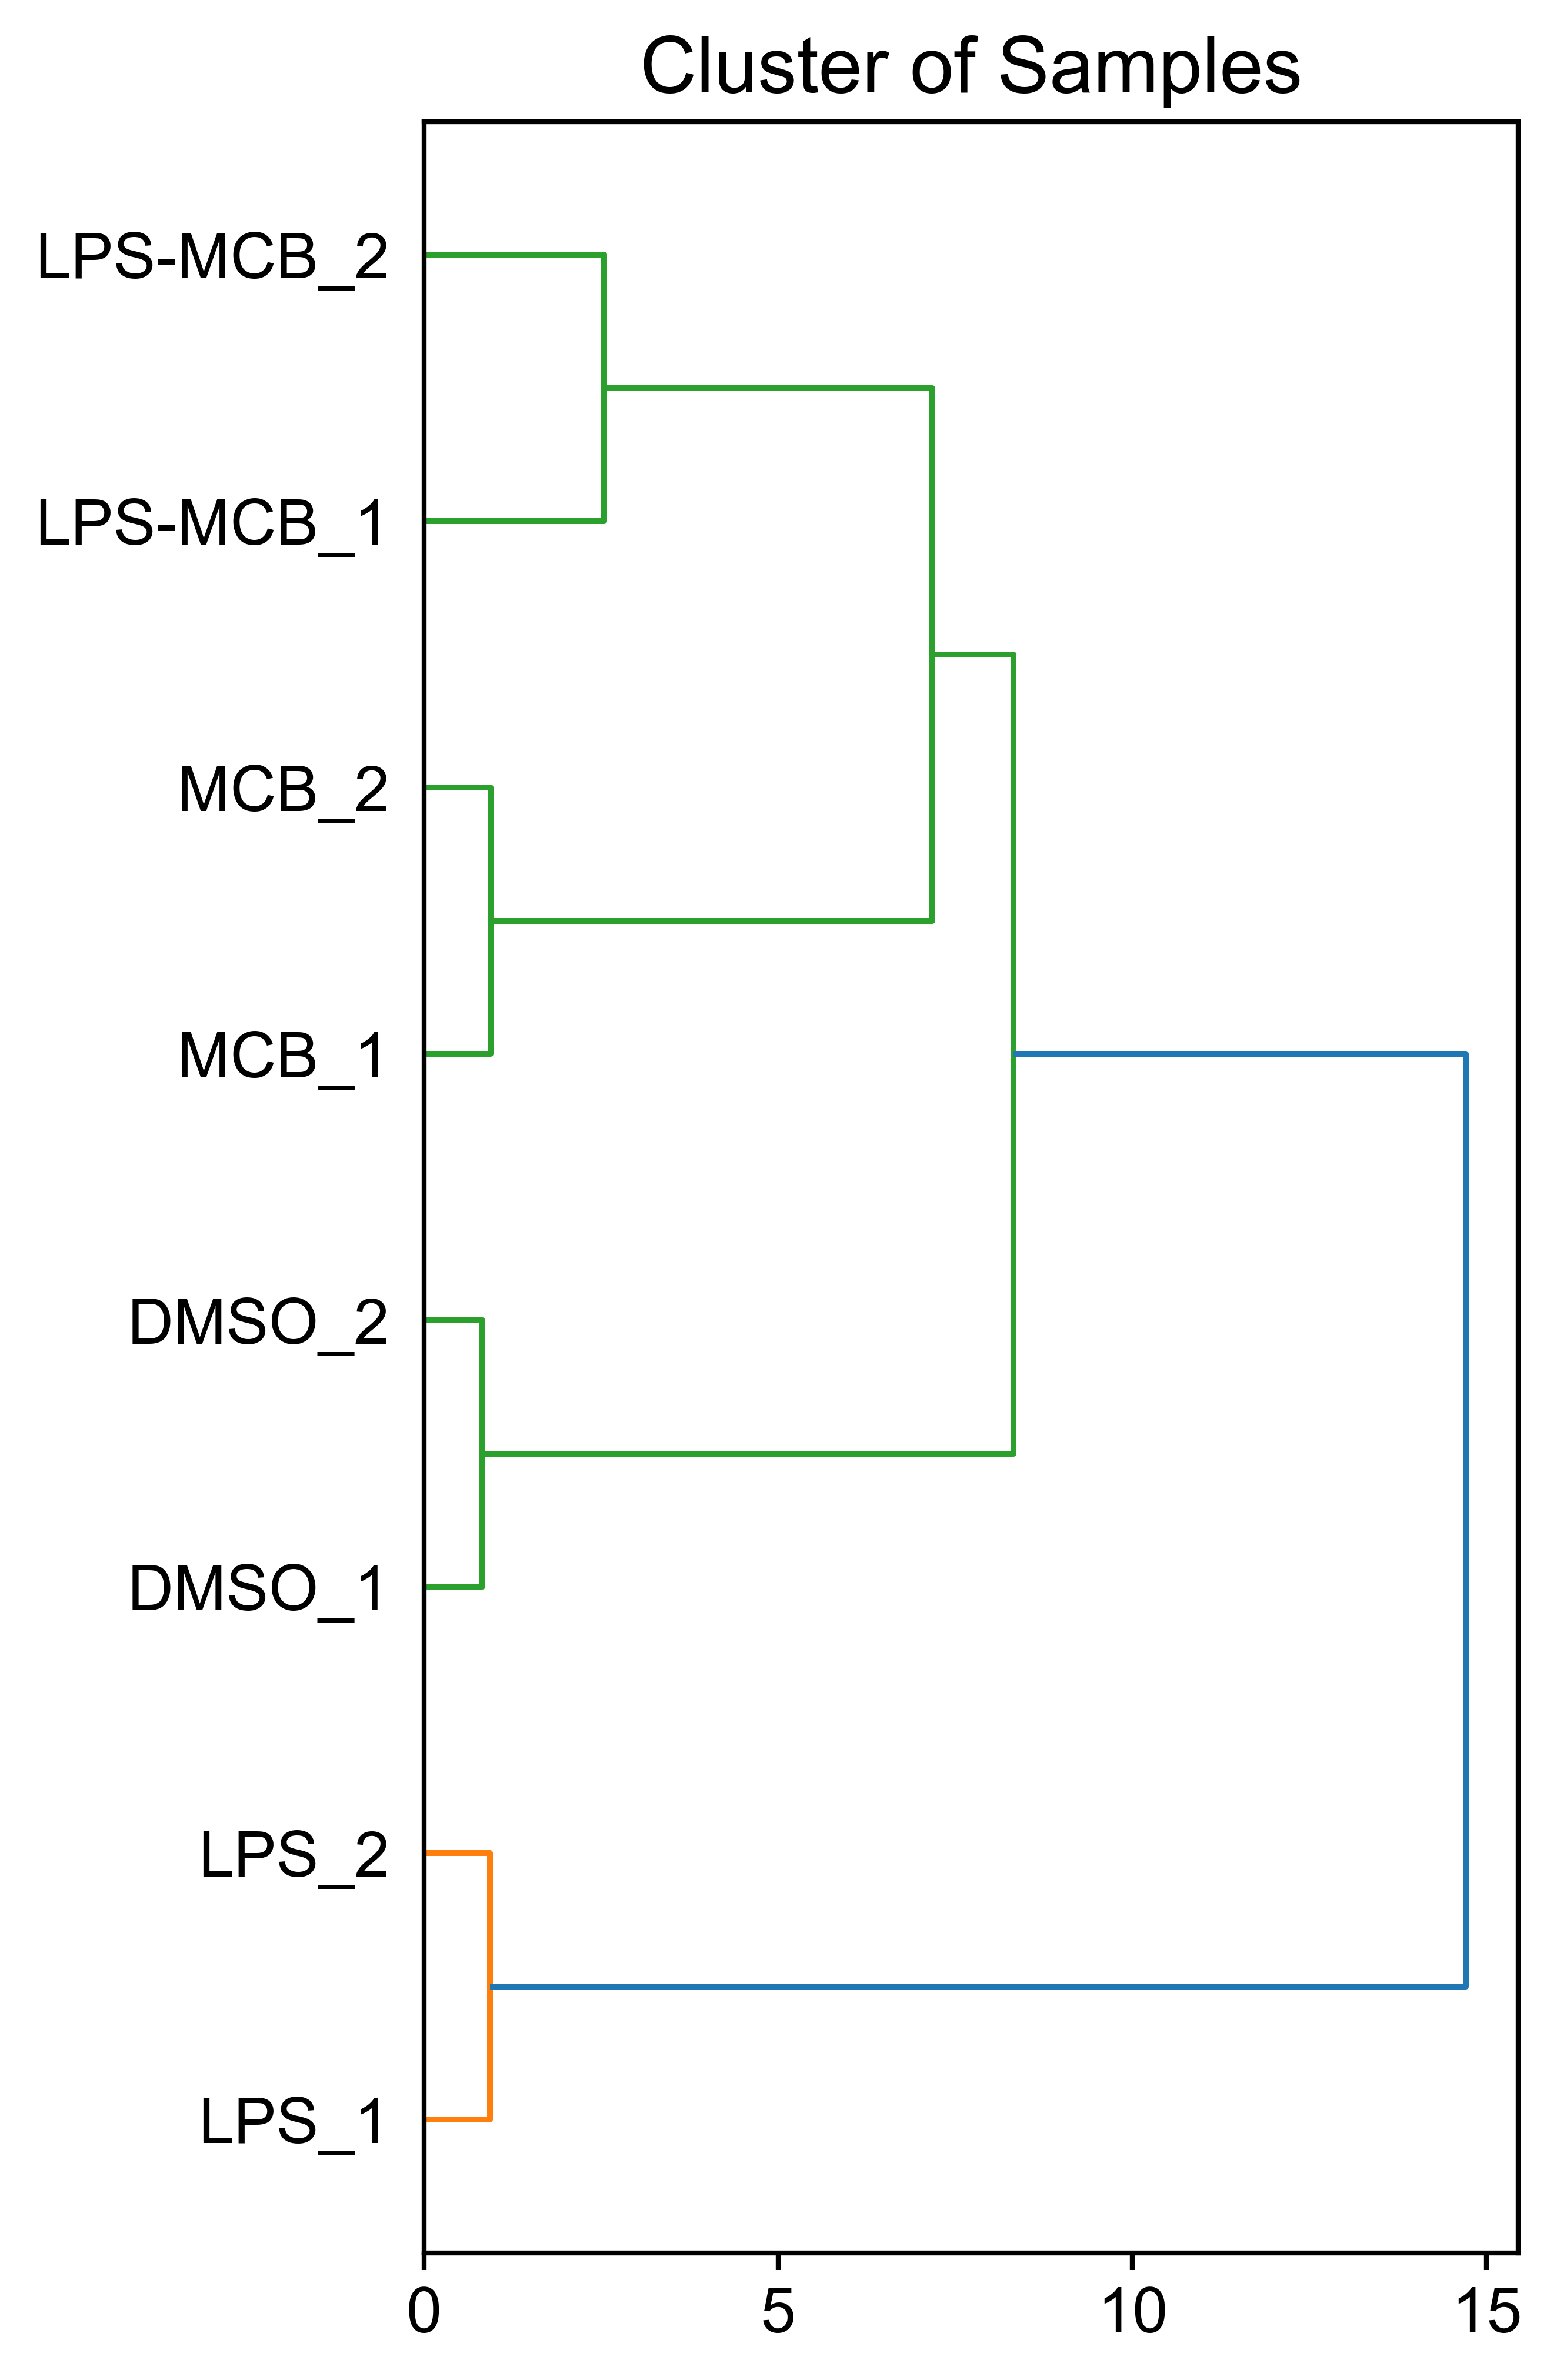

In [194]:
##对样本进行层次聚类
import scipy.cluster.hierarchy as sch
points = data_standarlized.T
#层次聚类（即系统聚类）生成观测值之间的距离矩阵,这里用的欧氏距离:
disMat = sch.distance.pdist(points,'euclidean') 
#进行层次聚类，此处使用'average'，也可以使用'ward':
Z=sch.linkage(disMat,method='average') 

plt.rcParams['font.family'] = 'Arial'
#设置线条粗细及设置画布大小
plt.rcParams['axes.linewidth'] = 1  
plt.rcParams['xtick.major.width'] = 1  
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['lines.linewidth'] = 1.2
fig = plt.figure(figsize=(4,8), dpi=600)
ax = fig.add_subplot(111)
#绘制谱系图
P=sch.dendrogram(Z, labels=points.index, leaf_font_size=13, leaf_rotation=0, orientation='right')
plt.title('Cluster of Samples', fontsize=16)
ax.tick_params(labelsize=13)

#获取Sample聚类顺序
sample_order = P['leaves']
exp = points.iloc[sample_order,]
sampleOrder = exp.index.to_list()

,DMSO_1,DMSO_2,LPS_1,LPS_2,LPS-MCB_1,LPS-MCB_2,MCB_1,MCB_2
Geneid,,,,,,,,
Gpr183,0.672407,0.310029,1.444286,1.344068,-0.964931,-0.986170,-0.912499,-0.907190
Emp3,0.602330,0.225359,1.339796,1.497880,-0.694905,-0.703927,-1.114241,-1.152291
Lyn,-1.028152,-0.822881,1.581871,1.523369,-0.964518,-0.628900,0.342033,-0.002822
Lif,-0.927158,-0.926431,1.289618,1.382919,0.039553,0.994272,-0.926431,-0.926341
Pcdh7,-0.890885,-0.897398,1.413486,1.293476,0.578070,0.548300,-1.067644,-0.977404


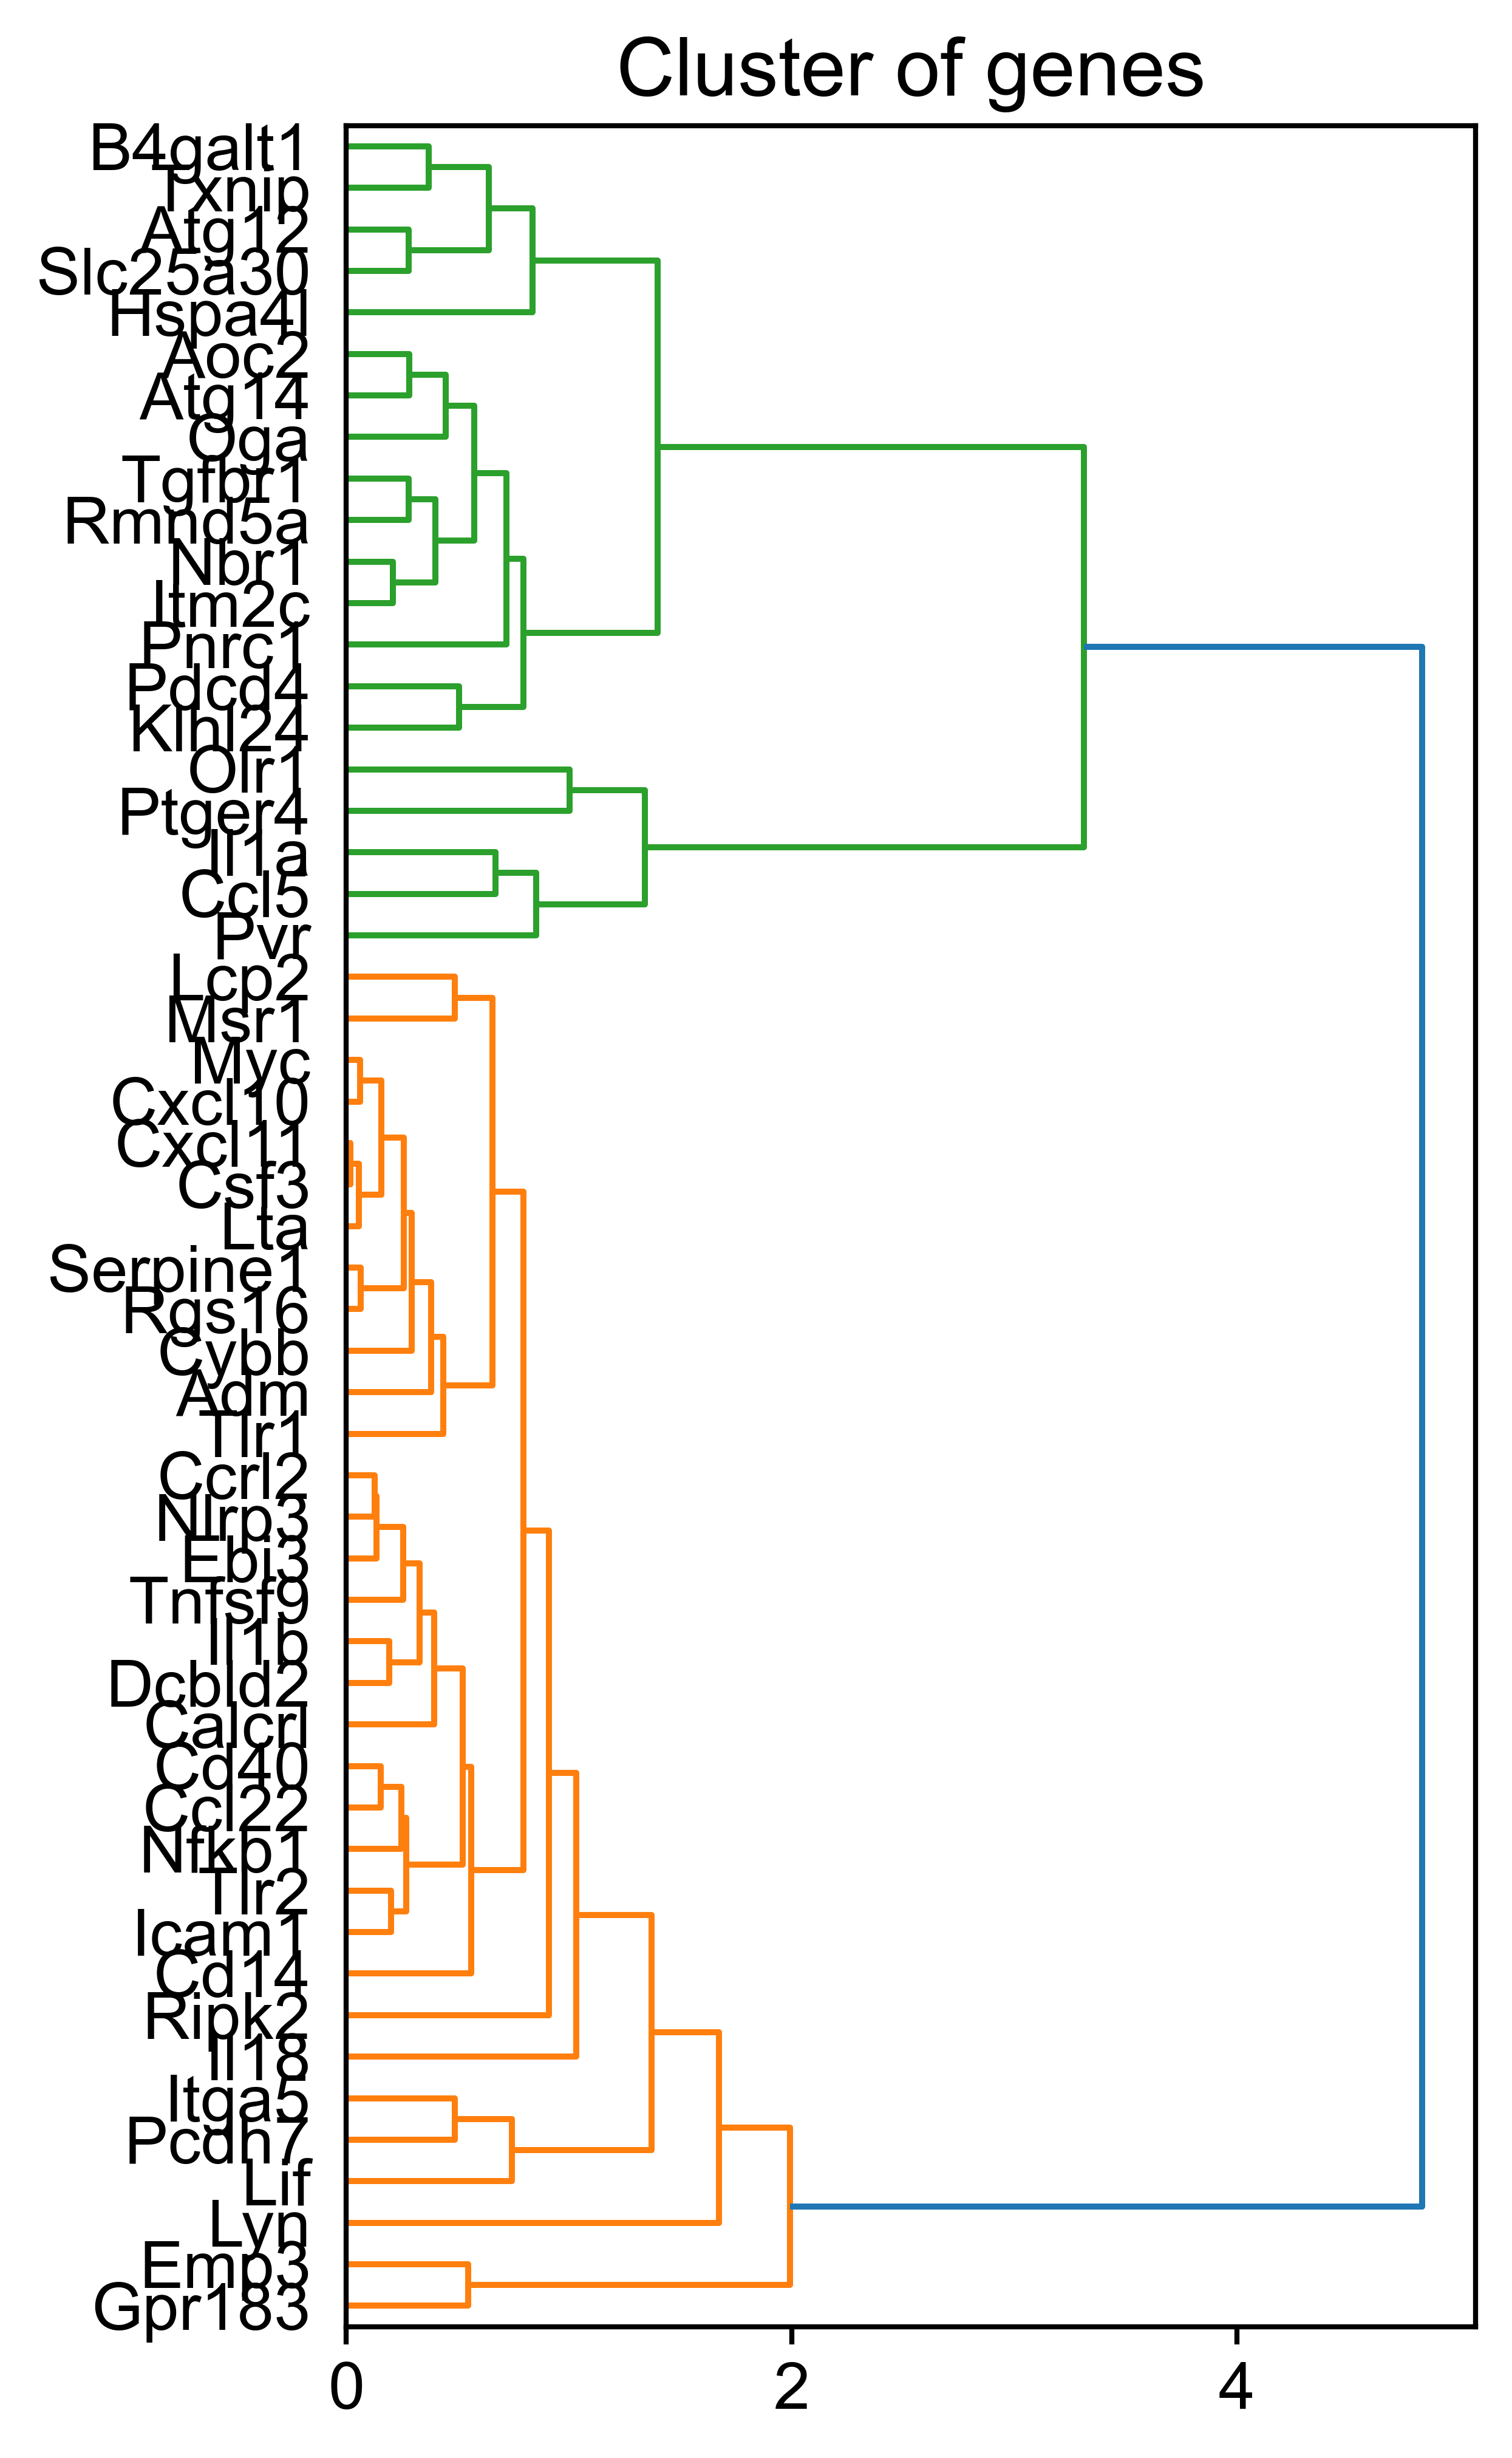

In [195]:
##对基因进行层次聚类
import scipy.cluster.hierarchy as sch
points = data_standarlized
#层次聚类（即系统聚类）生成观测值之间的距离矩阵,这里用的欧氏距离:
disMat = sch.distance.pdist(points,'euclidean') 
#进行层次聚类，此处使用'average'，也可以使用'ward':
Z=sch.linkage(disMat,method='average') 

plt.rcParams['font.family'] = 'Arial'
#设置线条粗细及设置画布大小
plt.rcParams['axes.linewidth'] = 1  
plt.rcParams['xtick.major.width'] = 1  
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['lines.linewidth'] = 1.2
fig = plt.figure(figsize=(4,8), dpi=600)
ax = fig.add_subplot(111)
#绘制谱系图
P=sch.dendrogram(Z, labels=points.index, leaf_font_size=13, leaf_rotation=0, orientation='right')
plt.title('Cluster of genes', fontsize=16)
ax.tick_params(labelsize=13)

sample_order = P['leaves']
exp = data_standarlized.iloc[sample_order,]
exp.head()

In [207]:
list(exp.columns)

['DMSO_1',
 'DMSO_2',
 'LPS_1',
 'LPS_2',
 'LPS-MCB_1',
 'LPS-MCB_2',
 'MCB_1',
 'MCB_2']

In [203]:
# exp = exp.loc[:,sampleOrder]
exp = exp.loc[:,['DMSO_1','DMSO_2','LPS_1','LPS_2','LPS-MCB_1','LPS-MCB_2','MCB_1','MCB_2']]
exp.head()

,DMSO_1,DMSO_2,LPS_1,LPS_2,LPS-MCB_1,LPS-MCB_2,MCB_1,MCB_2
Geneid,,,,,,,,
Gpr183,0.672407,0.310029,1.444286,1.344068,-0.964931,-0.986170,-0.912499,-0.907190
Emp3,0.602330,0.225359,1.339796,1.497880,-0.694905,-0.703927,-1.114241,-1.152291
Lyn,-1.028152,-0.822881,1.581871,1.523369,-0.964518,-0.628900,0.342033,-0.002822
Lif,-0.927158,-0.926431,1.289618,1.382919,0.039553,0.994272,-0.926431,-0.926341
Pcdh7,-0.890885,-0.897398,1.413486,1.293476,0.578070,0.548300,-1.067644,-0.977404


[0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5]


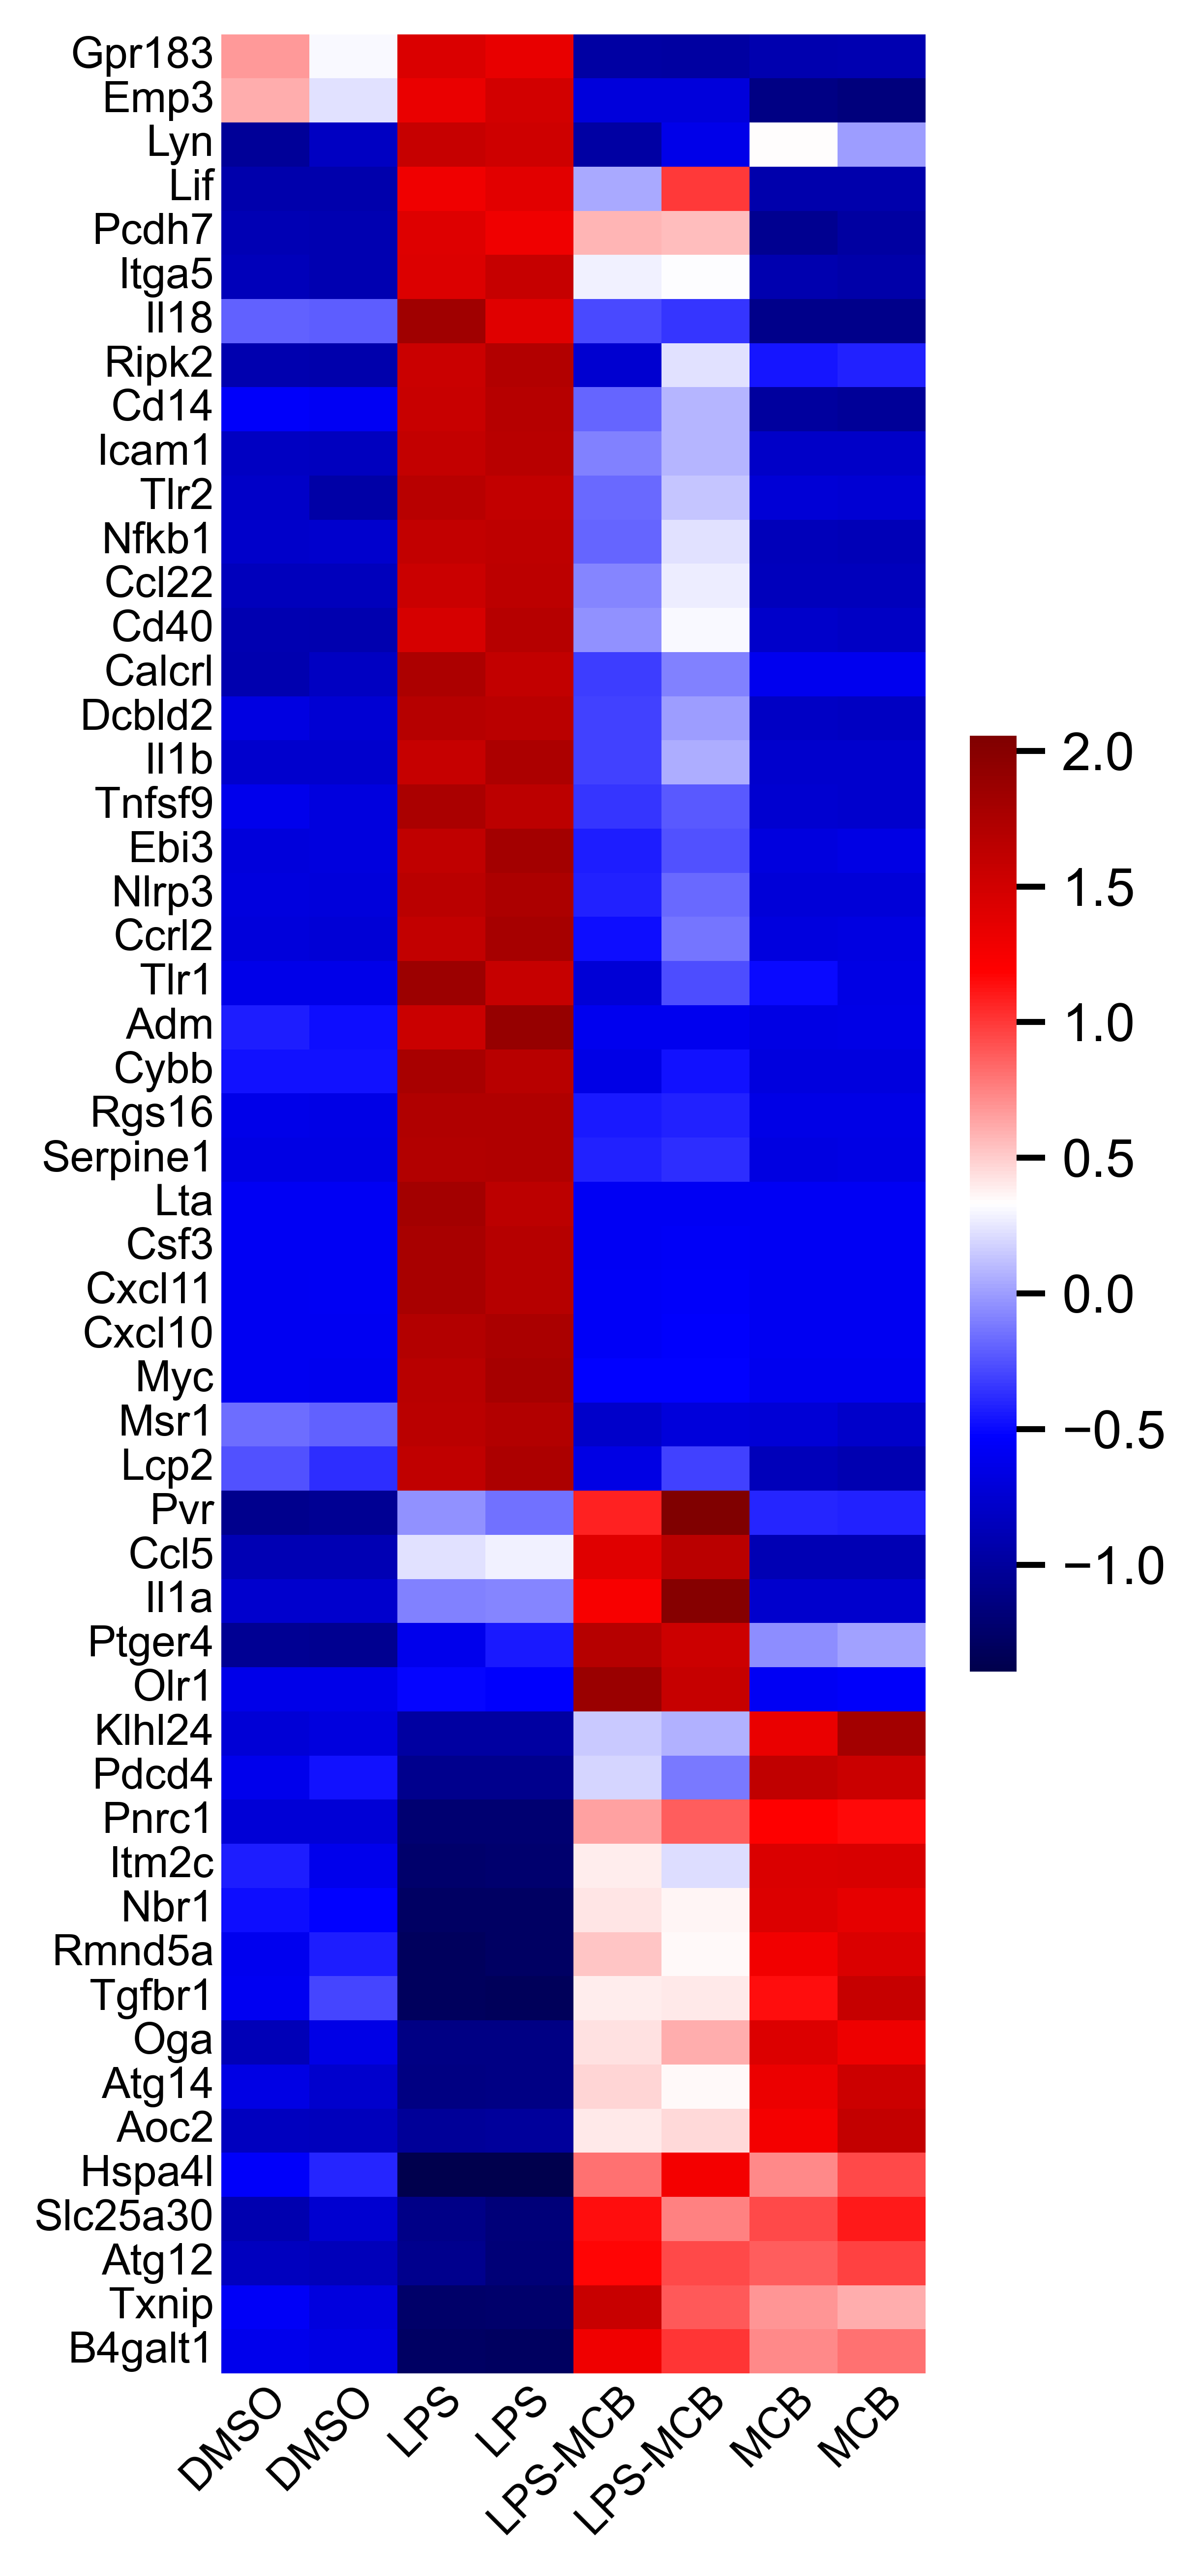

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt
with sns.plotting_context('notebook', font_scale=1):
    fig = plt.figure(figsize=(3.3,9), dpi=700)
    ax = fig.add_subplot(111)
    # ax.spines['left'].set_linewidth(1.5)
    # ax.spines['bottom'].set_linewidth(1.5)
    sns.heatmap(exp, cmap='seismic', yticklabels=True, 
                cbar_kws={"shrink": 0.4})

    ax.tick_params(axis='y', width=1, length=0, pad=1.5, labelsize=9)
    ax.tick_params(axis='x', width=1, length=0, pad=1, labelsize=9)
    ax.set_xticks([x+0.5 for x in list(range(int(len(exp.columns))))], [re.sub(r'_.*', '', x) for x in list(exp.columns)], 
                    # ha = 'center'
                    # rotation_mode='default', 
                    rotation_mode = 'anchor',
                    rotation=45, ha='right', va='top'
                    )
    print(ax.get_xticks())
    ax.set_xlabel('', fontsize=12)
    ax.set_ylabel('', fontsize=12)
    # ax.set_ylabel('DEGs', fontsize=12, fontstyle='italic', loc='center')
    # ax.set_title('Heatmap of DEGs associated with inflammation', fontsize=12, loc='left')
    # ax.set_xticks(range(int(len(exp)/2)), list(exp[x].drop_duplicates()), rotation_mode='anchor', rotation=30, horizontalalignment='right')
    plt.savefig('./RAW_LPS-MCB_inflammation_54_heatmap_39.pdf', dpi=700, bbox_inches='tight')
# plt.show()


In [3]:
import os
os.chdir('/Users/fenn/Documents/PhDProjects/MCB/RNA-seq/enrichmentRes/')
os.listdir()

['.DS_Store',
 'GSEA',
 'InflammatoryResponseGeneList.csv',
 'cytokineReceptor',
 'GO_Biological_Process_2021.mus musculus.enrichr.reports.txt',
 'KEGG_2019_mouse_top30.csv']

In [4]:
KEGG = pd.read_csv('KEGG_2019_mouse_top30.csv')
KEGG

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2019_Mouse,DNA replication,11/35,6.018435e-09,0.000001,0,0,14.276973,270.240799,RFC5;POLA1;RFC4;MCM7;LIG1;PRIM1;POLD1;MCM3;MCM...
1,KEGG_2019_Mouse,Cell cycle,19/123,1.076728e-08,0.000001,0,0,5.741247,105.333255,MCM7;PLK1;TTK;CDC25C;CDC20;CCNA2;CCNB2;CCNB1;T...
2,KEGG_2019_Mouse,Cytokine-cytokine receptor interaction,30/292,1.550686e-08,0.000001,0,0,3.634070,65.347779,CX3CR1;CSF1R;CSF3;CXCR5;IL27;TNF;CX3CL1;IL1RL1...
3,KEGG_2019_Mouse,TNF signaling pathway,17/110,6.332367e-08,0.000004,0,0,5.729085,94.959617,EDN1;IFNB1;TNFAIP3;TRAF1;NOD2;PTGS2;TNF;MMP9;C...
4,KEGG_2019_Mouse,Homologous recombination,9/41,4.205622e-06,0.000198,0,0,8.729133,108.058712,RAD51B;BLM;BRIP1;RAD51;EME1;POLD1;RAD54L;BRCA2...
5,KEGG_2019_Mouse,C-type lectin receptor signaling pathway,14/112,1.188915e-05,0.000442,0,0,4.454461,50.513076,IL10;EGR3;PTGS2;TNF;MALT1;IL6;CLEC4D;IL1B;MAPK...
6,KEGG_2019_Mouse,p53 signaling pathway,11/71,1.315747e-05,0.000442,0,0,5.700161,64.061381,CCNB2;CCNB1;RRM2;CCNE2;CDK4;SERPINE1;CDK1;FAS;...
7,KEGG_2019_Mouse,NF-kappa B signaling pathway,13/102,1.963052e-05,0.000577,0,0,4.549327,49.307544,TNFAIP3;TRAF1;PTGS2;TNF;MALT1;IL1B;CCL4;LTA;BC...
8,KEGG_2019_Mouse,Chemokine signaling pathway,16/197,5.448402e-04,0.009146,0,0,2.753390,20.691777,CX3CR1;XCR1;CXCR5;CX3CL1;PIK3R5;FGR;HCK;CXCL10...
9,KEGG_2019_Mouse,IL-17 signaling pathway,10/91,5.951598e-04,0.009324,0,0,3.828153,28.430469,CXCL10;CSF3;IL6;IL1B;TNFAIP3;PTGS2;TNF;IKBKE;M...
